In [1]:
# Download the relevant libraries
#import simpledbf # for converting dbf files to csv
#from simpledbf import Dbf5 # for converting dbf files to csv
import pandas as pd #For working with dataframes
import numpy as np #For working with arrays
import datetime as dt #For converting dates to serial datetimes
import matplotlib.pyplot as plt # for plotting and visualization
import seaborn as sns # for plotting and visualization
#import geopandas as gpd

#from dbfread import DBF

import sys
import time 
from tqdm.notebook import tqdm, trange

pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 190)

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

from survive import KaplanMeier

In [3]:
# Set data directory
raw_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/RAW/'
proj_area_dir = '/Users/kathrynmurenbeeld/Desktop/FS_DATA/'
#data_dir = '/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/'

In [4]:
# Load the data sets to make figures out of

# PALS+FACTS: NEPA init 2009-01-01 to 2018-12-31, filtered for TM, HF, VM project purposes
#df = pd.read_csv(raw_data_dir + 'df_pals_comm_NEPA_init_2009_2018_noneg_act_area_aves_c20221129.csv')

# PALS+FACTS: NEPA init 2009-01-01 to 2018-12-31, all project purposes
#df = pd.read_csv(raw_data_dir + 'df_pals_comm_NEPA_init_2009_2018_noneg_allpurp_c20221202.csv')

# PALS+FACTS: NEPA init 2009-01-01 to 2021-12-31, filtered for TM, HF, VM project purposes
#df = pd.read_csv(raw_data_dir + 'df_pals_comm_NEPA_init_2009_2021_noneg_subpurp_c20221202.csv')

# PALS+FACTS: NEPA init 2009-01-01 to 2021-12-31, all project purposes
#df = pd.read_csv(raw_data_dir + 'df_pals_comm_NEPA_init_2009_2021_noneg_allpurp_c20221202.csv') 

# PALS+FACTS: NEPA init 2009-01-01 to 2021-12-31, all project purposes - version 2, with planned total project lifespan
df = pd.read_csv(raw_data_dir + 'df_pals_comm_NEPA_init_2009_2018_noneg_allpurp_v02_c20221208.csv')


#PALS+FACTS: NEPA init 2009-2021, all project purposes - calculated project footprint
df_foot = pd.read_csv(raw_data_dir + "df_pals_comm_NEPA_init_2009_2021_allpurp_footprint_c20230123.csv")

#projarea = pd.read_csv(proj_area_dir + "prj_footprint_c20221104.csv") 
#shann = pd.read_csv(raw_data_dir + 'shannonindex_0120_v02.csv') # New values calculated by Matt January 2023
# To get back to the figures like what I made before for the figures used in the PNAS draft sent out
# in Dec 2022 comment out the shann.
#simp = pd.read_csv(raw_data_dir + 'simpsonindex.csv') # This should already be in the dataframe

In [5]:
#shann.head(5)

In [6]:
#projarea = projarea.rename(columns={"ID": "NEPA_DOC_NBR"})
#df['NEPA_DOC_NBR'] = df['NEPA_DOC_NBR'].apply(str)

In [7]:
#shann = shann.drop(columns="Unnamed: 0")
#shann.head(5)

In [8]:
#df.loc[df['NEPA_DOC_NBR'] == 37583]
#df.loc[df['NEPA_DOC_NBR'] == 39424]

In [9]:
df.head(2)

FOREST_ID  NEPA_DOC_NBR                                       PROJECT NAME  \
0      102.0         47722  Supplemental EIS - BDNF Land & Resource Manage...   
1      102.0         42302                        Forest Plan Temporary Roads   

                                        LMU (ACTUAL) LMU – REGION  \
0  Beaverhead-Deerlodge National Forest All Units...           R1   
1  Beaverhead-Deerlodge National Forest All Units...           R1   

  LMU – FOREST                                     LMU – DISTRICT  \
0         BDNF  Beaverhead-Deerlodge National Forest All Units...   
1         BDNF  Beaverhead-Deerlodge National Forest All Units...   

  PROJECT STATUS PROJECT CREATED  CREATED FY  DECISION ID  \
0       Complete      09/14/2015      2015.0      46316.0   
1       Complete      09/11/2014      2014.0      42205.0   

                                       DECISION NAME INITIATION DATE  \
0  Supplemental EIS - BDNF Land & Resource Manage...      2015-09-11   
1  Explanation Supporting Not including Temp Road...      2013-09-09   

   INITIATION FY DECISION SIGNED  SIGNED FY SIGNER LAST NAME  \
0         2015.0      2016-10-11     2017.0           Glossa   
1         2013.0      2014-09-12     2014.0           Glossa   

  SIGNER FIRST NAME       SIGNER TITLE DECISION TYPE DECISION APPEAL RULE  \
0            Melany  Forest Supervisor           ROD                  NaN   
1            Melany  Forest Supervisor           ROD                 None   

  PROJECT NOTICE AND COMMENT REGULATION  APPEALED OR OBJECTED?  \
0                            219 (2012)                    0.0   
1            Not Subject to Regulations                    0.0   

   NO COMMENTS OR ONLY SUPPORT?  LITIGATED?  FC Facility management – purpose  \
0                           0.0         0.0                               0.0   
1                           1.0         0.0                               0.0   

   FR Research – purpose  HF Fuels management – purpose  \
0                    0.0                            0.0   
1                    0.0                            0.0   

   HR Heritage resource management – purpose  \
0                                        0.0   
1                                        0.0   

   LM Land ownership management – purpose  LW Land acquisition – purpose  \
0                                     0.0                            0.0   
1                                     0.0                            0.0   

   MG Minerals and geology – purpose  PN Land management planning – purpose  \
0                                0.0                                    1.0   
1                                0.0                                    1.0   

   RD Road management – purpose  RG Grazing management – purpose  \
0                           0.0                              0.0   
1                           0.0                              0.0   

   RO Regulations, directives, orders – purpose  \
0                                           0.0   
1                                           0.0   

   RU Special area management – purpose  RW Recreation management – purpose  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   

   SU Special use management – purpose  TM Forest products – purpose  \
0                                  0.0                           0.0   
1                                  0.0                           0.0   

   VM Vegetation management (non-forest products) – purpose  \
0                                                0.0          
1                                                0.0          

   WF Wildlife, fish, rare plants – purpose  WM Water management – purpose  \
0                                       0.0                            0.0   
1                                       0.0                            0.0   

   AL Land use adjustments – activity  BL Bou

In [10]:
print(len(df))
print(len(df_foot))

4716
4196


In [11]:
len(df.loc[df['NBR_ACTIVITIES'] == 1.0])

618

In [12]:
len(df_foot.loc[df['NBR_ACTIVITIES'] == 1.0])

546

In [13]:
df['DECISION TYPE'].value_counts()

DM     2909
DN     1621
ROD     186
Name: DECISION TYPE, dtype: int64

In [14]:
df_foot['DECISION TYPE'].value_counts()

DM     2509
DN     1512
ROD     175
Name: DECISION TYPE, dtype: int64

In [15]:
len(df)

4716

In [16]:
df['DECISION TYPE'].value_counts()

DM     2909
DN     1621
ROD     186
Name: DECISION TYPE, dtype: int64

In [17]:
#df = df.drop(['index'], axis=1)

In [18]:
df_foot.dtypes

FOREST_ID                                                   float64
NEPA_DOC_NBR                                                  int64
PROJECT NAME                                                 object
LMU (ACTUAL)                                                 object
LMU – REGION                                                 object
LMU – FOREST                                                 object
LMU – DISTRICT                                               object
PROJECT STATUS                                               object
PROJECT CREATED                                              object
CREATED FY                                                  float64
DECISION ID                                                 float64
DECISION NAME                                                object
INITIATION DATE                                              object
INITIATION FY                                               float64
DECISION SIGNED                                 

In [19]:
df_eis = df.loc[df['DECISION TYPE'] == "ROD"].copy()

df_eis = df_eis[['PROJECT NAME', 'NEPA_DOC_NBR', 'LMU – REGION', 'APPEALED OR OBJECTED?', 'LITIGATED?', 'ELAPSED DAYS', 'NEPA_TO_FIRST_ACT',
                'NEPA_TO_CONTRACT']].copy()
df_eis.head(5)


PROJECT NAME  NEPA_DOC_NBR  \
0   Supplemental EIS - BDNF Land & Resource Manage...         47722   
1                         Forest Plan Temporary Roads         42302   
28  Greater Sage-grouse Management Direction - Bea...         38916   
41      Flint Foothills Vegetation Management Project         33238   
51                                     Gold Butterfly         51486   

   LMU – REGION  APPEALED OR OBJECTED?  LITIGATED?  ELAPSED DAYS  \
0            R1                    0.0         0.0         396.0   
1            R1                    0.0         0.0         368.0   
28           R1                    0.0         1.0        1377.0   
41           R1                    0.0         0.0        1890.0   
51           R1                    0.0         1.0         889.0   

    NEPA_TO_FIRST_ACT  NEPA_TO_CONTRACT  
0              1319.0            1319.0  
1              1372.0            1372.0  
28             1015.0            1015.0  
41              106.0              53.0  
51                0.0               0.0

In [20]:
#df_eis.to_csv(raw_data_dir + "eis_table_c20221223.csv", na_rep = "NULL", index=False)

In [21]:
df['NEPA_DOC_NBR'] = df['NEPA_DOC_NBR'].apply(str)
df_foot['NEPA_DOC_NBR'] = df_foot['NEPA_DOC_NBR'].apply(str)
len(df)
#df.dtypes

4716

In [22]:
## Merge the shann and simp diversity indexs to df by project number

#df = pd.merge(shann, df, how="left", on='NEPA_DOC_NBR') # projarea_y, H, and E
#df = pd.merge(simp, df, how="left", on='NEPA_DOC_NBR') # projarea_x and D
#df = pd.merge(projarea, df, how="right", on='NEPA_DOC_NBR')
#df = pd.merge(shann, df, how="left", on="NEPA_DOC_NBR")

In [23]:
df_foot.head(2)

FOREST_ID NEPA_DOC_NBR                                       PROJECT NAME  \
0      102.0        47722  Supplemental EIS - BDNF Land & Resource Manage...   
1      102.0        42302                        Forest Plan Temporary Roads   

                                        LMU (ACTUAL) LMU – REGION  \
0  Beaverhead-Deerlodge National Forest All Units...           R1   
1  Beaverhead-Deerlodge National Forest All Units...           R1   

  LMU – FOREST                                     LMU – DISTRICT  \
0         BDNF  Beaverhead-Deerlodge National Forest All Units...   
1         BDNF  Beaverhead-Deerlodge National Forest All Units...   

  PROJECT STATUS PROJECT CREATED  CREATED FY  DECISION ID  \
0       Complete      09/14/2015      2015.0      46316.0   
1       Complete      09/11/2014      2014.0      42205.0   

                                       DECISION NAME INITIATION DATE  \
0  Supplemental EIS - BDNF Land & Resource Manage...      2015-09-11   
1  Explanation Supporting Not including Temp Road...      2013-09-09   

   INITIATION FY DECISION SIGNED  SIGNED FY SIGNER LAST NAME  \
0         2015.0      2016-10-11     2017.0           Glossa   
1         2013.0      2014-09-12     2014.0           Glossa   

  SIGNER FIRST NAME       SIGNER TITLE DECISION TYPE DECISION APPEAL RULE  \
0            Melany  Forest Supervisor           ROD                  NaN   
1            Melany  Forest Supervisor           ROD                 None   

  PROJECT NOTICE AND COMMENT REGULATION  APPEALED OR OBJECTED?  \
0                            219 (2012)                    0.0   
1            Not Subject to Regulations                    0.0   

   NO COMMENTS OR ONLY SUPPORT?  LITIGATED?  FC Facility management – purpose  \
0                           0.0         0.0                               0.0   
1                           1.0         0.0                               0.0   

   FR Research – purpose  HF Fuels management – purpose  \
0                    0.0                            0.0   
1                    0.0                            0.0   

   HR Heritage resource management – purpose  \
0                                        0.0   
1                                        0.0   

   LM Land ownership management – purpose  LW Land acquisition – purpose  \
0                                     0.0                            0.0   
1                                     0.0                            0.0   

   MG Minerals and geology – purpose  PN Land management planning – purpose  \
0                                0.0                                    1.0   
1                                0.0                                    1.0   

   RD Road management – purpose  RG Grazing management – purpose  \
0                           0.0                              0.0   
1                           0.0                              0.0   

   RO Regulations, directives, orders – purpose  \
0                                           0.0   
1                                           0.0   

   RU Special area management – purpose  RW Recreation management – purpose  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   

   SU Special use management – purpose  TM Forest products – purpose  \
0                                  0.0                           0.0   
1                                  0.0                           0.0   

   VM Vegetation management (non-forest products) – purpose  \
0                                                0.0          
1                                                0.0          

   WF Wildlife, fish, rare plants – purpose  WM Water management – purpose  \
0                                       0.0                            0.0   
1                                       0.0                            0.0   

   AL Land use adjustments – activity  BL Bounda

In [24]:
#df = df[df['FIRE'].notna()].copy()
#len(df)

In [25]:
df['DECISION TYPE'].value_counts()

DM     2909
DN     1621
ROD     186
Name: DECISION TYPE, dtype: int64

In [26]:
df['ELAPSED DAYS'] = df['ELAPSED DAYS'].fillna(0)
df_foot['ELAPSED DAYS'] = df_foot['ELAPSED DAYS'].fillna(0)

In [27]:
# Convert date objects/strings to datetime

df['INITIATION DATE'] = pd.to_datetime(df['INITIATION DATE'])
df['DECISION SIGNED'] = pd.to_datetime(df['DECISION SIGNED'])
df['DATE_COMP_MIN'] = pd.to_datetime(df['DATE_COMP_MIN'])
df['DATE_COMP_MAX'] = pd.to_datetime(df['DATE_COMP_MAX'])
df['DATE_AWARD_MIN'] = pd.to_datetime(df['DATE_AWARD_MIN'])
df['DATE_AWARD_MAX'] = pd.to_datetime(df['DATE_AWARD_MAX'])
df['NEPA_SIGNED_DATE'] = pd.to_datetime(df['NEPA_SIGNED_DATE'])

df_foot['INITIATION DATE'] = pd.to_datetime(df_foot['INITIATION DATE'])
df_foot['DECISION SIGNED'] = pd.to_datetime(df_foot['DECISION SIGNED'])
df_foot['DATE_COMP_MIN'] = pd.to_datetime(df_foot['DATE_COMP_MIN'])
df_foot['DATE_COMP_MAX'] = pd.to_datetime(df_foot['DATE_COMP_MAX'])
df_foot['DATE_AWARD_MIN'] = pd.to_datetime(df_foot['DATE_AWARD_MIN'])
df_foot['DATE_AWARD_MAX'] = pd.to_datetime(df_foot['DATE_AWARD_MAX'])
df_foot['NEPA_SIGNED_DATE'] = pd.to_datetime(df_foot['NEPA_SIGNED_DATE'])

## To get back to the data frame used to make the figures in the PNAS draft sent out 
## in Dec 2022 uncomment the df['totarea'], df['totareaac'], and df['totareaha'] and comment df['projarea']
#df['totarea'] = pd.to_numeric(df['totarea'])
#df['totareaac'] = pd.to_numeric(df['totareaac'])
#df['totareaha'] = pd.to_numeric(df['totareaha'])
#df['projarea'] = pd.to_numeric(df['projarea'])

In [28]:
df['ASSESSMENT_TIME'] = np.where(df['ELAPSED DAYS'] == 0.0, df['NEPA_SIGNED_DATE'] - df['INITIATION DATE'], 
                                     df['DECISION SIGNED'] - df['INITIATION DATE'])

df_foot['ASSESSMENT_TIME'] = np.where(df_foot['ELAPSED DAYS'] == 0.0, df_foot['NEPA_SIGNED_DATE'] - df_foot['INITIATION DATE'], 
                                     df_foot['DECISION SIGNED'] - df_foot['INITIATION DATE'])


In [29]:
df['NEPA_TO_LAST_ACT_0'] = df['NEPA_TO_LAST_ACT'].fillna(0)

df_foot['NEPA_TO_LAST_ACT_0'] = df_foot['NEPA_TO_LAST_ACT'].fillna(0)


In [30]:
# Use NEPA_SIGNED_DATE
# But for the 24 projects that end up with NAN for NEPA_TO_FIRST_ACT/CONTRACT_MAX need to use DECISION SIGNED

max_time = df['DATE_COMP_MAX'].max()
max_time_ft = df_foot['DATE_COMP_MAX'].max()

df['IMPLEMENTATION_TIME'] = np.where(df['NEPA_TO_LAST_ACT_0'] == 0.0, max_time - df['NEPA_SIGNED_DATE'], 
                                     df['DATE_COMP_MAX'] - df['DECISION SIGNED'])
df_foot['IMPLEMENTATION_TIME'] = np.where(df_foot['NEPA_TO_LAST_ACT_0'] == 0.0, max_time - df_foot['NEPA_SIGNED_DATE'], 
                                     df_foot['DATE_COMP_MAX'] - df_foot['DECISION SIGNED'])


In [31]:
df['NEPA_TO_FIRST_ACT_0'] = df['NEPA_TO_FIRST_ACT'].fillna(0)
df_foot['NEPA_TO_FIRST_ACT_0'] = df_foot['NEPA_TO_FIRST_ACT'].fillna(0)


In [32]:
df['NEPA_TO_FIRST_ACT_MAX'] = np.where(df['NEPA_TO_FIRST_ACT_0'] == 0.0, max_time - df['NEPA_SIGNED_DATE'], 
                                     df['DATE_COMP_MIN'] - df['DECISION SIGNED'])

df['NEPA_TO_FIRST_ACT_MAX'] = np.where(df['NEPA_TO_FIRST_ACT_MAX'].isna(), max_time - df['DECISION SIGNED'], 
                                     df['NEPA_TO_FIRST_ACT_MAX'])

df_foot['NEPA_TO_FIRST_ACT_MAX'] = np.where(df_foot['NEPA_TO_FIRST_ACT_0'] == 0.0, max_time_ft - df_foot['NEPA_SIGNED_DATE'], 
                                     df_foot['DATE_COMP_MIN'] - df_foot['DECISION SIGNED'])

df_foot['NEPA_TO_FIRST_ACT_MAX'] = np.where(df_foot['NEPA_TO_FIRST_ACT_MAX'].isna(), max_time_ft - df_foot['DECISION SIGNED'], 
                                     df_foot['NEPA_TO_FIRST_ACT_MAX'])


In [33]:
df['NEPA_TO_CONTRACT_0'] = df['NEPA_TO_CONTRACT'].fillna(0)
df_foot['NEPA_TO_CONTRACT_0'] = df_foot['NEPA_TO_CONTRACT'].fillna(0)


In [34]:
df['NEPA_TO_CONTRACT_MAX'] = np.where(df['NEPA_TO_CONTRACT_0'] == 0.0, (max_time - df['NEPA_SIGNED_DATE']), 
                                     (df['DATE_AWARD_MIN'] - df['DECISION SIGNED']))
df['NEPA_TO_CONTRACT_MAX'] = np.where(df['NEPA_TO_CONTRACT_MAX'].isna(), max_time - df['DECISION SIGNED'], 
                                     df['NEPA_TO_CONTRACT_MAX'])

df_foot['NEPA_TO_CONTRACT_MAX'] = np.where(df_foot['NEPA_TO_CONTRACT_0'] == 0.0, (max_time_ft - df_foot['NEPA_SIGNED_DATE']), 
                                     (df_foot['DATE_AWARD_MIN'] - df_foot['DECISION SIGNED']))
df_foot['NEPA_TO_CONTRACT_MAX'] = np.where(df_foot['NEPA_TO_CONTRACT_MAX'].isna(), max_time_ft - df_foot['DECISION SIGNED'], 
                                     df_foot['NEPA_TO_CONTRACT_MAX'])


In [35]:
df['TOTAL_PROJECT_DAYS_0'] = df['TOTAL_PROJECT_DAYS'].fillna(0)
df_foot['TOTAL_PROJECT_DAYS_0'] = df_foot['TOTAL_PROJECT_DAYS'].fillna(0)


In [36]:
df['TOTAL_PROJECT_DAYS_MAX'] = np.where(df['TOTAL_PROJECT_DAYS_0'] == 0.0, (max_time - df['INITIATION DATE']),
                                       df['DATE_COMP_MAX'] - df['INITIATION DATE'])

df_foot['TOTAL_PROJECT_DAYS_MAX'] = np.where(df_foot['TOTAL_PROJECT_DAYS_0'] == 0.0, (max_time_ft - df_foot['INITIATION DATE']),
                                       df_foot['DATE_COMP_MAX'] - df_foot['INITIATION DATE'])


In [37]:
df['ASSESSMENT_TIME'] = pd.to_numeric(df['ASSESSMENT_TIME'].dt.days, downcast='integer')
df['IMPLEMENTATION_TIME'] = pd.to_numeric(df['IMPLEMENTATION_TIME'].dt.days, downcast='integer')
df['NEPA_TO_FIRST_ACT_MAX'] = pd.to_numeric(df['NEPA_TO_FIRST_ACT_MAX'].dt.days, downcast='integer')
df['NEPA_TO_CONTRACT_MAX'] = pd.to_numeric(df['NEPA_TO_CONTRACT_MAX'].dt.days, downcast='integer')
df['TOTAL_PROJECT_DAYS_MAX'] = pd.to_numeric(df['TOTAL_PROJECT_DAYS_MAX'].dt.days, downcast='integer')

df_foot['ASSESSMENT_TIME'] = pd.to_numeric(df_foot['ASSESSMENT_TIME'].dt.days, downcast='integer')
df_foot['IMPLEMENTATION_TIME'] = pd.to_numeric(df_foot['IMPLEMENTATION_TIME'].dt.days, downcast='integer')
df_foot['NEPA_TO_FIRST_ACT_MAX'] = pd.to_numeric(df_foot['NEPA_TO_FIRST_ACT_MAX'].dt.days, downcast='integer')
df_foot['NEPA_TO_CONTRACT_MAX'] = pd.to_numeric(df_foot['NEPA_TO_CONTRACT_MAX'].dt.days, downcast='integer')
df_foot['TOTAL_PROJECT_DAYS_MAX'] = pd.to_numeric(df_foot['TOTAL_PROJECT_DAYS_MAX'].dt.days, downcast='integer')


In [38]:
df['NEPA_COMP2'] = np.where(df['ASSESSMENT_TIME'] > 0, True, False)
df['NEPA_COMP'] = np.where((df['SIGNED FY'] > 0.0) , True, False)
df['PROJ_INIT'] = np.where(df['NEPA_TO_FIRST_ACT'].isna(), False, True)
df['PROJ_AWARDED'] = np.where(df['NEPA_TO_CONTRACT'].isna(), False, True)
df['PROJ_COMP'] = np.where(df['PERCENT_PROJ_COMP'] == 1.0, True, False)

df_foot['NEPA_COMP2'] = np.where(df_foot['ASSESSMENT_TIME'] > 0, True, False)
df_foot['NEPA_COMP'] = np.where((df_foot['SIGNED FY'] > 0.0) , True, False)
df_foot['PROJ_INIT'] = np.where(df_foot['NEPA_TO_FIRST_ACT'].isna(), False, True)
df_foot['PROJ_AWARDED'] = np.where(df_foot['NEPA_TO_CONTRACT'].isna(), False, True)
df_foot['PROJ_COMP'] = np.where(df_foot['PERCENT_PROJ_COMP'] == 1.0, True, False)


In [39]:
print("Censored NEPA assessments: " + str(len(df[df['NEPA_COMP2'] == False])))
print("Censored Project initiation: " + str(len(df[df['PROJ_INIT'] == False])))
print("Censored Project awarded: " + str(len(df[df['PROJ_AWARDED'] == False])))
print("Censored Project completion: " + str(len(df[df['PROJ_COMP'] == False])))

Censored NEPA assessments: 10
Censored Project initiation: 589
Censored Project awarded: 314
Censored Project completion: 3151


In [40]:
print("Censored NEPA assessments: " + str(len(df_foot[df_foot['NEPA_COMP2'] == False])))
print("Censored Project initiation: " + str(len(df_foot[df_foot['PROJ_INIT'] == False])))
print("Censored Project awarded: " + str(len(df_foot[df_foot['PROJ_AWARDED'] == False])))
print("Censored Project completion: " + str(len(df_foot[df_foot['PROJ_COMP'] == False])))


Censored NEPA assessments: 9
Censored Project initiation: 380
Censored Project awarded: 140
Censored Project completion: 2847


In [41]:
print(len(df[df['NEPA_TO_FIRST_ACT_MAX'].isna()]))
print(len(df_foot[df_foot['NEPA_TO_FIRST_ACT_MAX'].isna()]))

0
0


In [42]:
print(len(df[df['NEPA_TO_FIRST_ACT_MAX'] <0]))
print(len(df_foot[df_foot['NEPA_TO_FIRST_ACT_MAX'] <0]))

16
16


In [43]:
print(len(df[df['NEPA_TO_CONTRACT_MAX'] <0]))
print(len(df_foot[df_foot['NEPA_TO_CONTRACT_MAX'] <0]))

21
21


In [44]:
df_noneg = df.loc[(df['NEPA_TO_FIRST_ACT_MAX'] >= 0) | (df['NEPA_TO_FIRST_ACT_MAX'].isna())].copy()
df_noneg = df.loc[(df['NEPA_TO_CONTRACT_MAX'] >= 0) | (df['NEPA_TO_CONTRACT_MAX'].isna())].copy()

df_foot_noneg = df_foot.loc[(df['NEPA_TO_FIRST_ACT_MAX'] >= 0) | (df_foot['NEPA_TO_FIRST_ACT_MAX'].isna())].copy()
df_foot_noneg = df_foot.loc[(df_foot['NEPA_TO_CONTRACT_MAX'] >= 0) | (df_foot['NEPA_TO_CONTRACT_MAX'].isna())].copy()


In [45]:
print(len(df_noneg))
print(len(df_foot_noneg))

4695
4175


In [46]:
df_projs = list(df['NEPA_DOC_NBR'].unique())
df_foot_projs = list(df_foot['NEPA_DOC_NBR'].unique())


df_noneg_projs = list(df_noneg['NEPA_DOC_NBR'].unique())
df_foot_noneg_projs = list(df_foot_noneg['NEPA_DOC_NBR'].unique())

In [47]:
missing_facts_projs_df_foot = list(set(df_noneg_projs) - set(df_foot_noneg_projs))

In [48]:
len(missing_facts_projs_df_foot)

520

In [49]:
df_missing_projs_df_foot = df_noneg[df_noneg['NEPA_DOC_NBR'].isin(missing_facts_projs_df_foot)]

In [50]:
df_missing_projs_df_foot['DECISION TYPE'].value_counts()

DM     400
DN     109
ROD     11
Name: DECISION TYPE, dtype: int64

In [51]:
len(df_missing_projs_df_foot.loc[df_missing_projs_df_foot['NBR_ACTIVITIES'] == 1.0])

168

In [52]:
df_noneg['DECISION TYPE'].value_counts()

DM     2903
DN     1609
ROD     183
Name: DECISION TYPE, dtype: int64

In [53]:
len(df_foot_noneg_projs)

4175

In [54]:
df_merge = pd.merge(df_foot, df, how="left", on="NEPA_DOC_NBR")

In [55]:
len(df_merge)

4196

In [56]:
df_merge.head(2)

FOREST_ID_x NEPA_DOC_NBR  \
0        102.0        47722   
1        102.0        42302   

                                      PROJECT NAME_x  \
0  Supplemental EIS - BDNF Land & Resource Manage...   
1                        Forest Plan Temporary Roads   

                                      LMU (ACTUAL)_x LMU – REGION_x  \
0  Beaverhead-Deerlodge National Forest All Units...             R1   
1  Beaverhead-Deerlodge National Forest All Units...             R1   

  LMU – FOREST_x                                   LMU – DISTRICT_x  \
0           BDNF  Beaverhead-Deerlodge National Forest All Units...   
1           BDNF  Beaverhead-Deerlodge National Forest All Units...   

  PROJECT STATUS_x PROJECT CREATED_x  CREATED FY_x  DECISION ID_x  \
0         Complete        09/14/2015        2015.0        46316.0   
1         Complete        09/11/2014        2014.0        42205.0   

                                     DECISION NAME_x INITIATION DATE_x  \
0  Supplemental EIS - BDNF Land & Resource Manage...        2015-09-11   
1  Explanation Supporting Not including Temp Road...        2013-09-09   

   INITIATION FY_x DECISION SIGNED_x  SIGNED FY_x SIGNER LAST NAME_x  \
0           2015.0        2016-10-11       2017.0             Glossa   
1           2013.0        2014-09-12       2014.0             Glossa   

  SIGNER FIRST NAME_x     SIGNER TITLE_x DECISION TYPE_x  \
0              Melany  Forest Supervisor             ROD   
1              Melany  Forest Supervisor             ROD   

  DECISION APPEAL RULE_x PROJECT NOTICE AND COMMENT REGULATION_x  \
0                    NaN                              219 (2012)   
1                   None              Not Subject to Regulations   

   APPEALED OR OBJECTED?_x  NO COMMENTS OR ONLY SUPPORT?_x  LITIGATED?_x  \
0                      0.0                             0.0           0.0   
1                      0.0                             1.0           0.0   

   FC Facility management – purpose_x  FR Research – purpose_x  \
0                                 0.0                      0.0   
1                                 0.0                      0.0   

   HF Fuels management – purpose_x  \
0                              0.0   
1                              0.0   

   HR Heritage resource management – purpose_x  \
0                                          0.0   
1                                          0.0   

   LM Land ownership management – purpose_x  LW Land acquisition – purpose_x  \
0                                       0.0                              0.0   
1                                       0.0                              0.0   

   MG Minerals and geology – purpose_x  \
0                                  0.0   
1                                  0.0   

   PN Land management planning – purpose_x  RD Road management – purpose_x  \
0                                      1.0                             0.0   
1                                      1.0                             0.0   

   RG Grazing management – purpose_x  \
0                                0.0   
1                                0.0   

   RO Regulations, directives, orders – purpose_x  \
0                                             0.0   
1                                             0.0   

   RU Special area management – purpose_x  \
0                                     0.0   
1                                     0.0   

   RW Recreation management – purpose_x  \
0                                   0.0   
1                                   0.0   

   SU Special use management – purpose_x  TM Forest products – purpose_x  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   

   VM Vegetation management (non-forest products) – purpose_x  \
0                                                0.0            
1                                                0.0            

   WF Wil

In [57]:
df_merge = df_merge[df_merge['FIRE_x'].notna()].copy()
len(df_merge)

4163

In [58]:
df_merge_projs = list(df_merge['NEPA_DOC_NBR'].unique())

In [59]:
len(df_merge_projs)

4163

In [60]:
missing_facts_projs = list(set(df_foot_noneg_projs) - set(df_merge_projs))

In [61]:
missing_facts_projs

['47271',
 '42430',
 '30053',
 '49303',
 '49109',
 '58234',
 '47273',
 '47630',
 '48124',
 '43841',
 '32625',
 '47270',
 '38632',
 '49787',
 '29552',
 '36233',
 '54708',
 '53012',
 '35545',
 '49526',
 '45104',
 '37259',
 '40562',
 '36722',
 '26880',
 '54311',
 '50972',
 '39816',
 '51450',
 '50940',
 '45620',
 '47272',
 '50429']

In [62]:
df_missing_facts_projs = df_foot[df_foot['NEPA_DOC_NBR'].isin(missing_facts_projs)]

In [63]:
df_missing_facts_projs['DECISION TYPE'].value_counts()

DM    30
DN     3
Name: DECISION TYPE, dtype: int64

In [64]:
df_missing_facts_projs

FOREST_ID NEPA_DOC_NBR  \
77        103.0        45620   
81        103.0        38632   
197       111.0        29552   
287       115.0        39816   
291       115.0        30053   
346       116.0        50940   
369       116.0        36233   
425       117.0        51450   
427       117.0        49526   
478       118.0        43841   
685       209.0        48124   
844       301.0        49303   
859       301.0        32625   
1453      501.0        40562   
1546      505.0        47271   
1552      505.0        35545   
1554      505.0        49109   
1556      505.0        47272   
1557      505.0        50429   
1567      505.0        49787   
1570      505.0        47630   
1571      505.0        47270   
1588      505.0        47273   
1812      511.0        53012   
2042      517.0        42430   
2074      517.0        26880   
2121      519.0        36722   
2328      605.0        37259   
2421      610.0        58234   
2525      615.0        45104   
2736      621.0        50972   
2837      802.0        54708   
2847      802.0        54311   

                                           PROJECT NAME  \
77                           Gold Creek Test Plantation   
81            Over-snow Shuttle 10-Year Permit Issuance   
197   Slim Buttes Timber Stand Improvement & Wildlif...   
287    Granite Butte Whitebark Pine Restoration Project   
291                                          The L Tank   
346   Spruce Creek White Pine and Whitebark Pine Day...   
369   Two Mile LLC (aka Bonnie Peterson) Placer Expl...   
425               Brushy Fork Face Road Decommissioning   
427                   Wildfire Tree Planting - Lochsa 2   
478   2014 Crested Wheatgrass Utilization and Range ...   
685   Full Curl Bighorn Sheep Habitat Improvement Pr...   
844                                     R-C Mastication   
859                               R-C Riparian Planting   
1453                      Strawberry Peak Trail Reroute   
1546   Callahan Complex Fuels Treatment on Private Land   
1552  Yreka Flood Hazard Reduction Project/FS Servic...   
1554  Happy Camp Community Fire Hazard Reduction Pro...   
1556     Scott Bar Mountain Ridgeline Shaded Fuel Break   
1557  2016 Klamath River Brushing and Prescribed Fir...   
1567            Upper North Fork Salmon Fuels Reduction   
1570  Bear Country-Forks of Salmon Fuels Reduction P...   
1571  Scott Bar Complex Fuels Treatment on Private Land   
1588       Mill Creek Watershed Roads Shaded Fuel Break   
1812                         Dixie Valley Collaborative   
2042                         Mosquito Grazing Allotment   
2074  Mahog Stand Improvement and Fuel Reduction Pro...   
2121  Heavenly Mountain Resort 2012 Capital Improvem...   
2328                    Weden Creek Trail Flood Repairs   
2421  Sudden Oak Death Treatment on the RRSNF-Gold B...   
2525            Upper Cow Creek Hazardous Fuels Project   
2736              Harvey Creek Subwatershed Restoration   
2837  Wildcat Ridge Abandoned Mine Land Reforestatio...   
2847  Triplett Creek Fuel Break Creation and Mainten...   

                                           LMU (ACTUAL) LMU – REGION  \
77              Stevensville Ranger District (11010301)           R1   
81                 West Fork Ranger District (11010304)           R1   
197                    Sioux Ranger District (11010803)           R1   
287                  Lincoln Ranger District (11011204)           R1   
291                 Townsend Ranger District (11011201)           R1   
346    Plains/Thompson Falls Ranger District (11011605)           R1   
369                 Superior Ranger District (11011607)           R1   
425            Lochsa/Powell Ranger District (11011755)           R1   
427            Lochsa/Powell Ranger District (11011755)           R1   
478              Grand River Ranger District (11011806)           R1   
685     Rio Grande National Forest All Units (11020900)           R2   
844               Black Mesa Ranger District (

## !!!I am going to remove these 20 (21) projects. I'm not sure how these are still negative.!!! 

So in total 65 projects removed because of the pre-NEPA contracts or activities.

In [65]:
df = df.loc[(df['NEPA_TO_FIRST_ACT_MAX'] >= 0) | (df['NEPA_TO_FIRST_ACT_MAX'].isna())].copy()
df = df.loc[(df['NEPA_TO_CONTRACT_MAX'] >= 0) | (df['NEPA_TO_CONTRACT_MAX'].isna())].copy()

df_foot = df_foot.loc[(df_foot['NEPA_TO_FIRST_ACT_MAX'] >= 0) | (df_foot['NEPA_TO_FIRST_ACT_MAX'].isna())].copy()
df_foot = df_foot.loc[(df_foot['NEPA_TO_CONTRACT_MAX'] >= 0) | (df_foot['NEPA_TO_CONTRACT_MAX'].isna())].copy()

In [66]:
len(df_foot)

4175

In [67]:
#Also remove the 33 projects that are in the df_foot_noneg but not in df_noneg

df_foot = df_foot[~df_foot['NEPA_DOC_NBR'].isin(missing_facts_projs)]

In [68]:
len(df_foot)

4142

In [69]:
df_projs = list(df['NEPA_DOC_NBR'].unique())
df_foot_projs = list(df_foot['NEPA_DOC_NBR'].unique())


df_noneg_projs = list(df_noneg['NEPA_DOC_NBR'].unique())
df_foot_noneg_projs = list(df_foot_noneg['NEPA_DOC_NBR'].unique())

In [70]:
missing_facts_projs_df_foot = list(set(df_noneg_projs) - set(df_foot_noneg_projs))

In [71]:
df_missing_projs_df_foot = df_noneg[df_noneg['NEPA_DOC_NBR'].isin(missing_facts_projs_df_foot)]

In [72]:
df_missing_projs_df_foot.head(1)

FOREST_ID NEPA_DOC_NBR               PROJECT NAME  \
2      102.0        29118  Lima Tendoy AMP Revisions   

                        LMU (ACTUAL) LMU – REGION LMU – FOREST  \
2  Dillon Ranger District (11010201)           R1         BDNF   

                      LMU – DISTRICT PROJECT STATUS PROJECT CREATED  \
2  Dillon Ranger District (11010201)       Complete      06/22/2009   

   CREATED FY  DECISION ID                           DECISION NAME  \
2      2009.0      33235.0  Lima-Tendoy Allotment Management Plans   

  INITIATION DATE  INITIATION FY DECISION SIGNED  SIGNED FY SIGNER LAST NAME  \
2      2009-07-28         2009.0      2011-10-16     2012.0           Hudson   

  SIGNER FIRST NAME     SIGNER TITLE DECISION TYPE DECISION APPEAL RULE  \
2            Cornie  District Ranger            DN                  215   

  PROJECT NOTICE AND COMMENT REGULATION  APPEALED OR OBJECTED?  \
2                                   215                    1.0   

   NO COMMENTS OR ONLY SUPPORT?  LITIGATED?  FC Facility management – purpose  \
2                           0.0         0.0                               0.0   

   FR Research – purpose  HF Fuels management – purpose  \
2                    0.0                            0.0   

   HR Heritage resource management – purpose  \
2                                        0.0   

   LM Land ownership management – purpose  LW Land acquisition – purpose  \
2                                     0.0                            0.0   

   MG Minerals and geology – purpose  PN Land management planning – purpose  \
2                                0.0                                    0.0   

   RD Road management – purpose  RG Grazing management – purpose  \
2                           0.0                              1.0   

   RO Regulations, directives, orders – purpose  \
2                                           0.0   

   RU Special area management – purpose  RW Recreation management – purpose  \
2                                   0.0                                 0.0   

   SU Special use management – purpose  TM Forest products – purpose  \
2                                  0.0                           0.0   

   VM Vegetation management (non-forest products) – purpose  \
2                                                0.0          

   WF Wildlife, fish, rare plants – purpose  WM Water management – purpose  \
2                                       0.0                            0.0   

   AL Land use adjustments – activity  BL Boundary adjustments – activity  \
2                                 0.0                                 0.0   

   BM Biomass – activity  CP Plan creation/revision – activity  \
2                    0.0                                   0.0   

   DC Directive creation/modification – activity  \
2                                            0.0   

   DR Road decommissioning – activity  \
2                                 0.0   

   DS Developed site management – activity  \
2                                      0.0   

   EC Environmental compliance actions – activity  \
2                                             0.0   

   ET Electric transmission – activity  FACTS Activity (0,1)  \
2                                  0.0                   NaN   

   FI Facility improvements/construction – activity  \
2                                               0.0   

   FN Fuel treatments – activity  \
2                            0.0   

   FV Forest vegetation improvements – activity  \
2                                           0.0   

   GA Dispersed recreation management – activity  \
2                                            0.0   

   GP Grazing allotment management – activity  \
2                                         1.0   

   GR Grazing authorizations – activity  GT Geothermal – activity  \
2                                   0.0                       0.0   

   HI Species habitat improvements – activity  HP Hydropower – activity  \

In [74]:
#df_ca = pd.read_csv(raw_data_dir + 'commonattribute_c20220726.csv')
#df_ca.head(2)

In [75]:
# Convert dates from strings to datetime

#df_ca['NEPA_SIGNED_DATE'] = pd.to_datetime(df_ca['NEPA_SIGNED_DATE'])
#df_ca['DATE_AWARDED'] = pd.to_datetime(df_ca['DATE_AWARDED'])
#df_ca['DATE_COMPLETED'] = pd.to_datetime(df_ca['DATE_COMPLETED'])

In [76]:
#df_ca_missing_projfoot = df_ca[df_ca['NEPA_DOC_NBR'].isin(missing_facts_projs_df_foot)]

In [77]:
#len(df_ca_missing_projfoot['NEPA_DOC_NBR'].unique())

In [78]:
#df_ca_missing_projfoot.loc[df_ca_missing_projfoot['NEPA_DOC_NBR'] == '43002']

In [79]:
#list_remove = df_ca_missing_projfoot['NEPA_PROJECT_NAME'].loc[df_ca_missing_projfoot['SHAPE_Area'] >0].unique()

In [80]:
#df_ca_missing_projfoot = df_ca_missing_projfoot[~df_ca_missing_projfoot['NEPA_PROJECT_NAME'].isin(list_remove)].copy()


In [81]:
#df_ca_missing_projfoot.loc[df_ca_missing_projfoot['SHAPE_Area'] > 0]

In [82]:
#len(df_ca_missing_projfoot.loc[~df_ca_missing_projfoot['LONGITUDE'].isna()])

In [83]:
#df_ca_missing_projfoot.head(100)

In [84]:
#df_ca_missing_projfoot['ACTIVITY'].value_counts()

In [85]:
#len(df_ca_missing_projfoot.loc[df_ca_missing_projfoot['NBR_UNITS_PLANNED'] == 0])

In [86]:
#print(df_missing_projs_df_foot['DECISION TYPE'].value_counts())
#print(df_missing_projs_df_foot['REGION'].value_counts())
#print(df_missing_projs_df_foot['APPEALED OR OBJECTED?'].value_counts())
#print(df_missing_projs_df_foot['LITIGATED?'].value_counts())
#print(df_missing_projs_df_foot['TIMBER'].value_counts())


In [87]:
#len(df_missing_projs_df_foot.loc[df_missing_projs_df_foot['NBR_ACTIVITIES'] == 1])

In [88]:
df_foot['DECISION TYPE'].value_counts()

DM     2473
DN     1497
ROD     172
Name: DECISION TYPE, dtype: int64

In [89]:
df['DECISION TYPE'].value_counts()

DM     2903
DN     1609
ROD     183
Name: DECISION TYPE, dtype: int64

In [90]:
len(df.loc[df['NBR_ACTIVITIES'] == 1.0])

618

In [91]:
len(df_foot.loc[df_foot['NBR_ACTIVITIES'] == 1.0])

450

In [92]:
df[df['DECISION SIGNED'].isna()]

FOREST_ID NEPA_DOC_NBR                                     PROJECT NAME  \
1122      310.0        55451                     Venado Reforestation Project   
2656      614.0        53033                                        High Buck   
2772      616.0        55477            Patrick Vegetation Management Project   
3064      801.0        53718  Tuskegee Upland Pine Restoration Project Phase2   
3137      801.0        54789      Wolf Pit Upland Habitat Improvement Project   
3411      806.0        56362                                         Chestnut   
3525      808.0        44665             Ewing Mountain Vegetation Management   
3764      810.0        53597                             Robert's Gap Project   
4013      813.0        54951          Angelina-Sabine Prescribed Fire Project   
4041      813.0        55182                Caddo Prairie Savanna Restoration   
4072      813.0        52247           Sam Houston RD Prescribed Burn Project   

                                           LMU (ACTUAL) LMU – REGION  \
1122      Santa Fe National Forest All Units (11031000)           R3   
2656             Walla Walla Ranger District (11061406)           R6   
2772                 Whitman Ranger District (11061631)           R6   
3064                Tuskegee Ranger District (11080107)           R8   
3137                 Conecuh Ranger District (11080103)           R8   
3411                    Winn Ranger District (11080604)           R8   
3525   Mount Rogers National Recreation Area (11080814)           R8   
3764                   Bayou Ranger District (11081003)           R8   
4013     National Forests In Texas All Units (11081300)           R8   
4041  Caddo - Lyndon B. Johnson National Grasslands ...           R8   
4072             Sam Houston Ranger District (11081304)           R8   

     LMU – FOREST                                     LMU – DISTRICT  \
1122         SFNF      Santa Fe National Forest All Units (11031000)   
2656         UMAT             Walla Walla Ranger District (11061406)   
2772         WWNF                 Whitman Ranger District (11061631)   
3064          NFA                Tuskegee Ranger District (11080107)   
3137          NFA                 Conecuh Ranger District (11080103)   
3411         KiNF                    Winn Ranger District (11080604)   
3525         GWJF   Mount Rogers National Recreation Area (11080814)   
3764         OZST                   Bayou Ranger District (11081003)   
4013         NFiT     National Forests In Texas All Units (11081300)   
4041         NFiT  Caddo - Lyndon B. Johnson National Grasslands ...   
4072         NFiT             Sam Houston Ranger District (11081304)   

     PROJECT STATUS PROJECT CREATED  CREATED FY  DECISION ID DECISION NAME  \
1122    In Progress      02/20/2019      2019.0          NaN           NaN   
2656    In Progress      12/14/2017      2018.0          NaN           NaN   
2772    In Progress      02/25/2019      2019.0          NaN           NaN   
3064    In Progress      03/29/2018      2018.0          NaN           NaN   
3137    In Progress      09/27/2018      2018.0          NaN           NaN   
3411    In Progress      06/26/2019      2019.0          NaN           NaN   
3525    In Progress      06/20/2014      2014.0          NaN           NaN   
3764    In Progress      03/22/2018      2018.0          NaN           NaN   
4013    In Progress      10/22/2018      2019.0          NaN           NaN   
4041    In Progress      11/30/2018      2019.0          NaN           NaN   
4072    In Progress      07/21/2017      2017.0          NaN           NaN   

     INITIATION DATE  INITIATION FY DECISION SIGNED  SIGNED FY  \
1122      2018-12-19         2019.0             NaT        NaN   
2656      2018-04-10         2018.0             NaT        NaN   
2772      2019-03-04         2019.0             NaT        NaN   
3064      2018-02-01         2018.0             NaT        NaN   
3137      2019-04-03         2019.0 

In [93]:
print("Censored NEPA assessments: " + str(len(df[df['NEPA_COMP2'] == False])))
print("Censored Project initiation: " + str(len(df[df['PROJ_INIT'] == False])))
print("Censored Project awarded: " + str(len(df[df['PROJ_AWARDED'] == False])))
print("Censored Project completion: " + str(len(df[df['PROJ_COMP'] == False])))

Censored NEPA assessments: 10
Censored Project initiation: 588
Censored Project awarded: 314
Censored Project completion: 3131


In [94]:
print("Censored NEPA assessments: " + str(len(df_foot[df_foot['NEPA_COMP2'] == False])))
print("Censored Project initiation: " + str(len(df_foot[df_foot['PROJ_INIT'] == False])))
print("Censored Project awarded: " + str(len(df_foot[df_foot['PROJ_AWARDED'] == False])))
print("Censored Project completion: " + str(len(df_foot[df_foot['PROJ_COMP'] == False])))

Censored NEPA assessments: 9
Censored Project initiation: 346
Censored Project awarded: 107
Censored Project completion: 2794


In [95]:
df['DECISION TYPE'].value_counts()

DM     2903
DN     1609
ROD     183
Name: DECISION TYPE, dtype: int64

In [96]:
df_foot['DECISION TYPE'].value_counts()

DM     2473
DN     1497
ROD     172
Name: DECISION TYPE, dtype: int64

In [97]:
print(len(df.loc[df['NBR_ACTIVITIES'] == 1.0]))
print(len(df_foot.loc[df_foot['NBR_ACTIVITIES'] == 1.0]))

618
450


In [98]:
df['DECISION TYPE'].loc[df['NBR_ACTIVITIES'] == 1.0].value_counts()

DM     501
DN     103
ROD     14
Name: DECISION TYPE, dtype: int64

In [99]:
df_foot['DECISION TYPE'].loc[df_foot['NBR_ACTIVITIES'] == 1.0].value_counts()

DM     363
DN      76
ROD     11
Name: DECISION TYPE, dtype: int64

In [100]:
df['DECISION SIGNED'].loc[df['NEPA_TO_FIRST_ACT_MAX'].isna()]

Series([], Name: DECISION SIGNED, dtype: datetime64[ns])

In [101]:
df_foot['DECISION SIGNED'].loc[df_foot['NEPA_TO_FIRST_ACT_MAX'].isna()]

Series([], Name: DECISION SIGNED, dtype: datetime64[ns])

In [102]:
# projarea (from shannindex_0120) is in m2, make sure to convert to hectares

#df['projarea'] = df['projarea'] * 0.0001
df_foot['footprint'] = df_foot['footprint'] * 0.0001

In [103]:
df_dm = df.loc[df['DECISION TYPE'] == 'DM'].copy()

df_dn = df.loc[df['DECISION TYPE'] == 'DN'].copy()

df_rod = df.loc[df['DECISION TYPE'] == 'ROD'].copy()

df_foot_dm = df_foot.loc[df_foot['DECISION TYPE'] == 'DM'].copy()

df_foot_dn = df_foot.loc[df_foot['DECISION TYPE'] == 'DN'].copy()

df_foot_rod = df_foot.loc[df_foot['DECISION TYPE'] == 'ROD'].copy()


In [104]:
df['INITIATION_YR'] = pd.DatetimeIndex(df['INITIATION DATE']).year

df_dm['INITIATION_YR'] = pd.DatetimeIndex(df_dm['INITIATION DATE']).year
df_dn['INITIATION_YR'] = pd.DatetimeIndex(df_dn['INITIATION DATE']).year
df_rod['INITIATION_YR'] = pd.DatetimeIndex(df_rod['INITIATION DATE']).year

df_foot['INITIATION_YR'] = pd.DatetimeIndex(df_foot['INITIATION DATE']).year

df_foot_dm['INITIATION_YR'] = pd.DatetimeIndex(df_foot_dm['INITIATION DATE']).year
df_foot_dn['INITIATION_YR'] = pd.DatetimeIndex(df_foot_dn['INITIATION DATE']).year
df_foot_rod['INITIATION_YR'] = pd.DatetimeIndex(df_foot_rod['INITIATION DATE']).year


In [105]:
df['ASSESSMENT_TIME_MNTH'] = df['ASSESSMENT_TIME'] / 365.25 * 12
df['IMPLEMENTATION_TIME_MNTH'] = df['IMPLEMENTATION_TIME'] / 365.25 * 12
df['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df['NEPA_TO_CONTRACT_MAX_MNTH'] = df['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df['NEPA_TO_FIRST_ACT_MNTH'] = df['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df['NEPA_TO_CONTRACT_MNTH'] = df['NEPA_TO_CONTRACT'] / 365.25 * 12
df['PROJECT_DUR_PLAN_MNTH'] = df['PROJECT_DUR_PLAN_YR'] *12
df['TOTAL_PROJ_MNTH'] = df['TOTAL_PROJECT_PLAN_FY'] * 12

df_foot['ASSESSMENT_TIME_MNTH'] = df_foot['ASSESSMENT_TIME'] / 365.25 * 12
df_foot['IMPLEMENTATION_TIME_MNTH'] = df_foot['IMPLEMENTATION_TIME'] / 365.25 * 12
df_foot['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_foot['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_foot['NEPA_TO_CONTRACT_MAX_MNTH'] = df_foot['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_foot['NEPA_TO_FIRST_ACT_MNTH'] = df_foot['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_foot['NEPA_TO_CONTRACT_MNTH'] = df_foot['NEPA_TO_CONTRACT'] / 365.25 * 12
df_foot['PROJECT_DUR_PLAN_MNTH'] = df_foot['PROJECT_DUR_PLAN_YR'] *12
df_foot['TOTAL_PROJ_MNTH'] = df_foot['TOTAL_PROJECT_PLAN_FY'] * 12

In [106]:
df_dm['ASSESSMENT_TIME_MNTH'] = df_dm['ASSESSMENT_TIME'] / 365.25 * 12
df_dm['IMPLEMENTATION_TIME_MNTH'] = df_dm['IMPLEMENTATION_TIME'] / 365.25 * 12
df_dm['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_dm['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_dm['NEPA_TO_CONTRACT_MAX_MNTH'] = df_dm['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_dm['NEPA_TO_FIRST_ACT_MNTH'] = df_dm['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_dm['NEPA_TO_CONTRACT_MNTH'] = df_dm['NEPA_TO_CONTRACT'] / 365.25 * 12
df_dm['PROJECT_DUR_PLAN_MNTH'] = df_dm['PROJECT_DUR_PLAN_YR'] *12
df_dm['TOTAL_PROJ_MNTH'] = df_dm['TOTAL_PROJECT_PLAN_FY'] * 12

df_dn['ASSESSMENT_TIME_MNTH'] = df_dn['ASSESSMENT_TIME'] / 365.25 * 12
df_dn['IMPLEMENTATION_TIME_MNTH'] = df_dn['IMPLEMENTATION_TIME'] / 365.25 * 12
df_dn['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_dn['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_dn['NEPA_TO_CONTRACT_MAX_MNTH'] = df_dn['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_dn['NEPA_TO_FIRST_ACT_MNTH'] = df_dn['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_dn['NEPA_TO_CONTRACT_MNTH'] = df_dn['NEPA_TO_CONTRACT'] / 365.25 * 12
df_dn['PROJECT_DUR_PLAN_MNTH'] = df_dn['PROJECT_DUR_PLAN_YR'] *12
df_dn['TOTAL_PROJ_MNTH'] = df_dn['TOTAL_PROJECT_PLAN_FY'] * 12

df_rod['ASSESSMENT_TIME_MNTH'] = df_rod['ASSESSMENT_TIME'] / 365.25 * 12
df_rod['IMPLEMENTATION_TIME_MNTH'] = df_rod['IMPLEMENTATION_TIME'] / 365.25 * 12
df_rod['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_rod['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_rod['NEPA_TO_CONTRACT_MAX_MNTH'] = df_rod['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_rod['NEPA_TO_FIRST_ACT_MNTH'] = df_rod['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_rod['NEPA_TO_CONTRACT_MNTH'] = df_rod['NEPA_TO_CONTRACT'] / 365.25 * 12
df_rod['PROJECT_DUR_PLAN_MNTH'] = df_rod['PROJECT_DUR_PLAN_YR'] *12
df_rod['TOTAL_PROJ_MNTH'] = df_rod['TOTAL_PROJECT_PLAN_FY'] * 12

df_foot_dm['ASSESSMENT_TIME_MNTH'] = df_foot_dm['ASSESSMENT_TIME'] / 365.25 * 12
df_foot_dm['IMPLEMENTATION_TIME_MNTH'] = df_foot_dm['IMPLEMENTATION_TIME'] / 365.25 * 12
df_foot_dm['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_foot_dm['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_foot_dm['NEPA_TO_CONTRACT_MAX_MNTH'] = df_foot_dm['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_foot_dm['NEPA_TO_FIRST_ACT_MNTH'] = df_foot_dm['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_foot_dm['NEPA_TO_CONTRACT_MNTH'] = df_foot_dm['NEPA_TO_CONTRACT'] / 365.25 * 12
df_foot_dm['PROJECT_DUR_PLAN_MNTH'] = df_foot_dm['PROJECT_DUR_PLAN_YR'] *12
df_foot_dm['TOTAL_PROJ_MNTH'] = df_foot_dm['TOTAL_PROJECT_PLAN_FY'] * 12

df_foot_dn['ASSESSMENT_TIME_MNTH'] = df_foot_dn['ASSESSMENT_TIME'] / 365.25 * 12
df_foot_dn['IMPLEMENTATION_TIME_MNTH'] = df_foot_dn['IMPLEMENTATION_TIME'] / 365.25 * 12
df_foot_dn['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_foot_dn['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_foot_dn['NEPA_TO_CONTRACT_MAX_MNTH'] = df_foot_dn['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_foot_dn['NEPA_TO_FIRST_ACT_MNTH'] = df_foot_dn['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_foot_dn['NEPA_TO_CONTRACT_MNTH'] = df_foot_dn['NEPA_TO_CONTRACT'] / 365.25 * 12
df_foot_dn['PROJECT_DUR_PLAN_MNTH'] = df_foot_dn['PROJECT_DUR_PLAN_YR'] *12
df_foot_dn['TOTAL_PROJ_MNTH'] = df_foot_dn['TOTAL_PROJECT_PLAN_FY'] * 12

df_foot_rod['ASSESSMENT_TIME_MNTH'] = df_foot_rod['ASSESSMENT_TIME'] / 365.25 * 12
df_foot_rod['IMPLEMENTATION_TIME_MNTH'] = df_foot_rod['IMPLEMENTATION_TIME'] / 365.25 * 12
df_foot_rod['NEPA_TO_FIRST_ACT_MAX_MNTH'] = df_foot_rod['NEPA_TO_FIRST_ACT_MAX'] / 365.25 * 12
df_foot_rod['NEPA_TO_CONTRACT_MAX_MNTH'] = df_foot_rod['NEPA_TO_CONTRACT_MAX'] / 365.25 * 12
df_foot_rod['NEPA_TO_FIRST_ACT_MNTH'] = df_foot_rod['NEPA_TO_FIRST_ACT'] / 365.25 * 12
df_foot_rod['NEPA_TO_CONTRACT_MNTH'] = df_foot_rod['NEPA_TO_CONTRACT'] / 365.25 * 12
df_foot_rod['PROJECT_DUR_PLAN_MNTH'] = df_foot_rod['PROJECT_DUR_PLAN_YR'] *12
df_foot_rod['TOTAL_PROJ_MNTH'] = df_foot_rod['TOTAL_PROJECT_PLAN_FY'] * 12


In [107]:
print(df['ASSESSMENT_TIME_MNTH'].mean())
print(df['TOTAL_PROJ_MNTH'].median())
print(df['PROJECT_DUR_PLAN_MNTH'].mean())

12.036179867174862
84.0
75.46981740064447


In [108]:
df_rod['TOTAL_PROJ_2'] = (df_rod['FY_PLAN_MAX'] - df_rod['INITIATION FY']) * 12

In [109]:
df_rod['TOTAL_PROJ_2'].median()

144.0

In [110]:
df_rod['TOTAL_PROJ_MNTH'].max()

1044.0

In [111]:
df_rod['PROJECT_DUR_PLAN_MNTH'].max()

1008.0

In [112]:
print(df_dm['TOTAL_PROJ_MNTH'].median())
print(df_dm['PROJECT_DUR_PLAN_MNTH'].median())

print(df_dn['TOTAL_PROJ_MNTH'].median())
print(df_dn['PROJECT_DUR_PLAN_MNTH'].median())

print(df_rod['TOTAL_PROJ_MNTH'].median())
print(df_rod['PROJECT_DUR_PLAN_MNTH'].median())

60.0
36.0
132.0
108.0
144.0
108.0


In [113]:
print(df_dm['ASSESSMENT_TIME_MNTH'].median())
print(df_dn['ASSESSMENT_TIME_MNTH'].median())
print(df_rod['ASSESSMENT_TIME_MNTH'].median())

print(df_dm['NEPA_TO_FIRST_ACT_MAX_MNTH'].median())
print(df_dn['NEPA_TO_FIRST_ACT_MAX_MNTH'].median())
print(df_rod['NEPA_TO_FIRST_ACT_MAX_MNTH'].median())

print(df_dm['NEPA_TO_CONTRACT_MAX_MNTH'].median())
print(df_dn['NEPA_TO_CONTRACT_MAX_MNTH'].median())
print(df_rod['NEPA_TO_CONTRACT_MAX_MNTH'].median())

4.008213552361396
16.0
31.277207392197127
13.470225872689939
15.441478439425051
14.98151950718686
8.870636550308008
9.856262833675565
7.852156057494867


In [114]:
percent_nepa = (df['ASSESSMENT_TIME_MNTH'][df['TOTAL_PROJ_MNTH']>0 ]/ df['TOTAL_PROJ_MNTH'][df['TOTAL_PROJ_MNTH'] >0]) *100 



In [115]:
percent_nepa.mean()

17.083006013713785

In [116]:
print(df['ASSESSMENT_TIME_MNTH'].mean())
print(df['TOTAL_PROJ_MNTH'].mean())

12.036179867174862
96.37379162191192


In [117]:
## Save to a csv to bring into R to calculate the log-rank

#df.to_csv(raw_data_dir + "df_to_r_surv_an_c20221130.csv", index=False)
#df.to_csv(raw_data_dir + "df_to_r_surv_an_c20221202.csv", index=False)
#df.to_csv(raw_data_dir + "df_to_r_surv_an_2009_2018_allpurp_c20221202.csv", index=False)
#df.to_csv(raw_data_dir + "df_to_r_surv_an_2009_2021_subpurp_c20221202.csv", index=False)

#df.to_csv(raw_data_dir + "df_to_r_surv_an_2009_2021_allpurp_c20230120.csv", index=False) # this has the newer shannon indexes. The total n projects is 4142. 






## Histograms of total area (ha), project richness, and Shannon evenness

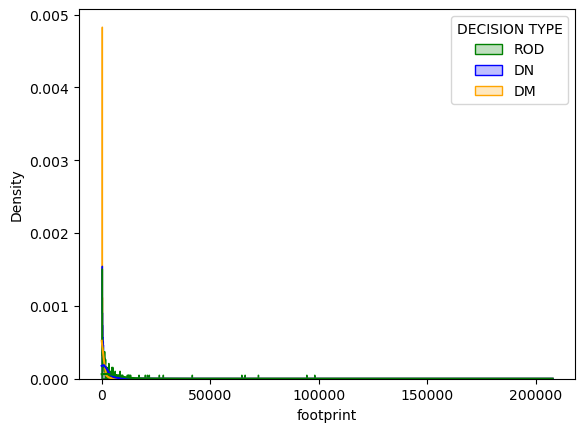

In [68]:
sns.histplot(data=df, x="footprint", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

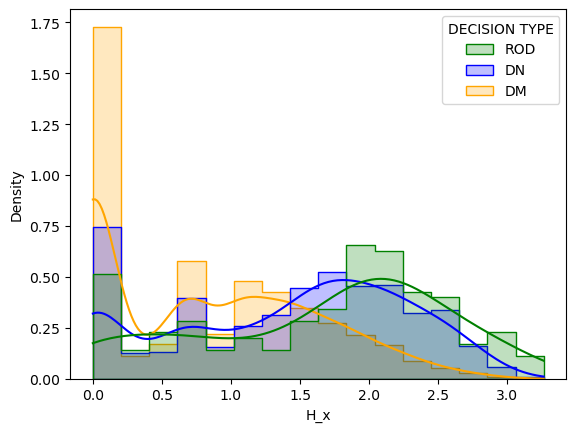

In [69]:
sns.histplot(data=df, x="H_x", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

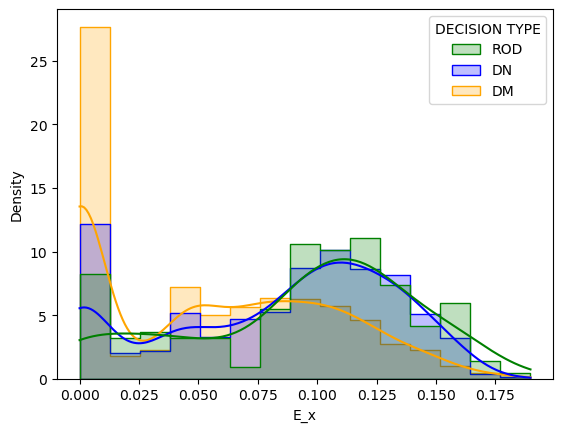

In [70]:
sns.histplot(data=df, x="E_x", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

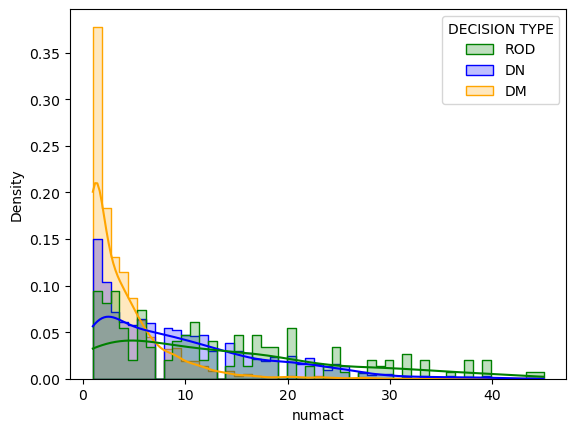

In [71]:
sns.histplot(data=df, x="numact", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

## Try out the Mann-Whitney U and Kruskal-Wallis one-way ANOVA to compare the means and medians between CE+EA, CE+EIS, and EIS+EA and to compared between all three NEPA types

In [106]:
# Mann-Whitney U for comparison between two groups with non-normal distributions
from scipy.stats import mannwhitneyu
# Kruskal-Wallis One-way ANOVA for comparison between multiple groups with non-normal distributions
from scipy import stats

In [107]:
#df_foot_dm.head(1)

In [108]:
# Project area
dm_totareha = df_foot_dm[~df_foot_dm['footprint'].isna()]
dn_totareha = df_foot_dn[~df_foot_dn['footprint'].isna()]
rod_totareha = df_foot_rod[~df_foot_rod['footprint'].isna()]

# Project richness
dm_projrich = df_foot_dm[~df_foot_dm['H'].isna()]
dn_projrich = df_foot_dn[~df_foot_dn['H'].isna()]
rod_projrich = df_foot_rod[~df_foot_rod['H'].isna()]

# Project evenness
dm_E = df_foot_dm[~df_foot_dm['E'].isna()]
dn_E = df_foot_dn[~df_foot_dn['E'].isna()]
rod_E = df_foot_rod[~df_foot_rod['E'].isna()]

In [109]:
print("Mann-WhitneyU results for total area (ha)")
U1, p = mannwhitneyu(dm_totareha['footprint'].values, dn_totareha['footprint'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EA): " +str(p))

U1, p = mannwhitneyu(dm_totareha['footprint'].values, rod_totareha['footprint'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EIS): " +str(p))

U1, p = mannwhitneyu(dn_totareha['footprint'].values, rod_totareha['footprint'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (EA+EIS): " +str(p))

print("CE total area mean = " + str(dm_totareha['footprint'].mean()))
print("CE total area median = " + str(dm_totareha['footprint'].median()))
print("EA total area mean = " + str(dn_totareha['footprint'].mean()))
print("EA total area median = " + str(dn_totareha['footprint'].median()))
print("EIS total area mean = " + str(rod_totareha['footprint'].mean()))
print("EIS total area median = " + str(rod_totareha['footprint'].median()))

Mann-WhitneyU results for total area (ha)
W-stat: 976238.5
p-value (CE+EA): 7.192116273841032e-138
W-stat: 85920.0
p-value (CE+EIS): 3.826112420855537e-39
W-stat: 97098.0
p-value (EA+EIS): 1.248984121784704e-07
CE total area mean = 613.1655424181922
CE total area median = 99.8223119000655
EA total area mean = 2080.9367941167066
EA total area median = 624.783867415907
EIS total area mean = 5550.621098054689
EIS total area median = 1362.5988501061652


In [110]:
# Check with Matt and Cory. Should I use PROJ_RICHNESS or numact?

print("Mann-WhitneyU results for activity type counts")
U1, p = mannwhitneyu(dm_projrich['numact'].values, dn_projrich['numact'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EA): " +str(p))

U1, p = mannwhitneyu(dm_projrich['numact'].values, rod_projrich['numact'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EIS): " +str(p))

U1, p = mannwhitneyu(dn_projrich['numact'].values, rod_projrich['numact'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (EA+EIS): " +str(p))

print("CE activity count mean = " + str(dm_projrich['numact'].mean()))
print("CE activity count median = " + str(dm_projrich['numact'].median()))
print("EA activity count mean = " + str(dn_projrich['numact'].mean()))
print("EA activity count median = " + str(dn_projrich['numact'].median()))
print("EIS activity count mean = " + str(rod_projrich['numact'].mean()))
print("EIS activity count median = " + str(rod_projrich['numact'].median()))

Mann-WhitneyU results for activity type counts
W-stat: 968327.5
p-value (CE+EA): 3.3667873912645008e-143
W-stat: 86048.0
p-value (CE+EIS): 1.8038494604491487e-40
W-stat: 105287.0
p-value (EA+EIS): 8.64568982558497e-05
CE activity count mean = 3.936514355034371
CE activity count median = 3.0
EA activity count mean = 9.706078824315297
EA activity count median = 8.0
EIS activity count mean = 13.38953488372093
EIS activity count median = 11.0


In [111]:
print("Mann-WhitneyU results for Shannon evennes index")
U1, p = mannwhitneyu(dm_E['E'].values, dn_E['E'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EA): " +str(p))

U1, p = mannwhitneyu(dm_E['E'].values, rod_E['E'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EIS): " +str(p))

U1, p = mannwhitneyu(dn_E['E'].values, rod_E['E'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (EA+EIS): " +str(p))

print("CE Shannon evenness mean = " + str(dm_E['E'].mean()))
print("CE Shannon evenness median = " + str(dm_E['E'].median()))
print("EA Shannon evenness mean = " + str(dn_E['E'].mean()))
print("EA Shannon evenness median = " + str(dn_E['E'].median()))
print("EIS Shannon evenness mean = " + str(rod_E['E'].mean()))
print("EIS Shannon evenness median = " + str(rod_E['E'].median()))

Mann-WhitneyU results for Shannon evennes index
W-stat: 1234555.0
p-value (CE+EA): 1.5681843115319363e-70
W-stat: 122644.0
p-value (CE+EIS): 3.790067932912096e-21
W-stat: 115991.0
p-value (EA+EIS): 0.033002025171029466
CE Shannon evenness mean = 0.05507307358841849
CE Shannon evenness median = 0.0521489979792427
EA Shannon evenness mean = 0.08398058237969694
EA Shannon evenness median = 0.09499417854039
EIS Shannon evenness mean = 0.09253731377457193
EIS Shannon evenness median = 0.1016612096413685


In [112]:
print("Mann-WhitneyU results for Shannon H index")
print("Mann-WhitneyU results for activity type counts")
U1, p = mannwhitneyu(dm_projrich['H'].values, dn_projrich['H'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EA): " +str(p))

U1, p = mannwhitneyu(dm_projrich['H'].values, rod_projrich['H'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (CE+EIS): " +str(p))

U1, p = mannwhitneyu(dn_projrich['H'].values, rod_projrich['H'].values, method="auto")
print("W-stat: " + str(U1))
print("p-value (EA+EIS): " +str(p))

print("CE activity count mean = " + str(dm_projrich['H'].mean()))
print("CE activity count median = " + str(dm_projrich['H'].median()))
print("EA activity count mean = " + str(dn_projrich['H'].mean()))
print("EA activity count median = " + str(dn_projrich['H'].median()))
print("EIS activity count mean = " + str(rod_projrich['H'].mean()))
print("EIS activity count median = " + str(rod_projrich['H'].median()))

Mann-WhitneyU results for Shannon H index
Mann-WhitneyU results for activity type counts
W-stat: 1119080.0
p-value (CE+EA): 1.1666717886561628e-98
W-stat: 102965.0
p-value (CE+EIS): 1.2868808435294968e-30
W-stat: 107539.0
p-value (EA+EIS): 0.0003920788103329971
CE activity count mean = 0.8308972026283549
CE activity count median = 0.693147180559945
EA activity count mean = 1.4176499957052813
EA activity count median = 1.58609736640021
EIS activity count mean = 1.6502815321244135
EIS activity count median = 1.9116672278668552


In [113]:
K, p = stats.kruskal(dm_totareha['footprint'], dn_totareha['footprint'], rod_totareha['footprint'])
print("Kruskal-Wallis for total area (ha)")
print("chi-sq: " + str(K))
print("p-value: " + str(p))

Kruskal-Wallis for total area (ha)
chi-sq: 717.7509795862779
p-value: 1.3878901467118282e-156


In [114]:
# Check with Matt and Cory, should I use PROJ_RICHNESS or numact?

K, p = stats.kruskal(dm_projrich['numact'], dn_projrich['numact'], rod_projrich['numact'])
print("Kruskal-Wallis for activity type counts")
print("chi-sq: " + str(K))
print("p-value: " + str(p))

Kruskal-Wallis for activity type counts
chi-sq: 738.4045318594337
p-value: 4.544574220233965e-161


In [115]:
K, p = stats.kruskal(dm_E['E'], dn_E['E'], rod_E['E'])
print("Kruskal-Wallis for Shannon evenness index")
print("chi-sq: " + str(K))
print("p-value: " + str(p))

Kruskal-Wallis for Shannon evenness index
chi-sq: 359.62842715269016
p-value: 8.08498607081376e-79


In [116]:
K, p = stats.kruskal(dm_projrich['H'], dn_projrich['H'], rod_projrich['H'])
print("Kruskal-Wallis for activity type counts")
print("chi-sq: " + str(K))
print("p-value: " + str(p))

Kruskal-Wallis for activity type counts
chi-sq: 513.5266300611489
p-value: 3.083962773438266e-112


I may need to use the totareaha data with the outliers removed. One of the assumptions of the Kruskal-Wallis test is that the two groups have a similar spread in data.

### Removed the outliers

In [166]:
dm_totareaha_nofliers = df_dm[df_dm['footprint'] < 81.0]

dn_totareaha_nofliers =  df_dn[df_dn['footprint'] < 339.0]

rod_totareaha_nofliers =  df_rod[df_rod['footprint'] < 529.75]


In [167]:
K, p = stats.kruskal(dm_totareaha_nofliers['footprint'], dn_totareaha_nofliers['footprint'], rod_totareaha_nofliers['footprint'])
print("Kruskal-Wallis for total area (ha)")
print("chi-sq: " + str(K))
print("p-value: " + str(p))

Kruskal-Wallis for total area (ha)
chi-sq: 424.5029495013752
p-value: 6.612348579280877e-93


The spread is still too much if I removed outliers by NEPA type. I could removed the outliers from the overall sample, but I don't like that for some reason.

I could also do a Welch ANOVA. I found this code https://github.com/scipy/scipy/issues/11122 because this does not exist in scipy.stats.

def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni =np.array([len(arg) for arg in args])
    mi =np.array([np.mean(arg) for arg in args])
    vi =np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = special.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [101]:
import collections
import scipy
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = collections.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni =np.array([len(arg) for arg in args])
    mi =np.array([np.mean(arg) for arg in args])
    vi =np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = scipy.special.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [102]:
F, p = welch_anova_np(dm_totareha['footprint'], dn_totareha['footprint'], rod_totareha['footprint'])

print("Welch ANOVA for total area (ha)")
print("F-stat: " + str(F))
print("p-value: " + str(p))


Welch ANOVA for total area (ha)
F-stat: 36.93409400910382
p-value: 1.6917581063324701e-15


## Other Histograms and Boxplots

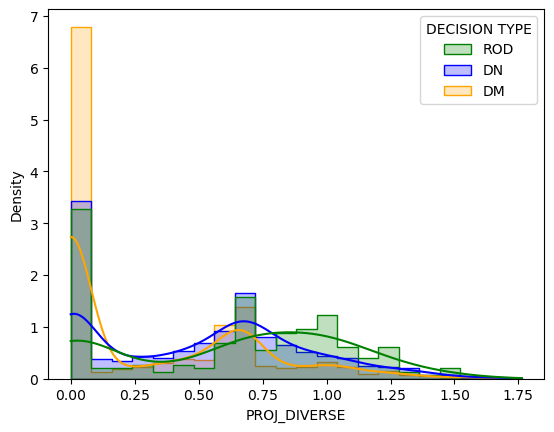

In [210]:
sns.histplot(data=df, x="PROJ_DIVERSE", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

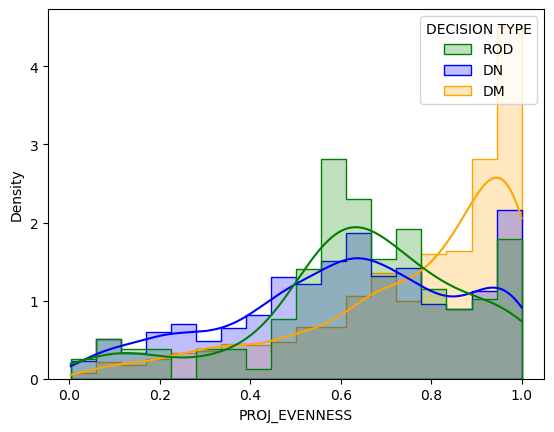

In [211]:
sns.histplot(data=df, x="PROJ_EVENNESS", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

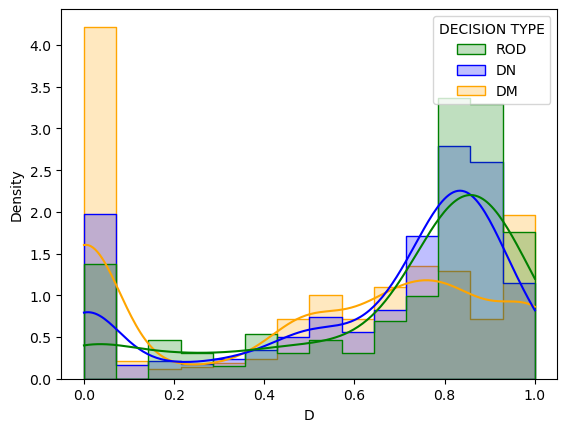

In [212]:
sns.histplot(data=df, x="D", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

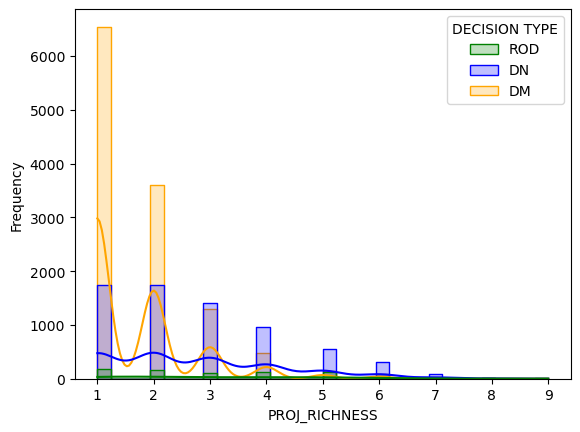

In [214]:
sns.histplot(data=df, x="PROJ_RICHNESS", hue="DECISION TYPE", 
             stat='frequency', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

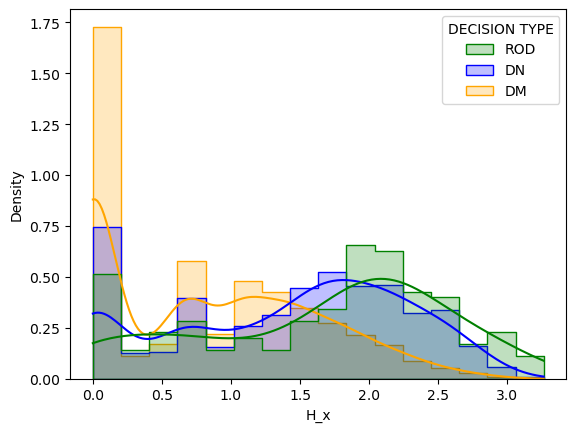

In [88]:
sns.histplot(data=df, x="H_x", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

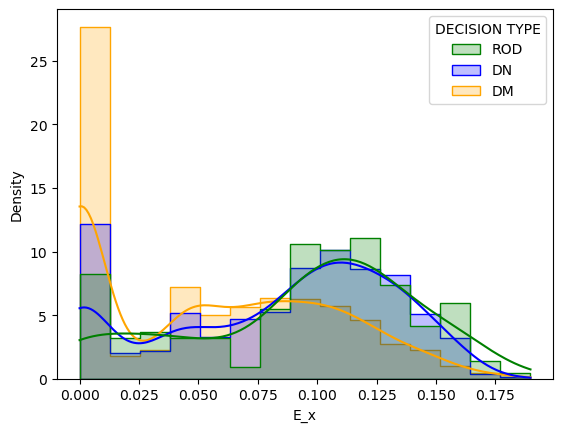

In [89]:
sns.histplot(data=df, x="E_x", hue="DECISION TYPE", 
             stat='density', element='step', common_norm=False, kde=True,
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) ;

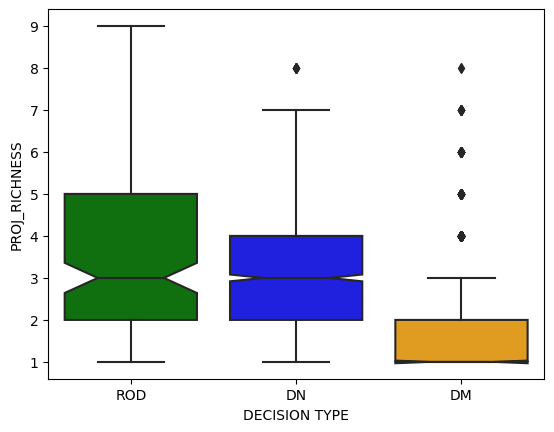

In [90]:
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

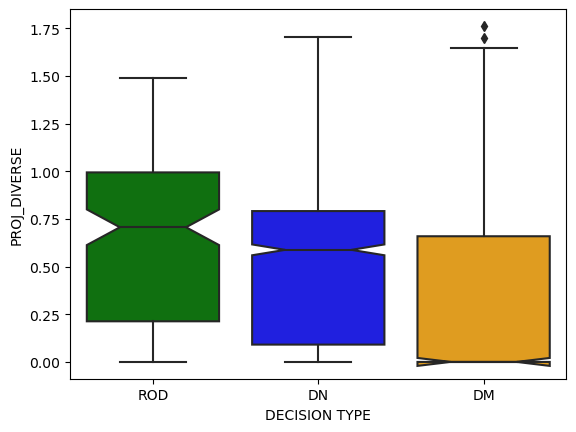

In [91]:
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_DIVERSE",
            notch=True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

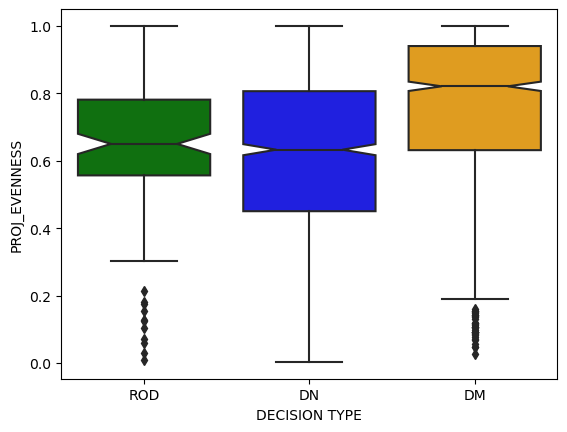

In [92]:
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_EVENNESS",
            notch=True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

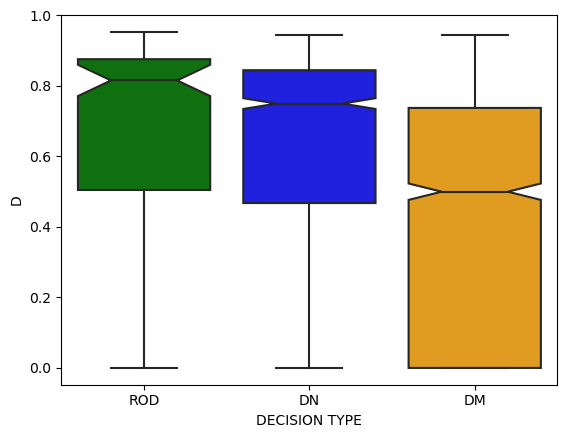

In [93]:
sns.boxplot(data=df, x="DECISION TYPE", y="D",
            notch=True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

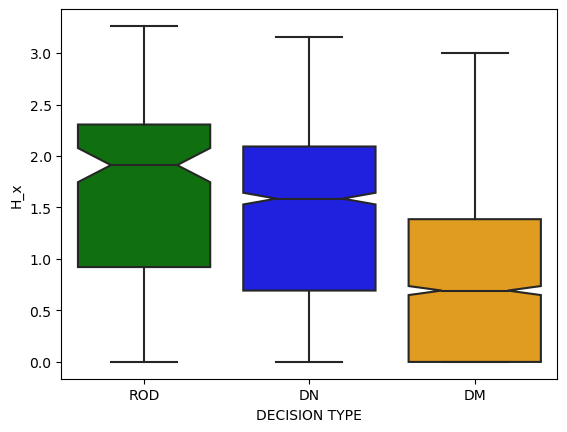

In [94]:
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

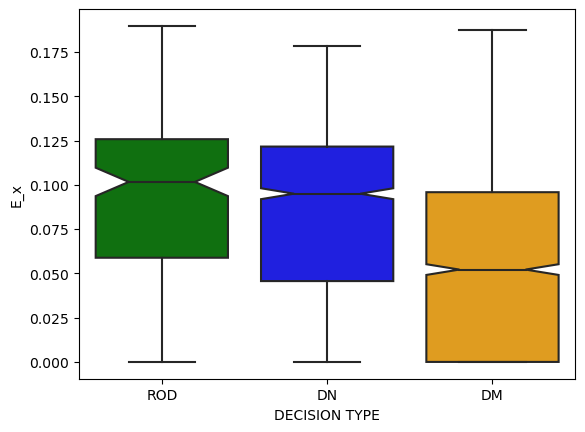

In [95]:
sns.boxplot(data=df, x="DECISION TYPE", y="E_x",
            notch=True, showfliers = False,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

## Define total area (ha) outliers

In [128]:
totareaha = df_foot['footprint'].values
totareaha = totareaha[~np.isnan(totareaha)]
#totareaha

In [129]:
len(totareaha)

4142

In [130]:
df_foot['DECISION TYPE'].loc[df_foot['footprint'] >= 0].value_counts()

DM     2473
DN     1497
ROD     172
Name: DECISION TYPE, dtype: int64

In [131]:
q3, q1 = np.percentile(totareaha, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("upper limit " + str(upper_bound))
print(lower_bound)

totareaha_outliers_up = df_foot.loc[df_foot['footprint'] > upper_bound]
totareaha_outliers_down = df_foot.loc[df_foot['footprint'] < lower_bound]

913.2249098675636 47.62655606997225
4695
865.5983537975914
upper limit 2211.6224405639505
-1250.770974626415


In [132]:
totareaha_outliers_up['DECISION TYPE'].value_counts()

DN     281
DM     138
ROD     66
Name: DECISION TYPE, dtype: int64

In [133]:
len(totareaha_outliers_up.loc[totareaha_outliers_up['DECISION TYPE'] == "ROD"])

66

In [134]:
len(totareaha_outliers_up.loc[totareaha_outliers_up['DECISION TYPE'] == "DN"])

281

In [135]:
len(totareaha_outliers_up.loc[totareaha_outliers_up['DECISION TYPE'] == "DM"])

138

In [136]:
# Get the outliers for CEs
totareaha_dm = df_foot_dm['footprint'].values
totareaha_dm = totareaha_dm[~np.isnan(totareaha_dm)]

q3, q1 = np.percentile(totareaha_dm, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("dm " + str(upper_bound))
print(lower_bound)

totareaha_dm_out_up = df_foot_dm.loc[df_foot_dm['footprint'] > upper_bound]
totareaha_dm_out_down = df_foot_dm.loc[df_foot_dm['footprint'] < lower_bound]

# Get the outliers for EAs
totareaha_dn = df_foot_dn['footprint'].values
totareaha_dn = totareaha_dn[~np.isnan(totareaha_dn)]

q3, q1 = np.percentile(totareaha_dn, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("dn " + str(upper_bound))
print(lower_bound)

totareaha_dn_out_up = df_foot_dn.loc[df_foot_dn['footprint'] > upper_bound]
totareaha_dn_out_down = df_foot_dn.loc[df_foot_dn['footprint'] < lower_bound]

# Get the outliers for EISs
totareaha_rod = df_foot_rod['footprint'].values
totareaha_rod = totareaha_rod[~np.isnan(totareaha_rod)]

q3, q1 = np.percentile(totareaha_rod, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("rod " + str(upper_bound))
print(lower_bound)

totareaha_rod_out_up = df_foot_rod.loc[df_foot_rod['footprint'] > upper_bound]
totareaha_rod_out_down = df_foot_rod.loc[df_foot_rod['footprint'] < lower_bound]

411.925275863706 25.1188181246217
4695
386.8064577390843
dm 992.1349624723325
-555.0908684840048
1603.1288263307401 196.753066838891
4695
1406.375759491849
dn 3712.692465568514
-1912.8105723988826
4502.376833126693 397.0920210974573
4695
4105.284812029236
rod 10660.304051170546
-5760.835196946396


In [137]:
print(len(totareaha_dm_out_up))
print(len(totareaha_dn_out_up))
print(len(totareaha_rod_out_up))

307
182
17


In [138]:
assesstime = df['ASSESSMENT_TIME'].values
assesstime = assesstime[~np.isnan(assesstime)]

In [139]:
q3, q1 = np.percentile(assesstime, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("upper limit " + str(upper_bound))
print(lower_bound)

assesstime_outliers_up = df.loc[df['ASSESSMENT_TIME'] > upper_bound]
assesstime_outliers_down = df.loc[df['ASSESSMENT_TIME'] < lower_bound]

491.0 92.0
4695
399.0
upper limit 1089.5
-506.5


In [140]:
# Get the outliers by NEPA assessment time

# Get the outliers for CEs
assesstime_dm = df_dm['ASSESSMENT_TIME'].values
assesstime_dm = assesstime_dm[~np.isnan(assesstime_dm)]

q3, q1 = np.percentile(assesstime_dm, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("dm " + str(upper_bound))
print(lower_bound)

assesstime_dm_out_up = df_dm.loc[df_dm['ASSESSMENT_TIME'] > upper_bound]
assesstime_dm_out_down = df_dm.loc[df_dm['ASSESSMENT_TIME'] < lower_bound]

# Get the outliers for EAs
assesstime_dn = df_dn['ASSESSMENT_TIME'].values
assesstime_dn = assesstime_dn[~np.isnan(assesstime_dn)]

q3, q1 = np.percentile(assesstime_dn, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("dn " + str(upper_bound))
print(lower_bound)

assesstime_dn_out_up = df_dn.loc[df_dn['ASSESSMENT_TIME'] > upper_bound]
assesstime_dn_out_down = df_dn.loc[df_dn['ASSESSMENT_TIME'] < lower_bound]

# Get the outliers for EISs
assesstime_rod = df_rod['ASSESSMENT_TIME'].values
assesstime_rod = assesstime_rod[~np.isnan(assesstime_rod)]

q3, q1 = np.percentile(assesstime_rod, [75, 25])
print(q3, q1)
print(len(df))
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print("rod " + str(upper_bound))
print(lower_bound)

assesstime_rod_out_up = df_rod.loc[df_rod['ASSESSMENT_TIME'] > upper_bound]
assesstime_rod_out_down = df_rod.loc[df_rod['ASSESSMENT_TIME'] < lower_bound]

251.0 60.0
4695
191.0
dm 537.5
-226.5
776.0 277.0
4695
499.0
dn 1524.5
-471.5
1377.0 577.0
4695
800.0
rod 2577.0
-623.0


In [141]:
print(len(assesstime_dm_out_up))
print(len(assesstime_dn_out_up))
print(len(assesstime_rod_out_up))

185
66
6


In [142]:
# Create dataframes for the project area (ha) outliers and the Assessment time outliers and save to a csv

df_totareaha_outliers_nepa = df_foot.loc[(df_foot['DECISION TYPE'] == "DM") & (df_foot['footprint'] >= 992.1) | (df_foot['DECISION TYPE'] == "DN") & (df_foot['footprint'] >= 3712.7) | (df_foot['DECISION TYPE'] == "ROD") & (df_foot['footprint'] >= 10660)]

#df_assesstime_outliers_nepa = df_foot.loc[(df_foot['DECISION TYPE'] == "DM") & (df_foot['ASSESSMENT_TIME'] >= 537.0) | (df['DECISION TYPE'] == "DN") & (df['ASSESSMENT_TIME'] >= 1514.5) | (df['DECISION TYPE'] == "ROD") & (df['ASSESSMENT_TIME'] >= 2536.875)]

df_totareaha_outliers = df_foot.loc[df_foot['footprint'] >= 2211.6].copy()

#df_assesstime_outliers = df_foot.loc[df_foot['ASSESSMENT_TIME'] >= 1122.5].copy()


In [143]:
print(len(df_totareaha_outliers))
#print(len(df_assesstime_outliers))
print(len(df_totareaha_outliers_nepa))
#print(len(df_assesstime_outliers_nepa))

485
506


In [144]:
print("total df " + "\n" + str(df_foot['DECISION TYPE'].value_counts()))

print("overall area outliers " + "\n" + str(df_totareaha_outliers['DECISION TYPE'].value_counts()))
#print("overall assess outliers " + "\n" + str(df_assesstime_outliers['DECISION TYPE'].value_counts()))

print("nepa specific area outliers " + "\n" + str(df_totareaha_outliers_nepa['DECISION TYPE'].value_counts()))
#print("nepa specific assess outliers " + "\n" + str(df_assesstime_outliers_nepa['DECISION TYPE'].value_counts()))

total df 
DM     2473
DN     1497
ROD     172
Name: DECISION TYPE, dtype: int64
overall area outliers 
DN     281
DM     138
ROD     66
Name: DECISION TYPE, dtype: int64
nepa specific area outliers 
DM     307
DN     182
ROD     17
Name: DECISION TYPE, dtype: int64


In [145]:
print(df_totareaha_outliers['REGION'].value_counts())
#print(df_assesstime_outliers['REGION'].value_counts())

#print(df_totareaha_outliers_nepa['DECISION TYPE'].value_counts())
#print(df_assesstime_outliers_nepa['DECISION TYPE'].value_counts())

8.0     126
6.0      79
4.0      55
3.0      52
9.0      48
2.0      47
1.0      42
5.0      33
10.0      3
Name: REGION, dtype: int64


In [146]:
df_assesstime_outliers['REGION'].loc[df_assesstime_outliers['DECISION TYPE'] == "DM"].value_counts()

NameError: name 'df_assesstime_outliers' is not defined

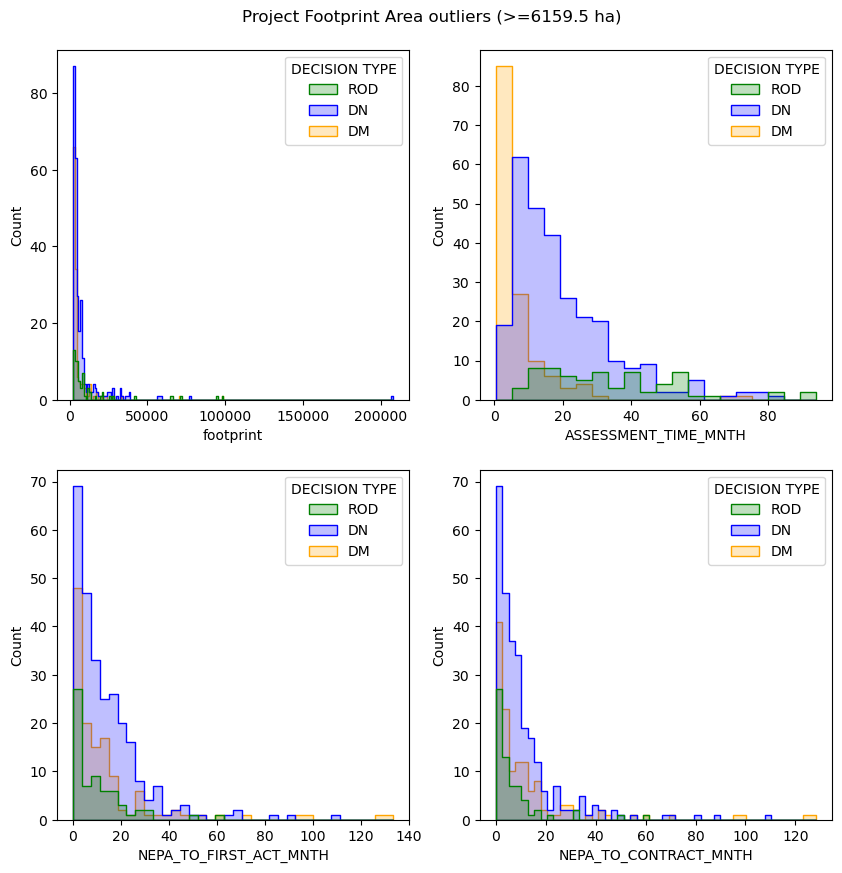

In [147]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=False)

sns.histplot(data=df_totareaha_outliers, x="footprint", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])

sns.histplot(data=df_totareaha_outliers, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_totareaha_outliers, x="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_totareaha_outliers, x="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

plt.suptitle("Project Footprint Area outliers (>=6159.5 ha)", y=0.92)

plt.show()

NameError: name 'df_assesstime_outliers' is not defined

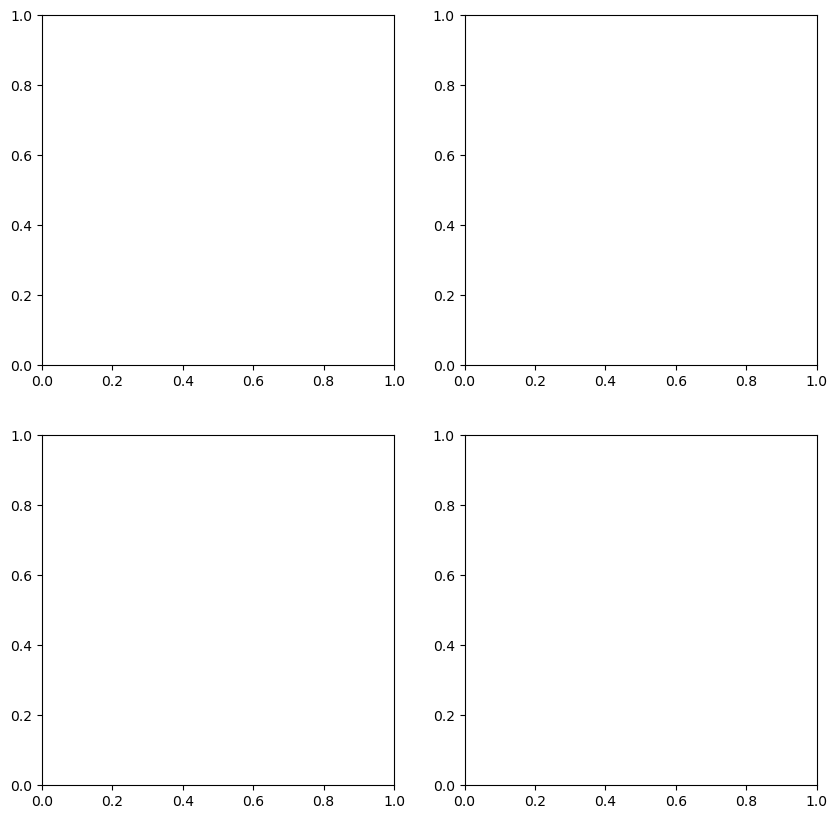

In [148]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=False)

sns.histplot(data=df_assesstime_outliers, x="footprint", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=True, ax=ax[0,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])

sns.histplot(data=df_assesstime_outliers, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_assesstime_outliers, x="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_assesstime_outliers, x="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

plt.suptitle("Project Assessment Time outliers (>=1122.5 days)", y=0.92)

plt.show()

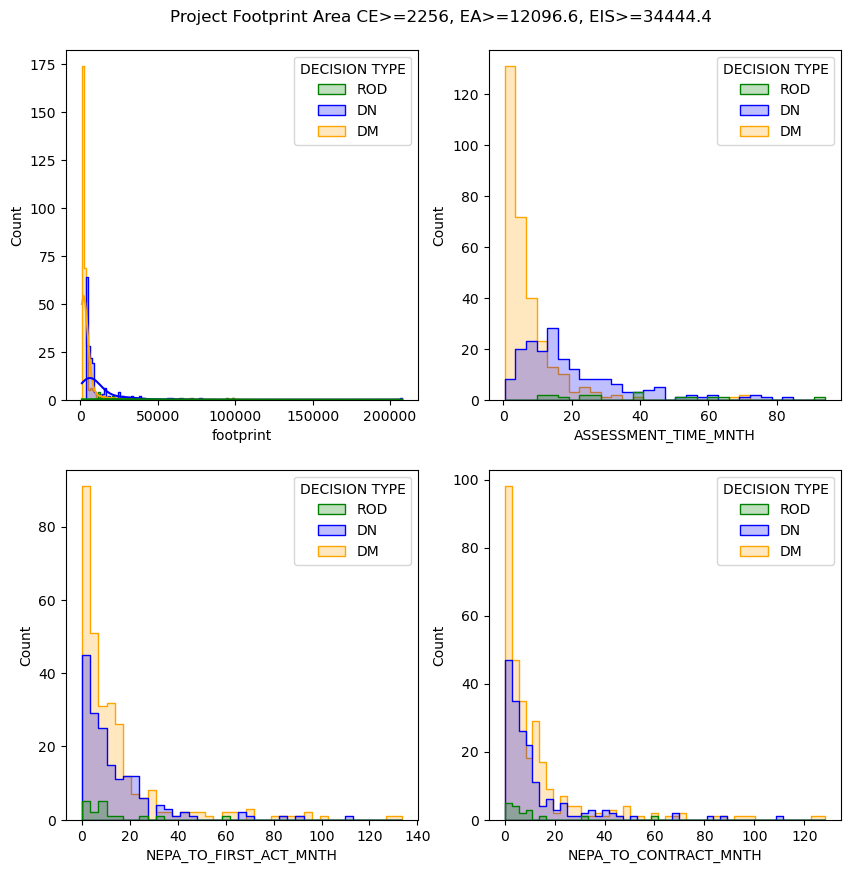

In [149]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=False)

sns.histplot(data=df_totareaha_outliers_nepa, x="footprint", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=True, ax=ax[0,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])

sns.histplot(data=df_totareaha_outliers_nepa, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_totareaha_outliers_nepa, x="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_totareaha_outliers_nepa, x="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

plt.suptitle("Project Footprint Area CE>=2256, EA>=12096.6, EIS>=34444.4", y=0.92)

plt.show()

NameError: name 'df_assesstime_outliers_nepa' is not defined

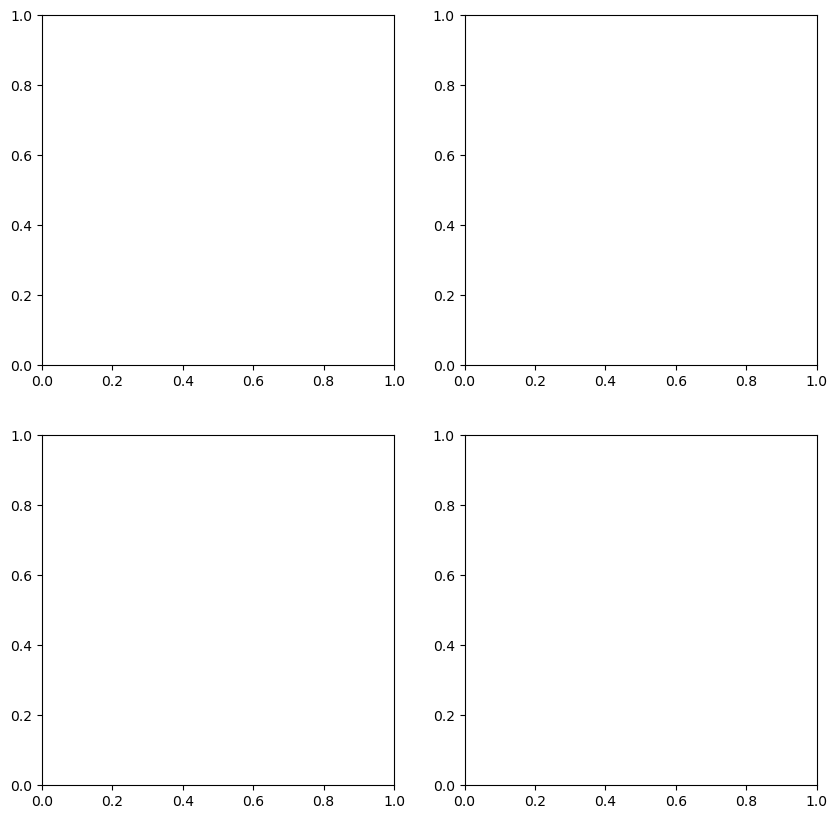

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=False)

sns.histplot(data=df_assesstime_outliers_nepa, x="footprint", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])

sns.histplot(data=df_assesstime_outliers_nepa, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[0,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_assesstime_outliers_nepa, x="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

sns.histplot(data=df_assesstime_outliers_nepa, x="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=False, ax=ax[1,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"]) 

plt.suptitle("Project Assessment Time outliers CE>=537, EA>=1514.5, EIS>=2536.9", y=0.92)

plt.show()

In [ ]:
'''df_totareaha_outliers.to_csv(raw_data_dir + "df_totareaha_outliers_c20221219.csv", index=False)
df_assesstime_outliers.to_csv(raw_data_dir + "df_assesstime_outliers_c20221219.csv", index=False)
df_totareaha_outliers_nepa.to_csv(raw_data_dir + "df_totareaha_outliers_nepa_c20221219.csv", index=False)
df_assesstime_outliers_nepa.to_csv(raw_data_dir + "df_assesstime_outliers_nepa_c20221219.csv", index=False)'''

In [151]:
df_totareaha_nofliers = df_foot.loc[df_foot['footprint'] < upper_bound]
#df_totareaha_nofliers = df.loc[df['totareaha'] > lower_bound]

In [152]:
df_totareaha_nofliers_nepa = df_foot.loc[(df_foot['DECISION TYPE'] == "DM") & (df_foot['footprint'] < 992.1) | (df_foot['DECISION TYPE'] == "DN") & (df_foot['footprint'] < 3712.7) | (df_foot['DECISION TYPE'] == "ROD") & (df_foot['footprint'] < 10660)]
#df_totareaha_nofliers_nepa = df.loc[(df['DECISION TYPE'] == "DN") & (df['totareaha'] < 339.4)]
#df_totareaha_nofliers_nepa = df.loc[(df['DECISION TYPE'] == "ROD") & (df['totareaha'] < 515)]




## Boxplots, violin plots, and density plots for total area (ha), activity type count (project richness), and Shannon evenness. Start making plots with multiple panels

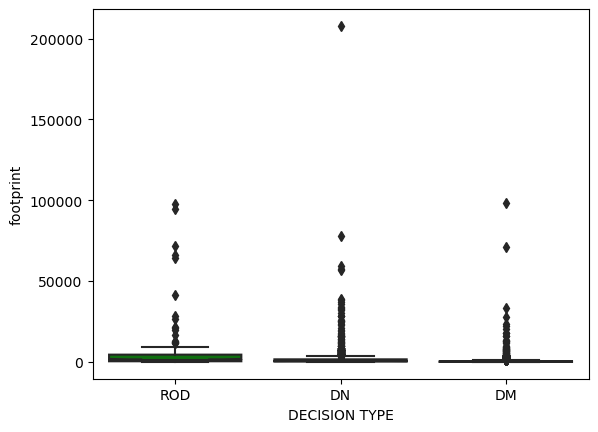

In [180]:
sns.boxplot(data=df_foot, x="DECISION TYPE", y="footprint",
            whis = 1.5, #default is 1.5
            notch=True, showfliers = True,
           hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"],
           order=["ROD", "DN", "DM"]);

<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

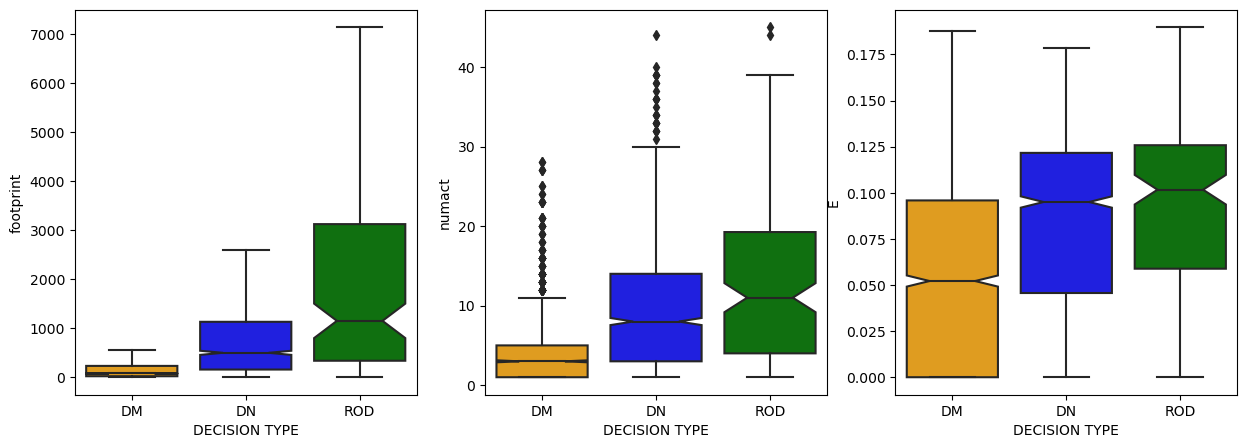

In [167]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, boxplot)
sns.boxplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
            notch=True, showfliers=False, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="numact",
            notch=True, showfliers=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliers_actrich_E_2009_2021_allpurp_20230124.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

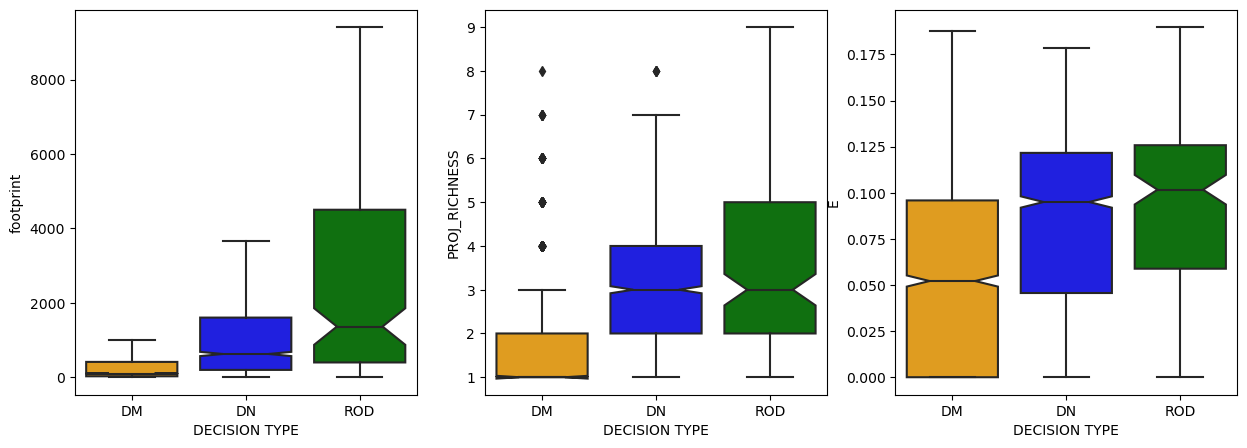

In [168]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, boxplot)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="footprint",
            notch=True, showfliers=False, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True, showfliers=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliers_actrich_E_2009_2021_allpurp_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

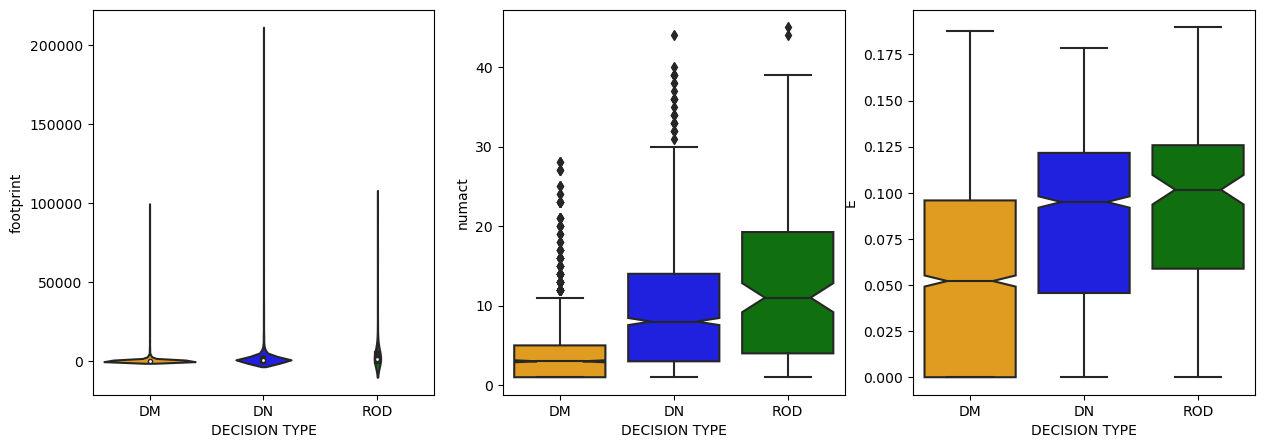

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violine plot)
sns.violinplot(data=df_foot, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="numact", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=False, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

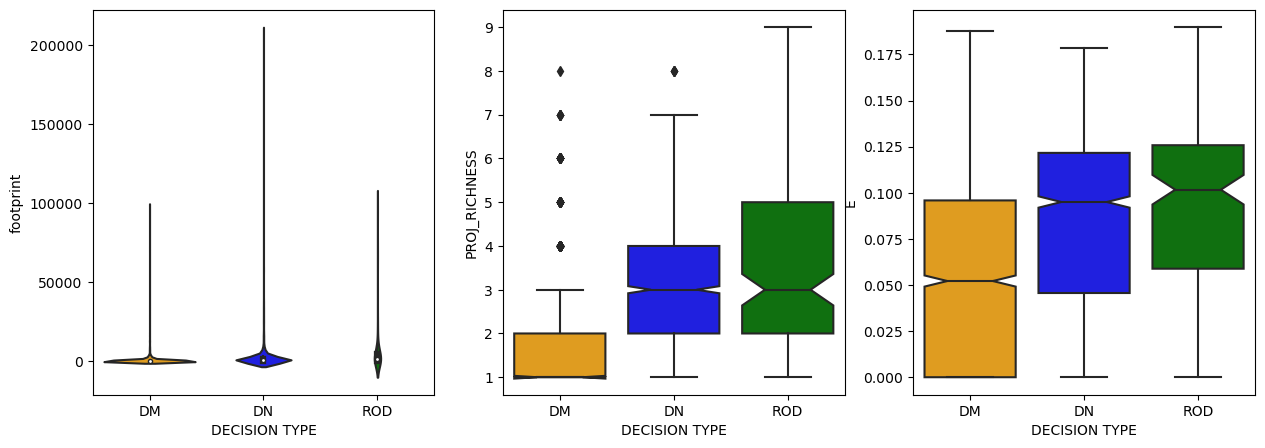

In [170]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violine plot)
sns.violinplot(data=df_foot, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="PROJ_RICHNESS", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=False, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_actrich_E_20230120.pdf", transparent=True)


(-5.0, 150.0)

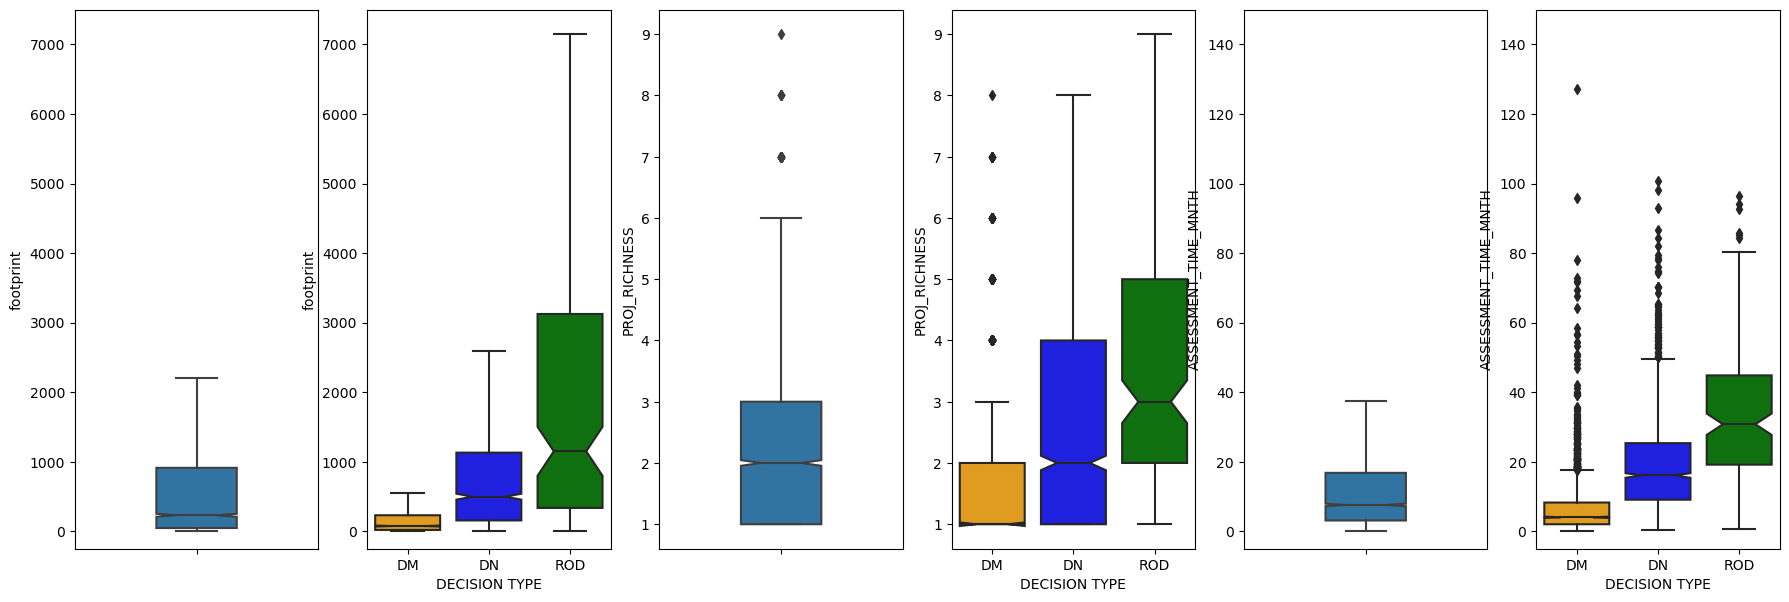

In [238]:
fig, ax = plt.subplots(1, 6, figsize=(22,7), sharex=False, sharey=False)

# Ax[0,0] project area (footprint, violine plot) from smaller dataset (df_foot used to make the nofliers)
ax0 = sns.boxplot(data=df_foot, y="footprint",
               notch=True, showfliers=False, width = 0.33, ax=ax[0])
ax1 = sns.boxplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
               notch=True, showfliers=False, ax=ax[1],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])
ax0.set_ylim([-250, 7500])
ax1.set_ylim([-250, 7500])

# Ax[0,1] activity type richness, from larger dataset (df)
ax2 = sns.boxplot(data=df, y="PROJ_RICHNESS",
               notch=True, showfliers=True, width = 0.33, ax=ax[2])
ax3 = sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[3],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[0,1] activity type richness, from larger dataset (df)
ax4 = sns.boxplot(data=df_totareaha_nofliers_nepa, y="ASSESSMENT_TIME_MNTH",
               notch=True, showfliers=False, width=0.33, ax=ax[4])
ax5 = sns.boxplot(data=df_foot, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[5],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])
ax4.set_ylim([-5, 150])
ax5.set_ylim([-5, 150])


# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_acttye_20230128v02.pdf", transparent=True)


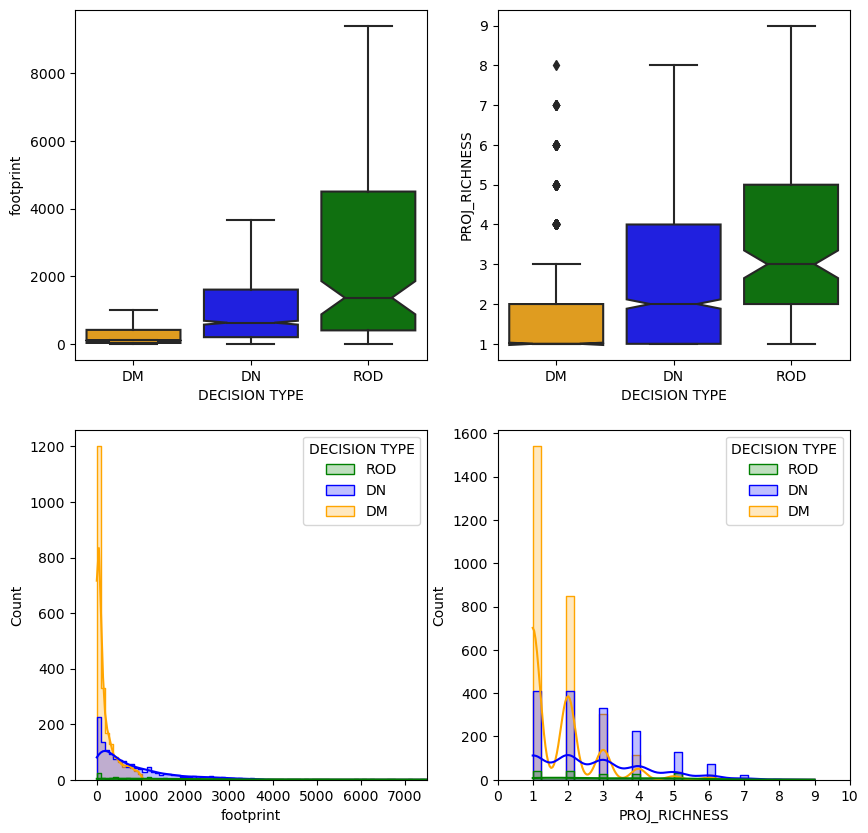

In [238]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=False)

# Ax[0,0] project area (footprint, box plot) from smaller dataset (df_foot used to make the nofliers)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="footprint",
               notch=True, showfliers=False, ax=ax[0,0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[0,1] activity type richness, from larger dataset (df)
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[0,1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])


# Ax[1,0] project area (footprint) from smaller dataset (df_foot used to make the nofliers)
sns.histplot(data=df_totareaha_nofliers_nepa, x="footprint", hue="DECISION TYPE", bins=100,
             stat='count', element='step', common_norm=False, kde=True, ax=ax[1,0],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])
ax[1,0].set_xlim(-500,7500)
ax[1,0].set_xticks(range(0,8000, 1000))

# Ax[1,1] activity type richness from larger dataset (df)
sns.histplot(data=df, x="PROJ_RICHNESS", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=True, ax=ax[1,1],
            hue_order=["ROD", "DN", "DM"], palette=["green", "blue", "orange"])
ax[1,1].set_xlim(0.5,9)
ax[1,1].set_xticks(range(0,11))

#plt.show()

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliers_acttye__hist_20230126.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

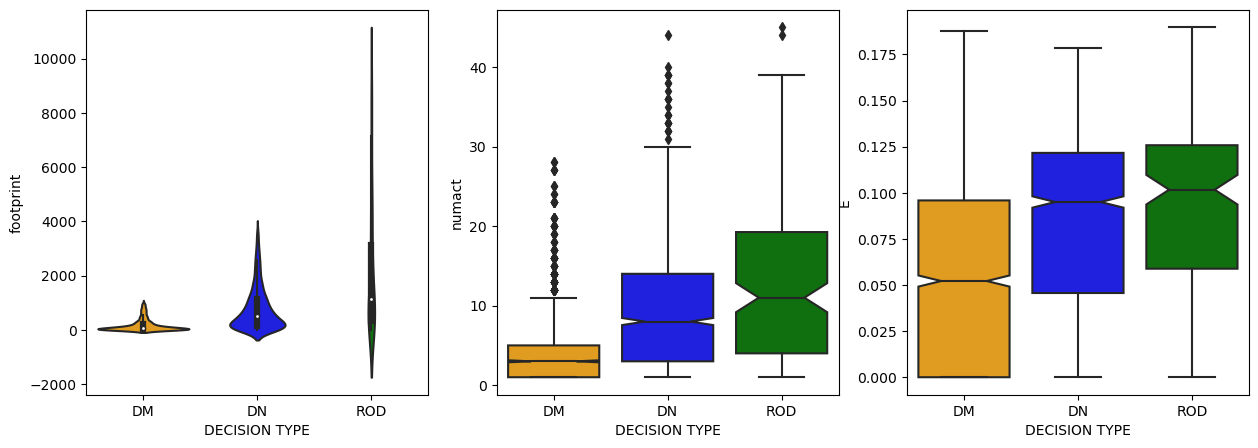

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violine plot)
sns.violinplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="numact", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=False, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

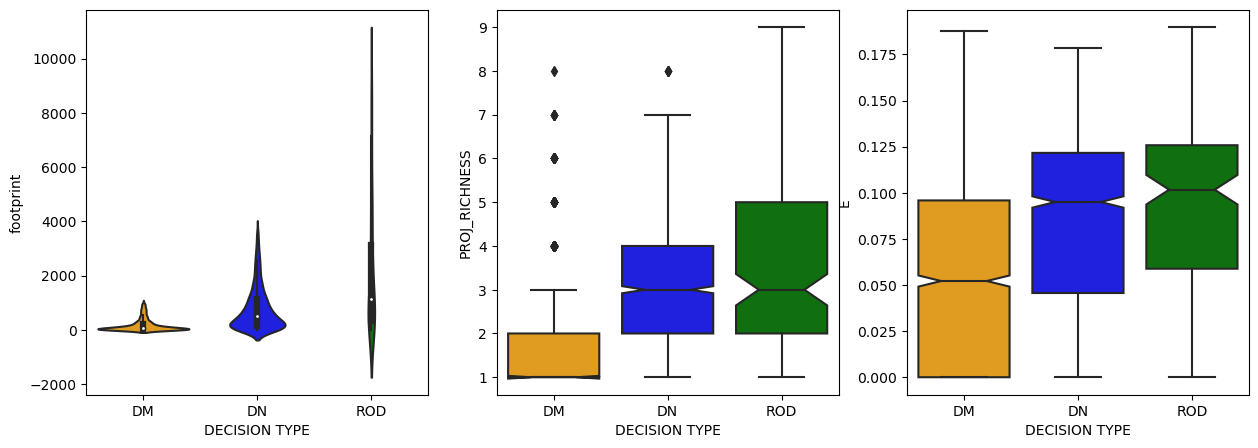

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violine plot)
sns.violinplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="PROJ_RICHNESS", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=False, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

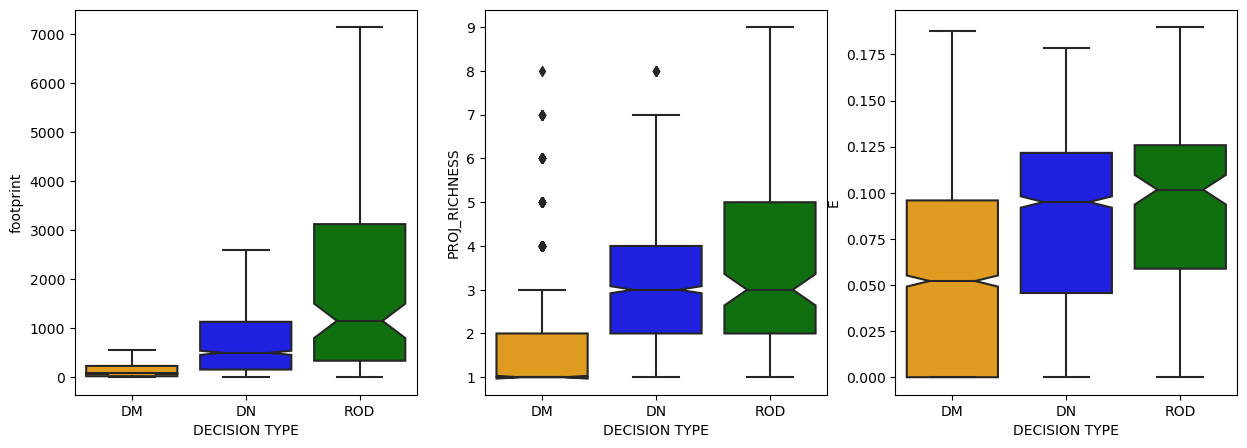

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, boxplot)
sns.boxplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
            notch=True, showfliers=False, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])
x
# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="PROJ_RICHNESS", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=False, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areabox_nofliersdf_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E_x'>

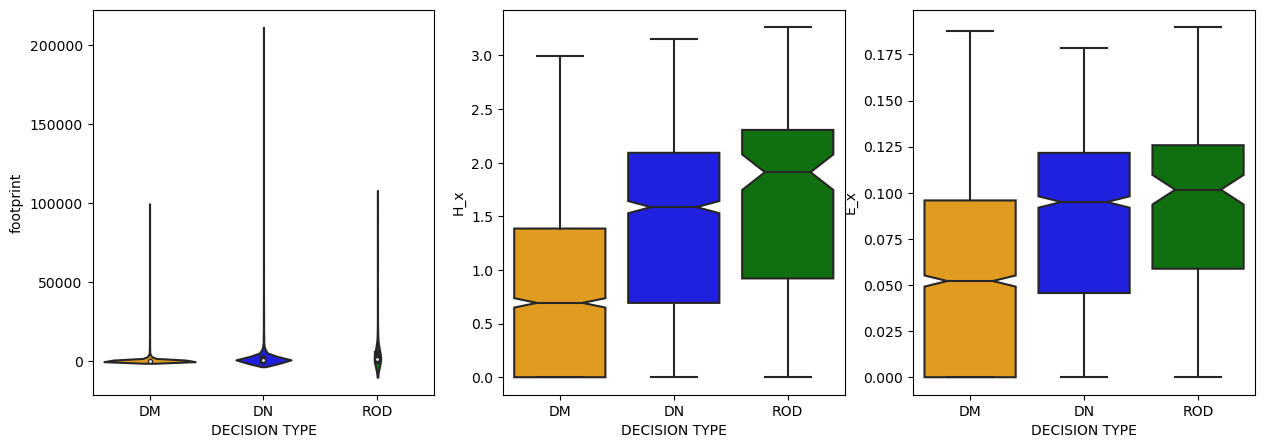

In [130]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violin plot)
sns.violinplot(data=df, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df, x="DECISION TYPE", y="E_x",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areavio_actrich_E_2009_2021_allpurp_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

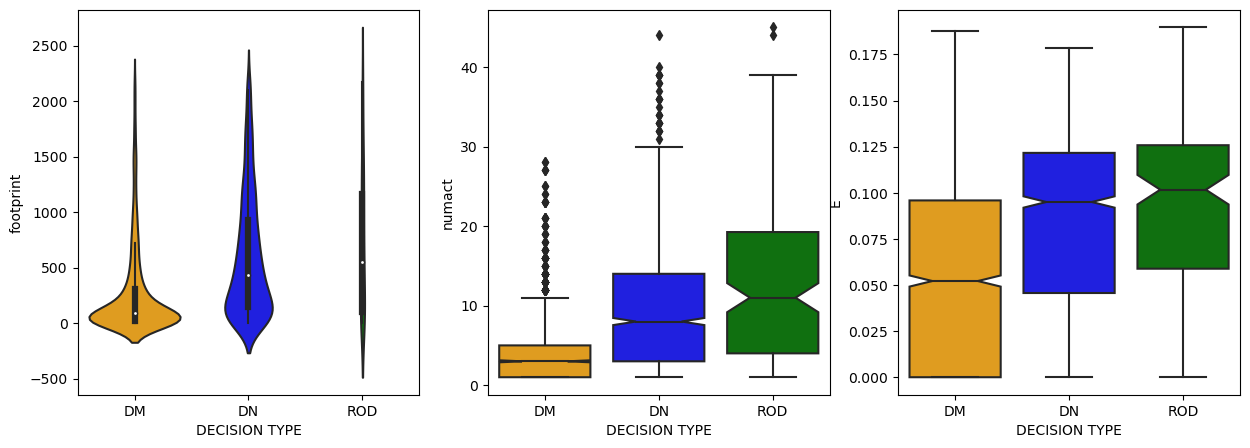

In [202]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violin plot)
sns.violinplot(data=df_totareaha_nofliers, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df_foot, x="DECISION TYPE", y="numact", # Either numact or PROJ_RICHNESS
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df_foot, x="DECISION TYPE", y="E",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areavio_nofliersdf_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E_x'>

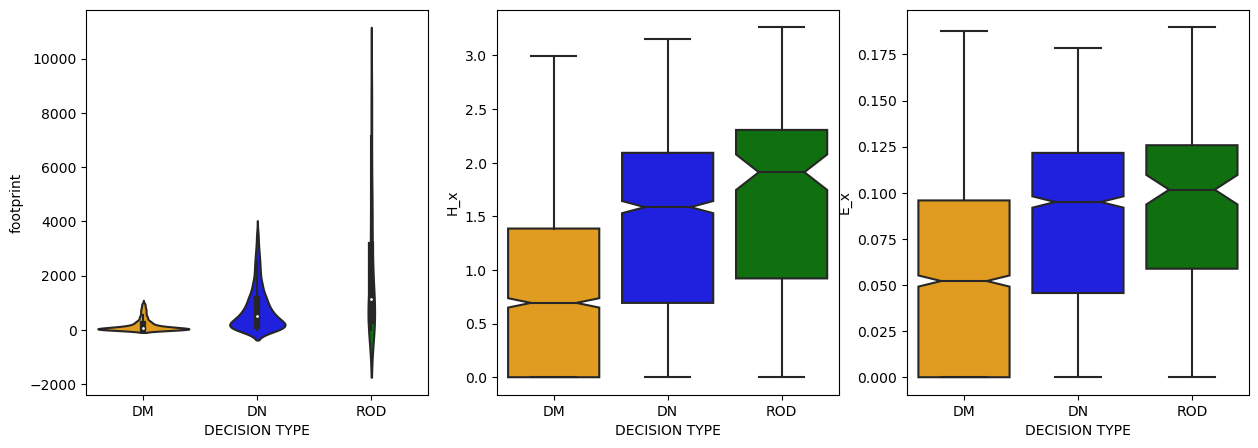

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint, violin plot)
sns.violinplot(data=df_totareaha_nofliers_nepa, x="DECISION TYPE", y="footprint",
               scale="count", inner="box", ax=ax[0],
               hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
               order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df, x="DECISION TYPE", y="E_x",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areavio_nofliersnepadf_actrich_E_2009_2021_allpurp_20230120_v03.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E_x'>

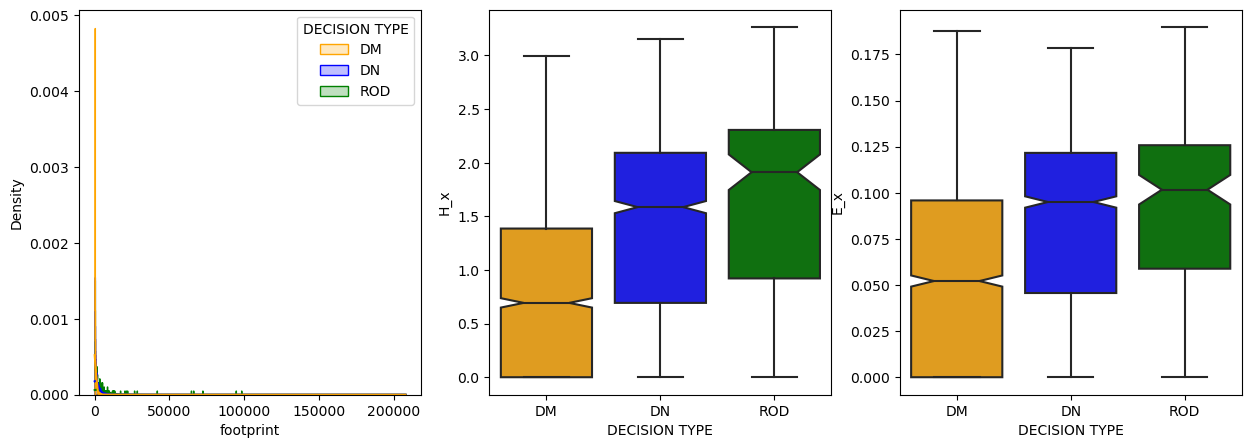

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=False, sharey=False)

# Ax[0] project area (footprint, density plot)
sns.histplot(data=df, x="footprint", hue="DECISION TYPE", 
             stat='density', element='step', ax=ax[0],
             common_norm=False, kde=True,
             hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df, x="DECISION TYPE", y="E_x",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areadens_actrich_E_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E_x'>

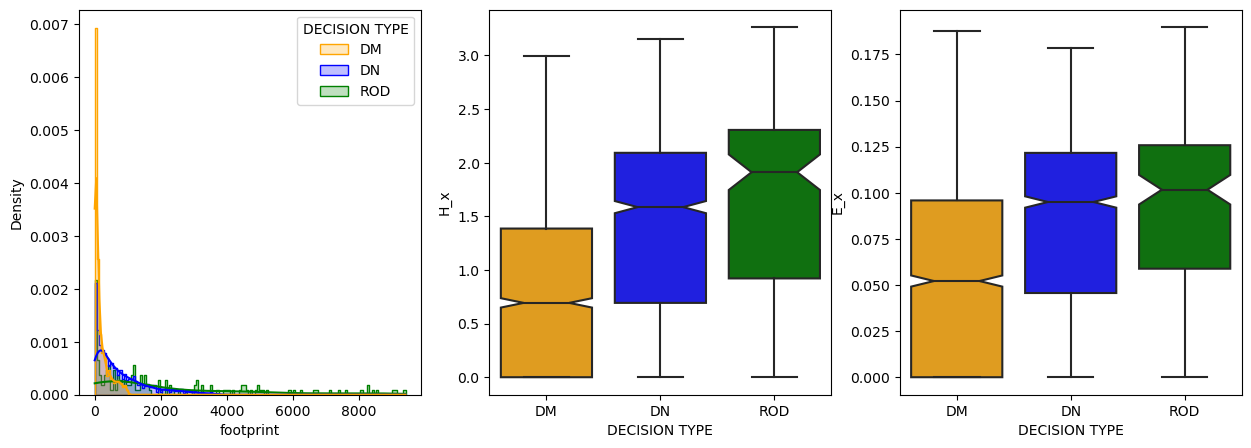

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=False, sharey=False)

# Ax[0] project area (footprint, density plot)
sns.histplot(data=df_totareaha_nofliers_nepa, x="footprint", hue="DECISION TYPE", 
             stat='density', element='step', ax=ax[0],
             common_norm=False, kde=True,
             hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon equitable index (E)
sns.boxplot(data=df, x="DECISION TYPE", y="E_x",
            notch=True, showfliers=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/areadens_nofliersnepadf_actrich_E_2009_2021_allpurp_20230120.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='H_x'>

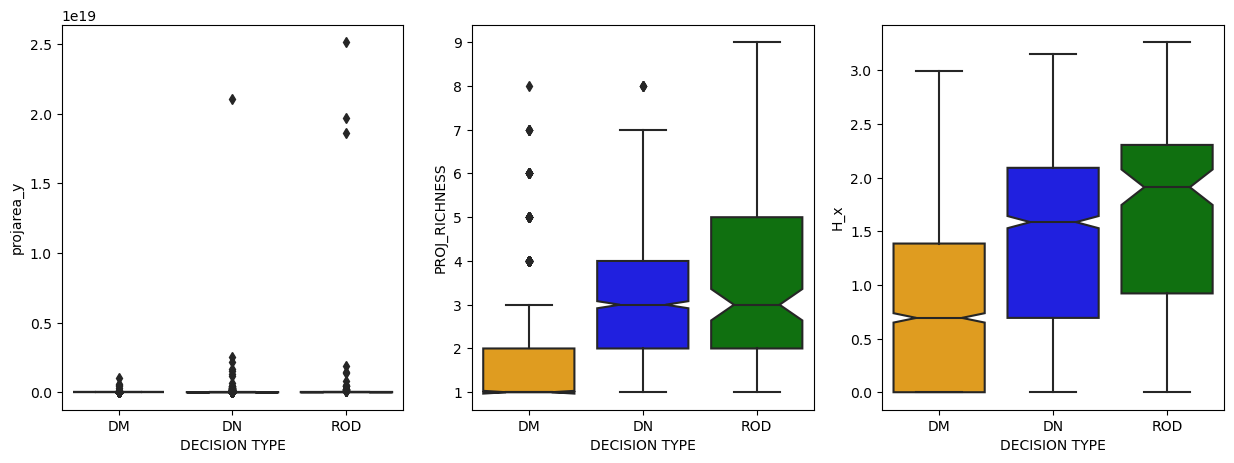

In [136]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (sum of activity areas / project)
sns.boxplot(data=df, x="DECISION TYPE", y="projarea_y",
            notch=True, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon index (H)
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/sumarea_actrich_H_boxplots.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='H_x'>

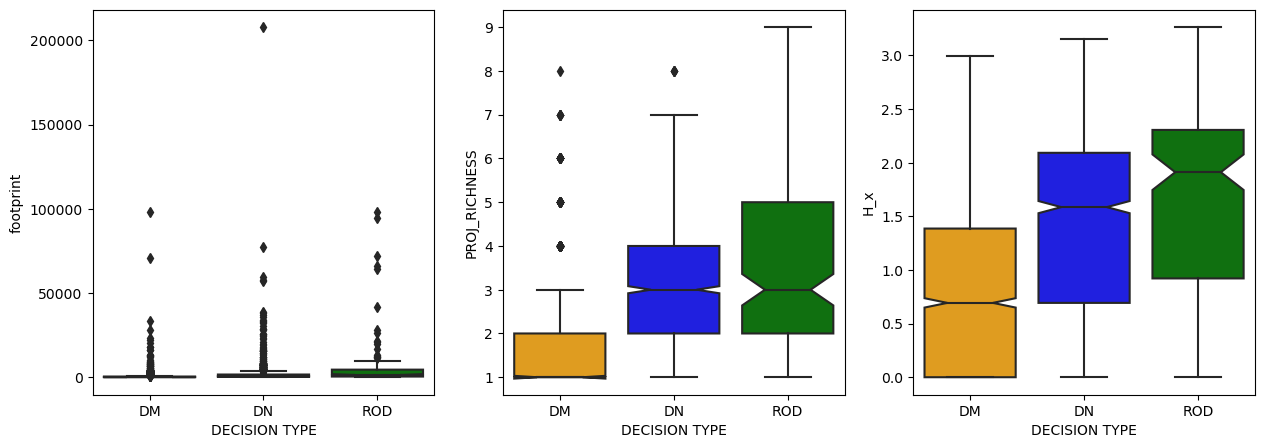

In [139]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=False)

# Ax[0] project area (footprint)
sns.boxplot(data=df, x="DECISION TYPE", y="footprint",
            notch=True, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1] activity type richness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Shannon index (H)
sns.boxplot(data=df, x="DECISION TYPE", y="H_x",
            notch=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/footprint_actrich_H_boxplots.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

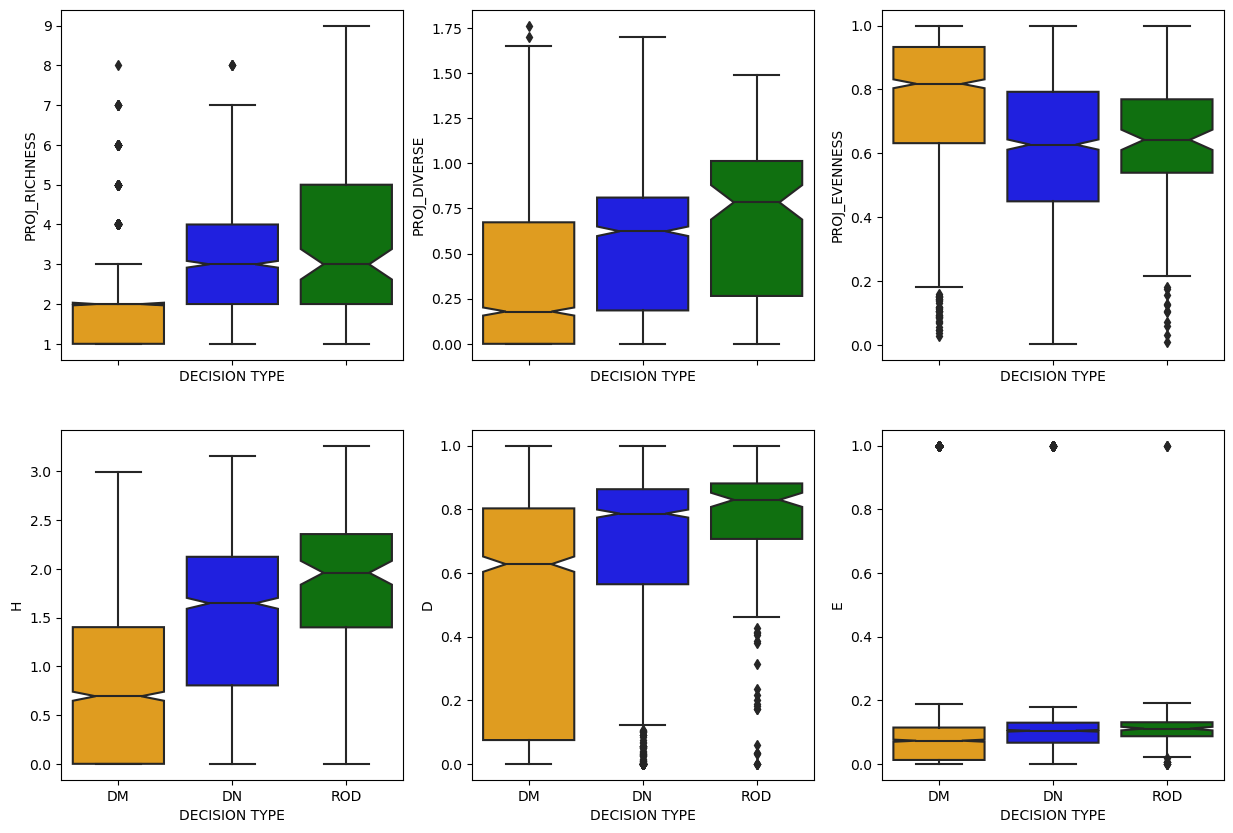

In [373]:
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=False)

# Ax[0,0] Activity richness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True, ax=ax[0,0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1,0]  Area Shannon Information
sns.boxplot(data=df, x="DECISION TYPE", y="H",
            notch=True, ax=ax[1,0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[0,1] Activity Shannon Diversity
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_DIVERSE",
            notch=True, ax=ax[0,1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1,1] Area Simpson Diversity
sns.boxplot(data=df, x="DECISION TYPE", y="D",
            notch=True, ax=ax[1,1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[0,2] Activity Shannon Evenness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_EVENNESS",
            notch=True, ax=ax[0,2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1,2] Area Shannonn Evenness
sns.boxplot(data=df, x="DECISION TYPE", y="E",
            notch=True, ax=ax[1,2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/activity_area_complexity_boxplots.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='E'>

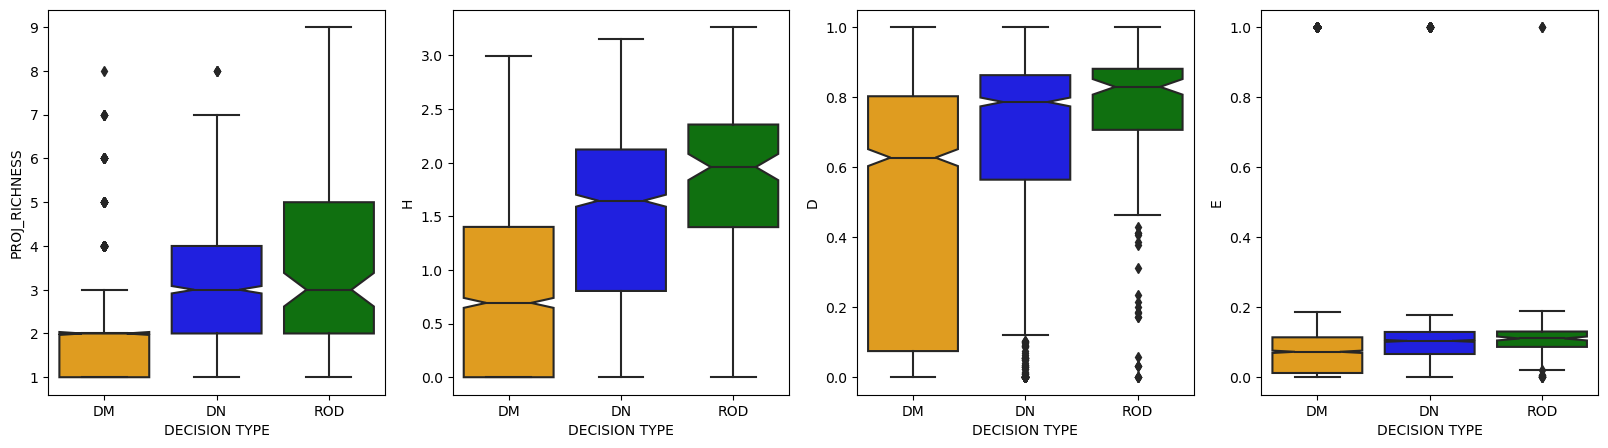

In [374]:
fig, ax = plt.subplots(1,4, figsize=(20,5), sharex=True)

# Ax[0] Activity richness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_RICHNESS",
            notch=True, ax=ax[0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1]  Area Shannon Information
sns.boxplot(data=df, x="DECISION TYPE", y="H",
            notch=True, ax=ax[1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[2] Area Simpson Diversity
sns.boxplot(data=df, x="DECISION TYPE", y="D",
            notch=True, ax=ax[2],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[3] Area Shannonn Evenness
sns.boxplot(data=df, x="DECISION TYPE", y="E",
            notch=True, ax=ax[3],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/area_complexity_act_rich_boxplots.pdf", transparent=True)


<AxesSubplot:xlabel='DECISION TYPE', ylabel='D'>

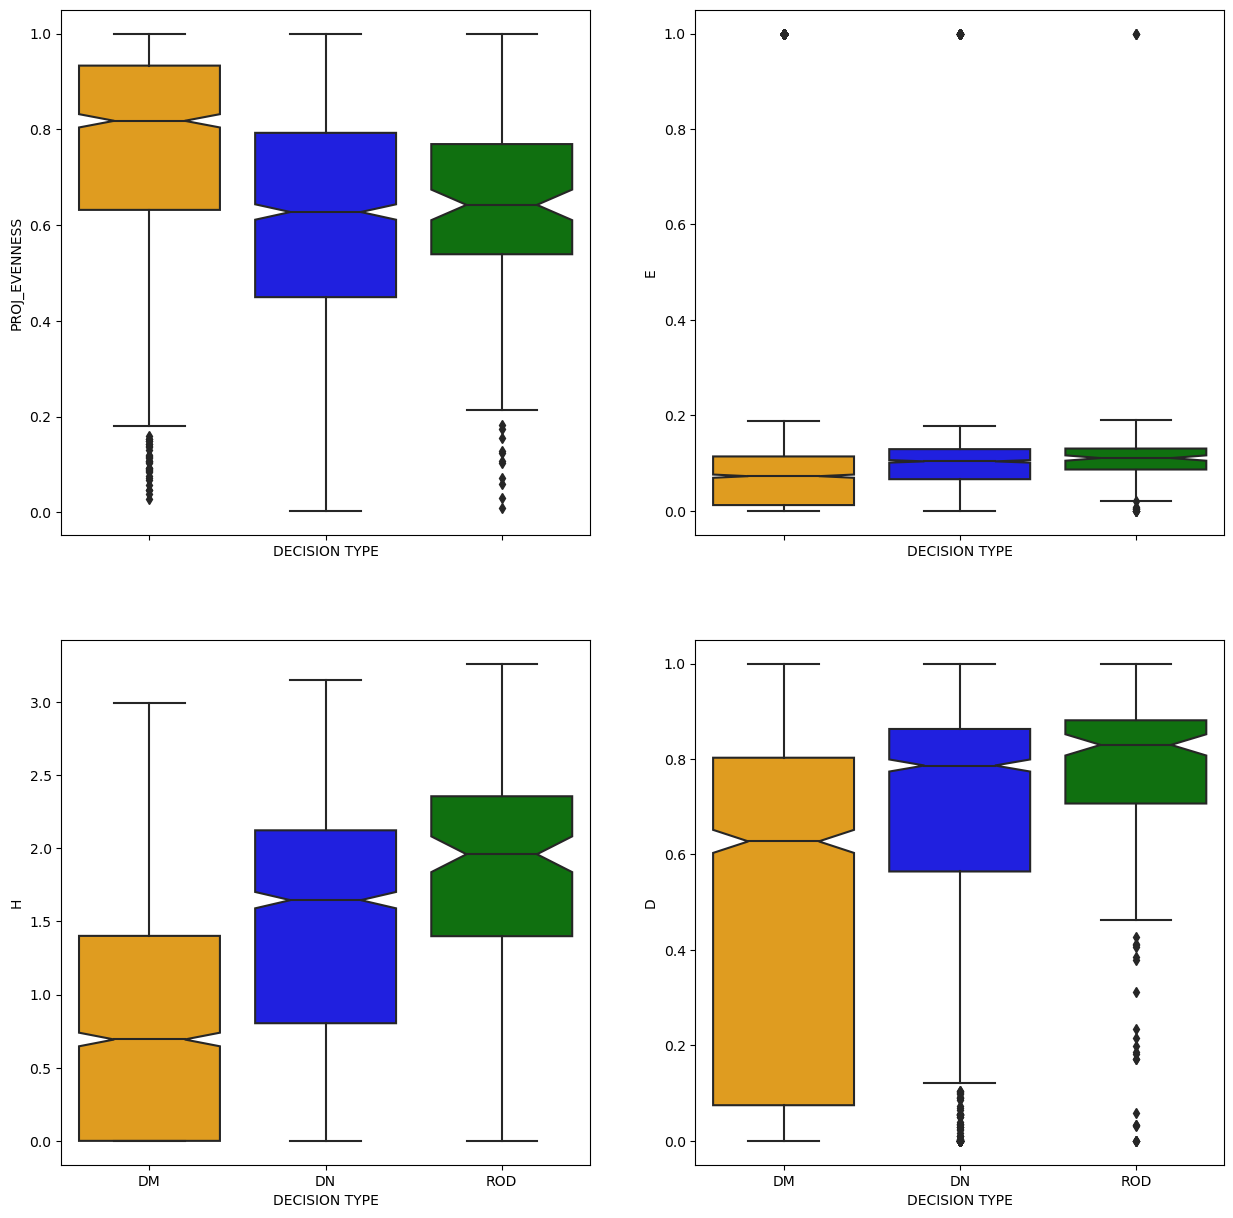

In [375]:
fig, ax = plt.subplots(2,2, figsize=(15,15), sharex=True)

# Ax[0,0] Activity Evenness
sns.boxplot(data=df, x="DECISION TYPE", y="PROJ_EVENNESS",
            notch=True, ax=ax[0,0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[0,1] Area Shannonn Evenness
sns.boxplot(data=df, x="DECISION TYPE", y="E",
            notch=True, ax=ax[0,1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1,0]  Area Shannon Information
sns.boxplot(data=df, x="DECISION TYPE", y="H",
            notch=True, ax=ax[1,0],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

# Ax[1,1] Area Simpson Diversity
sns.boxplot(data=df, x="DECISION TYPE", y="D",
            notch=True, ax=ax[1,1],
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])



# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/area_complexity_act_even_boxplots.pdf", transparent=True)


## Take the top 10th percentile of the project area (footprint) and the assessment time


In [118]:
assesstime2 = df_foot['ASSESSMENT_TIME'].values
assesstime2 = assesstime2[~np.isnan(assesstime2)] 

assess_q90, assess_q10 = np.percentile(assesstime2, [90, 10])
print(assess_q90)


footprint2 = df_foot['footprint'].values
footprint2 = footprint2[~np.isnan(footprint2)] 

foot_q90, foot_q10 = np.percentile(footprint2, [90, 10])
print(foot_q90)

assess_topten = df_foot.loc[df_foot['ASSESSMENT_TIME'] >= assess_q90].copy()
foot_topten = df_foot.loc[df_foot['footprint'] >= foot_q90].copy()


893.0
2591.406031026517


In [119]:
print(len(assess_topten)) 
print(len(foot_topten))

416
415


In [124]:
print("assessment time 10th perc = " + "\n" + str(assess_topten['DECISION TYPE'].value_counts()))

print("project area 10th perc = " + "\n" + str(foot_topten['DECISION TYPE'].value_counts()))

print("df_foot total projects = " + "\n" + str(df_foot['DECISION TYPE'].value_counts()))

assessment time 10th perc = 
DN     274
ROD     93
DM      49
Name: DECISION TYPE, dtype: int64
project area 10th perc = 
DN     242
DM     111
ROD     62
Name: DECISION TYPE, dtype: int64
df_foot total projects = 
DM     2473
DN     1497
ROD     172
Name: DECISION TYPE, dtype: int64


In [122]:
foot_topten[['footprint', 'ASSESSMENT_TIME_MNTH']].describe()

footprint  ASSESSMENT_TIME_MNTH
count     415.000000            415.000000
mean     9613.086368             18.637837
std     16266.210283             17.414852
min      2591.577599              0.427105
25%      3485.509904              6.143737
50%      4553.339458             13.535934
75%      8125.757710             26.184805
max    207835.981752             94.028747

In [123]:
assess_topten[['footprint', 'ASSESSMENT_TIME_MNTH']].describe()

footprint  ASSESSMENT_TIME_MNTH
count    416.000000            416.000000
mean    2424.136117             44.252014
std     6451.628152             15.089037
min        0.002076             29.338809
25%      147.430329             32.870637
50%      637.200559             39.457906
75%     1789.334318             50.521561
max    71994.345239            127.342916

In [140]:
foot_topten.head(2)

FOREST_ID NEPA_DOC_NBR                                       PROJECT NAME  \
10      102.0        34193  Insecticide Application in Recreation Sites Pr...   
13      102.0        46315        Eureka Fire Whitebark Pine Planting Project   

                          LMU (ACTUAL) LMU – REGION LMU – FOREST  \
10  Madison Ranger District (11010206)           R1         BDNF   
13  Madison Ranger District (11010206)           R1         BDNF   

                        LMU – DISTRICT PROJECT STATUS PROJECT CREATED  \
10  Madison Ranger District (11010206)       Complete      11/01/2010   
13  Madison Ranger District (11010206)       Complete      02/23/2015   

    CREATED FY  DECISION ID  \
10      2011.0      31684.0   
13      2015.0      42695.0   

                                        DECISION NAME INITIATION DATE  \
10  Insecticide Applicatoin in Recreation Sites Pr...      2011-04-15   
13                Eureka Fire Whitebark Pine Planting      2015-02-20   

    INITIATION FY DECISION SIGNED  SIGNED FY SIGNER LAST NAME  \
10         2011.0      2011-06-02     2011.0            Myers   
13         2015.0      2015-04-10     2015.0            Olson   

   SIGNER FIRST NAME       SIGNER TITLE DECISION TYPE DECISION APPEAL RULE  \
10              Dave  Forest Supervisor            DM                 None   
13              Dale    District Ranger            DM                 None   

   PROJECT NOTICE AND COMMENT REGULATION  APPEALED OR OBJECTED?  \
10            Not Subject to Regulations                    0.0   
13            Not Subject to Regulations                    0.0   

    NO COMMENTS OR ONLY SUPPORT?  LITIGATED?  \
10                           1.0         0.0   
13                           1.0         0.0   

    FC Facility management – purpose  FR Research – purpose  \
10                               1.0                    0.0   
13                               0.0                    0.0   

    HF Fuels management – purpose  HR Heritage resource management – purpose  \
10                            0.0                                        0.0   
13                            0.0                                        0.0   

    LM Land ownership management – purpose  LW Land acquisition – purpose  \
10                                     0.0                            0.0   
13                                     0.0                            0.0   

    MG Minerals and geology – purpose  PN Land management planning – purpose  \
10                                0.0                                    0.0   
13                                0.0                                    0.0   

    RD Road management – purpose  RG Grazing management – purpose  \
10                           0.0                              0.0   
13                           0.0                              0.0   

    RO Regulations, directives, orders – purpose  \
10                                           0.0   
13                                           0.0   

    RU Special area management – purpose  RW Recreation management – purpose  \
10                                   0.0                                 0.0   
13                                   0.0                                 0.0   

    SU Special use management – purpose  TM Forest products – purpose  \
10                                  0.0                           0.0   
13                                  0.0                           0.0   

    VM Vegetation management (non-forest products) – purpose  \
10                                                0.0          
13                                                1.0          

    WF Wildlife, fish, rare plants – purpose  WM Water management – purpose  \
10                                       0.0                            0.0   
13                                       0.0                            0.0   

    AL Land use adjustments – activity  BL Boundary adjustments – activity  \
10  

In [125]:
foot_topten[foot_topten['NEPA_DOC_NBR'] == '55447']

FOREST_ID NEPA_DOC_NBR         PROJECT NAME  \
1740      510.0        55447  Leary Creek Project   

                                         LMU (ACTUAL) LMU – REGION  \
1740  Six Rivers National Forest All Units (11051000)           R5   

     LMU – FOREST                                   LMU – DISTRICT  \
1740         SRNF  Six Rivers National Forest All Units (11051000)   

     PROJECT STATUS PROJECT CREATED  CREATED FY  DECISION ID  \
1740       Complete      02/20/2019      2019.0      51908.0   

            DECISION NAME INITIATION DATE  INITIATION FY DECISION SIGNED  \
1740  Leary Creek Project      2019-02-15         2019.0      2019-07-02   

      SIGNED FY SIGNER LAST NAME SIGNER FIRST NAME       SIGNER TITLE  \
1740     2019.0         McArthur               Ted  Forest Supervisor   

     DECISION TYPE DECISION APPEAL RULE PROJECT NOTICE AND COMMENT REGULATION  \
1740            DM                  NaN            Not Subject to Regulations   

      APPEALED OR OBJECTED?  NO COMMENTS OR ONLY SUPPORT?  LITIGATED?  \
1740                    0.0                           0.0         0.0   

      FC Facility management – purpose  FR Research – purpose  \
1740                               0.0                    0.0   

      HF Fuels management – purpose  \
1740                            1.0   

      HR Heritage resource management – purpose  \
1740                                        0.0   

      LM Land ownership management – purpose  LW Land acquisition – purpose  \
1740                                     0.0                            0.0   

      MG Minerals and geology – purpose  \
1740                                0.0   

      PN Land management planning – purpose  RD Road management – purpose  \
1740                                    0.0                           0.0   

      RG Grazing management – purpose  \
1740                              0.0   

      RO Regulations, directives, orders – purpose  \
1740                                           0.0   

      RU Special area management – purpose  \
1740                                   0.0   

      RW Recreation management – purpose  SU Special use management – purpose  \
1740                                 0.0                                  0.0   

      TM Forest products – purpose  \
1740                           1.0   

      VM Vegetation management (non-forest products) – purpose  \
1740                                                0.0          

      WF Wildlife, fish, rare plants – purpose  WM Water management – purpose  \
1740                                       0.0                            0.0   

      AL Land use adjustments – activity  BL Boundary adjustments – activity  \
1740                                 0.0                                 0.0   

      BM Biomass – activity  CP Plan creation/revision – activity  \
1740                    0.0                                   0.0   

      DC Directive creation/modification – activity  \
1740                                            0.0   

      DR Road decommissioning – activity  \
1740                                 0.0   

      DS Developed site management – activity  \
1740                                      0.0   

      EC Environmental compliance actions – activity  \
1740                                             0.0   

      ET Electric transmission – activity  FACTS Activity (0,1)  \
1740                                  0.0                   NaN   

      FI Facility improvements/construction – activity  \
1740                                               0.0   

      FN Fuel treatments – activity  \
1740                            1.0   

      FV Forest vegetation improvements – activity  \
1740                                           0.0   

      GA Dispersed recreation management – activity  \
1740                                            0.0   

      GP Grazing allotment management – activity  \
1740                        

In [145]:
foot_topten[foot_topten['DECISION TYPE'] == 'DM'].sort_values(by = 'footprint', ascending=False)

FOREST_ID NEPA_DOC_NBR  \
3509      812.0        29433   
1740      510.0        55447   
1912      513.0        48690   
3077      807.0        29864   
894       303.0        57976   
2217      602.0        51768   
3074      807.0        33411   
3063      807.0        38428   
2479      614.0        40817   
969       306.0        54678   
1201      408.0        49972   
2285      604.0        48291   
1400      419.0        53582   
646       207.0        49547   
1215      410.0        48869   
433       117.0        34936   
1148      403.0        33117   
1206      408.0        27339   
845       301.0        31947   
1140      403.0        43340   
1037      310.0        40681   
946       306.0        29124   
2206      602.0        54912   
1226      410.0        57231   
2182      601.0        43516   
3448      811.0        36170   
1349      417.0        52200   
3377      810.0        28315   
3197      809.0        34971   
1138      403.0        53126   
86        103.0        41353   
381       116.0        47852   
3278      809.0        37424   
3577      813.0        33618   
3230      809.0        37446   
3259      809.0        54359   
74        103.0        41246   
1098      402.0        43370   
988       307.0        41385   
1237      410.0        59047   
554       204.0        29481   
137       104.0        33913   
2268      604.0        29551   
1221      410.0        55892   
916       304.0        34005   
3512      812.0        50334   
1252      412.0        51987   
3286      809.0        35327   
1211      408.0        51778   
955       306.0        52321   
2867      803.0        33865   
486       118.0        42050   
987       307.0        34642   
1038      310.0        37976   
3223      809.0        46408   
3170      809.0        50286   
104       104.0        48804   
1071      401.0        37649   
3254      809.0        45817   
3503      812.0        57068   
2280      604.0        29070   
1719      509.0        31997   
3604      813.0        40089   
2345      606.0        29967   
1923      514.0        27712   
1229      410.0        34264   
959       306.0        28853   
3424      810.0        55253   
3255      809.0        37474   
294       115.0        33802   
93        104.0        39859   
1179      407.0        52595   
1714      509.0        36333   
3606      813.0        48182   
587       204.0        49082   
2451      614.0        34631   
99        104.0        35051   
544       203.0        57507   
915       304.0        38296   
3595      813.0        48209   
3273      809.0        32583   
10        102.0        34193   
2275      604.0        23147   
1113      402.0        35520   
2237      603.0        50458   
3440      811.0        42780   
3848      908.0        48531   
659       207.0        57670   
1350      417.0        49927   
331       115.0        39115   
1261      412.0        48826   
3593      813.0        32693   
2804      801.0        27438   
3633      860.0        31681   
3282      809.0        34993   
4175     1005.0        50639   
653       207.0        43769   
3247      809.0        45592   
1729      509.0        24707   
1579      505.0        30379   
1915      513.0        34101   
13        102.0        46315   
3174      809.0        39877   
3597      813.0        41418   
4163     1005.0        40800   
56        103.0        28111   
3357      809.0        32970   
3270      809.0        54358   
1703      509.0        47396   
15        102.0        32445   
2292      604.0        40557   

                                           PROJECT NAME  \
3509  Feral Pig Eradication Efforts on the Francis M...   
1740                                Leary Creek Project   
1912                        ROUGH FIRE INITIAL PLANTING   
3077                            Prescribed Burning 2010   
894   Black Kettle Ranger District Feral Hog Management   
2217          Yamsi Allotment South Pasture Drift Fence   
3074    

In [126]:
#df_ca.loc[df_ca['NEPA_DOC_NBR'] == '55447']

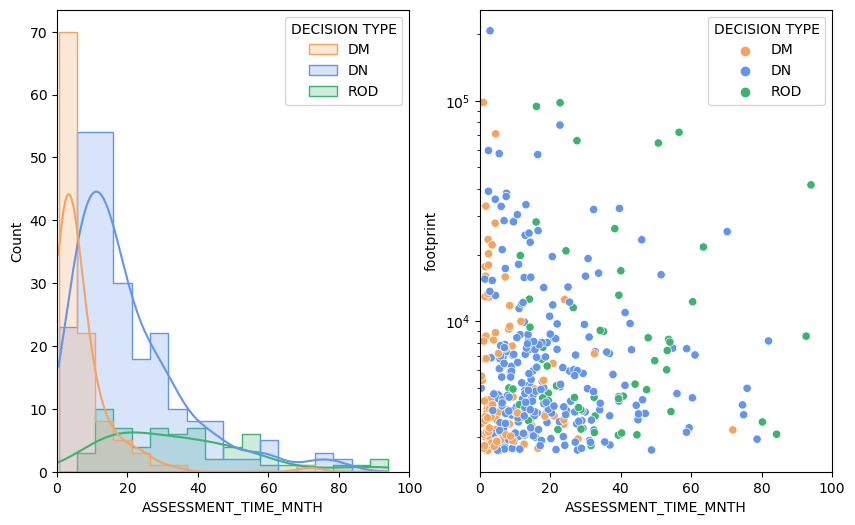

In [234]:
fig, ax = plt.subplots(1,2, figsize=(10,6), sharex=True)

ax0 = sns.histplot(data=foot_topten, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=True, ax=ax[0],
            hue_order=["DM", "DN", "ROD"], palette=["sandybrown", "cornflowerblue", "mediumseagreen"])

ax1 = sns.scatterplot(data=foot_topten, x="ASSESSMENT_TIME_MNTH", y="footprint", hue="DECISION TYPE", 
             ax=ax[1], hue_order=["DM", "DN", "ROD"], palette=["sandybrown", "cornflowerblue", "mediumseagreen"])

ax1.set_yscale('log')
plt.xlim(0,100)

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/foot_topten_hist-scatter_20230128.pdf", transparent=True)


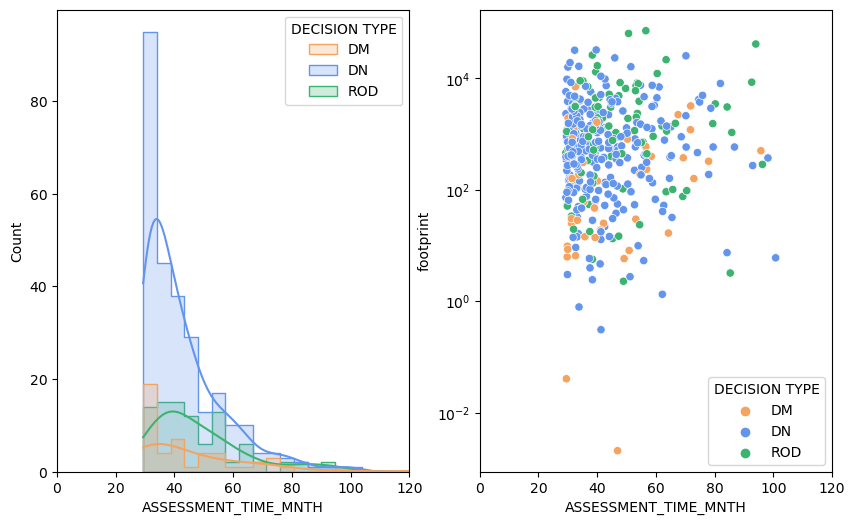

In [235]:
fig, ax = plt.subplots(1,2, figsize=(10,6), sharex=True)

ax0 = sns.histplot(data=assess_topten, x="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE", 
             stat='count', element='step', common_norm=False, kde=True, ax=ax[0],
            hue_order=["DM", "DN", "ROD"], palette=["sandybrown", "cornflowerblue", "mediumseagreen"])

ax1 = sns.scatterplot(data=assess_topten, x="ASSESSMENT_TIME_MNTH", y="footprint", hue="DECISION TYPE", 
             ax=ax[1], hue_order=["DM", "DN", "ROD"], palette=["sandybrown", "cornflowerblue", "mediumseagreen"])

ax1.set_yscale('log')
plt.xlim(0,120)

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/assess_topten_hist-scatter_20230128.pdf", transparent=True)


Text(0.5, 1.08, 'Top 10th Percentile of Project Area')

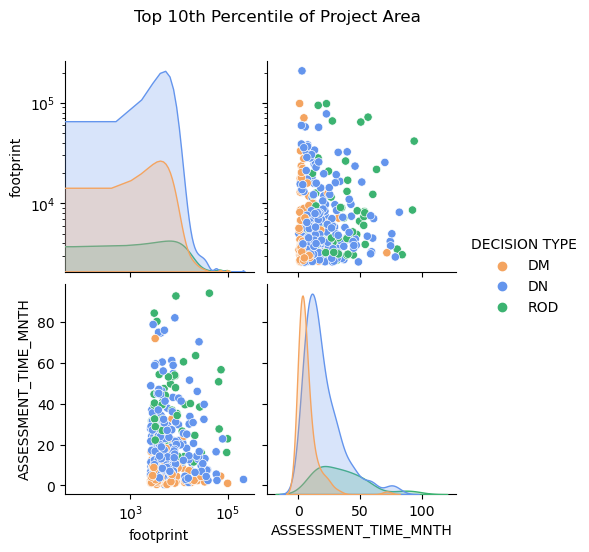

In [210]:
#fig = plt.subplots(figsize=(15,15))

pp = sns.pairplot(
    foot_topten,
    hue = "DECISION TYPE",
    vars=["footprint", "ASSESSMENT_TIME_MNTH"],
    hue_order=["DM", "DN", "ROD"], 
    palette=["sandybrown", "cornflowerblue", "mediumseagreen"],
    corner=False
)

log_columns = ["footprint"]

for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
    if ax.get_ylabel() in log_columns:
        ax.set(yscale="log")
pp.fig.suptitle('Top 10th Percentile of Project Area', y=1.08)

#plt.show()

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/footprint_topten_pairplot_20230128.pdf", transparent=True)


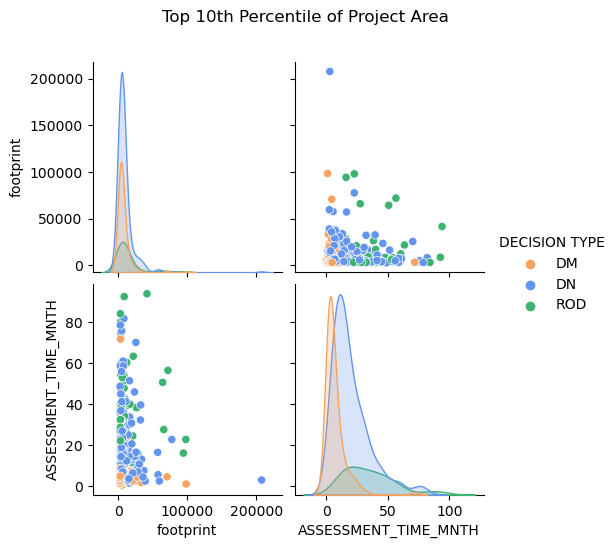

In [157]:
g = sns.pairplot(
    foot_topten,
    hue = "DECISION TYPE",
    vars=["footprint", "ASSESSMENT_TIME_MNTH"],
    hue_order=["DM", "DN", "ROD"], 
    palette=["sandybrown", "cornflowerblue", "mediumseagreen"],
    corner=False
)

g.fig.suptitle('Top 10th Percentile of Project Area', y=1.08)
#plt.title('Also with NaN in first and last point')

plt.show()

Text(0.5, 1.08, 'Top 10th Percentile of Assessment Time')

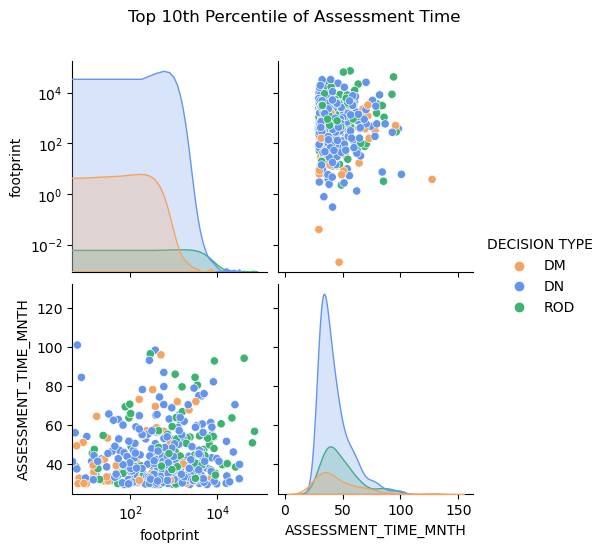

In [204]:
g = sns.pairplot(
    assess_topten,
    hue = "DECISION TYPE",
    vars=["footprint", "ASSESSMENT_TIME_MNTH"],
    hue_order=["DM", "DN", "ROD"], 
    palette=["sandybrown", "cornflowerblue", "mediumseagreen"]
)

log_columns = ["footprint"]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
    if ax.get_ylabel() in log_columns:
        ax.set(yscale="log")

g.fig.suptitle('Top 10th Percentile of Assessment Time', y=1.08)
        
#plt.show()

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/assess_topten_pairplot_20230128.pdf", transparent=True)


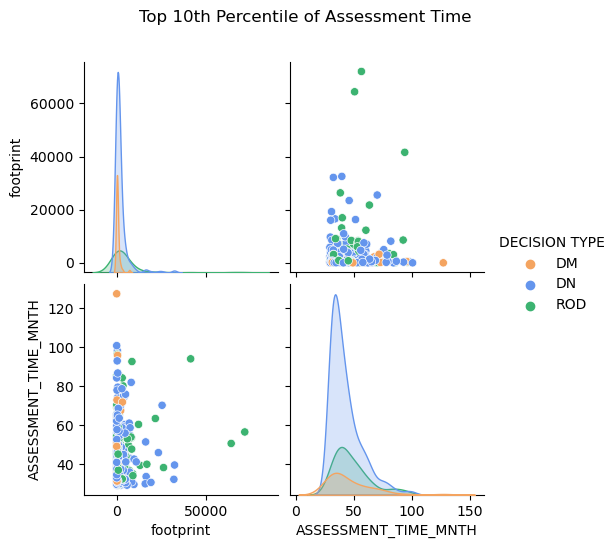

In [161]:
g = sns.pairplot(
    assess_topten,
    hue = "DECISION TYPE",
    vars=["footprint", "ASSESSMENT_TIME_MNTH"],
    hue_order=["DM", "DN", "ROD"], 
    palette=["sandybrown", "cornflowerblue", "mediumseagreen"]
)

g.fig.suptitle('Top 10th Percentile of Assessment Time', y=1.08)

plt.show()

## Survival Curves: Kaplan-Meier

Because we aren't trying to show any causal relationships, the Kaplan-Meier approach is better than a hazards approach (which would should effect size of different variates/covariates). 

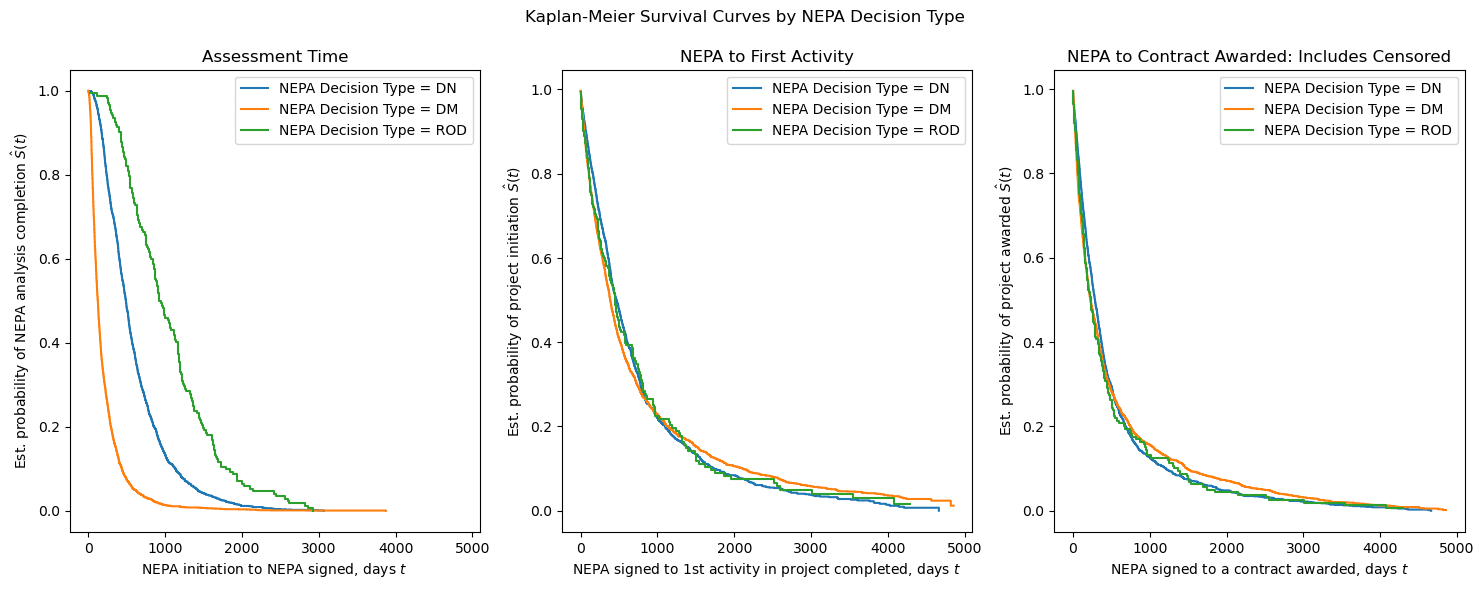

In [140]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['NEPA_COMP2'][mask_decision],
        #df['ELAPSED DAYS'][mask_decision])
        df['ASSESSMENT_TIME'][mask_decision])

    ax[0].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[0].set_ylabel('Est. probability of NEPA analysis completion $\hat{S}(t)$')
ax[0].set_xlabel('NEPA initiation to NEPA signed, days $t$')
ax[0].legend(loc='best')
ax[0].set_title('Assessment Time')
#ax[0].title('Includes Censored Projects')

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['PROJ_INIT'][mask_decision],
        #df['ELAPSED DAYS'][mask_decision])
        df['NEPA_TO_FIRST_ACT_MAX'][mask_decision])

    ax[1].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[1].set_ylabel('Est. probability of project initiation $\hat{S}(t)$')
ax[1].set_xlabel('NEPA signed to 1st activity in project completed, days $t$')
ax[1].legend(loc='best')
ax[1].set_title('NEPA to First Activity')
#ax[1].title('Includes Censored Projects')

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_proj, survival_prob_decision_proj = kaplan_meier_estimator(
        df['PROJ_AWARDED'][mask_decision],
        #df['NEPA_TO_LAST_ACT'][mask_decision])
        df['NEPA_TO_CONTRACT_MAX'][mask_decision])

    ax[2].step(time_decision_proj, survival_prob_decision_proj, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[2].set_ylabel('Est. probability of project awarded $\hat{S}(t)$')
ax[2].set_xlabel('NEPA signed to a contract awarded, days $t$')
ax[2].legend(loc='best')
#ax[2].suptitle('Kaplan-Meier Survival Curves by NEPA Decision Type')
ax[2].set_title('NEPA to Contract Awarded: Includes Censored')

plt.suptitle('Kaplan-Meier Survival Curves by NEPA Decision Type')

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/KM_curves.pdf", transparent=True)

plt.show()

In [141]:
len(df)

4142

In [142]:
#df['NEPA_T'[df['NEPA_TO_FIRST_ACT_MAX'] < 0]

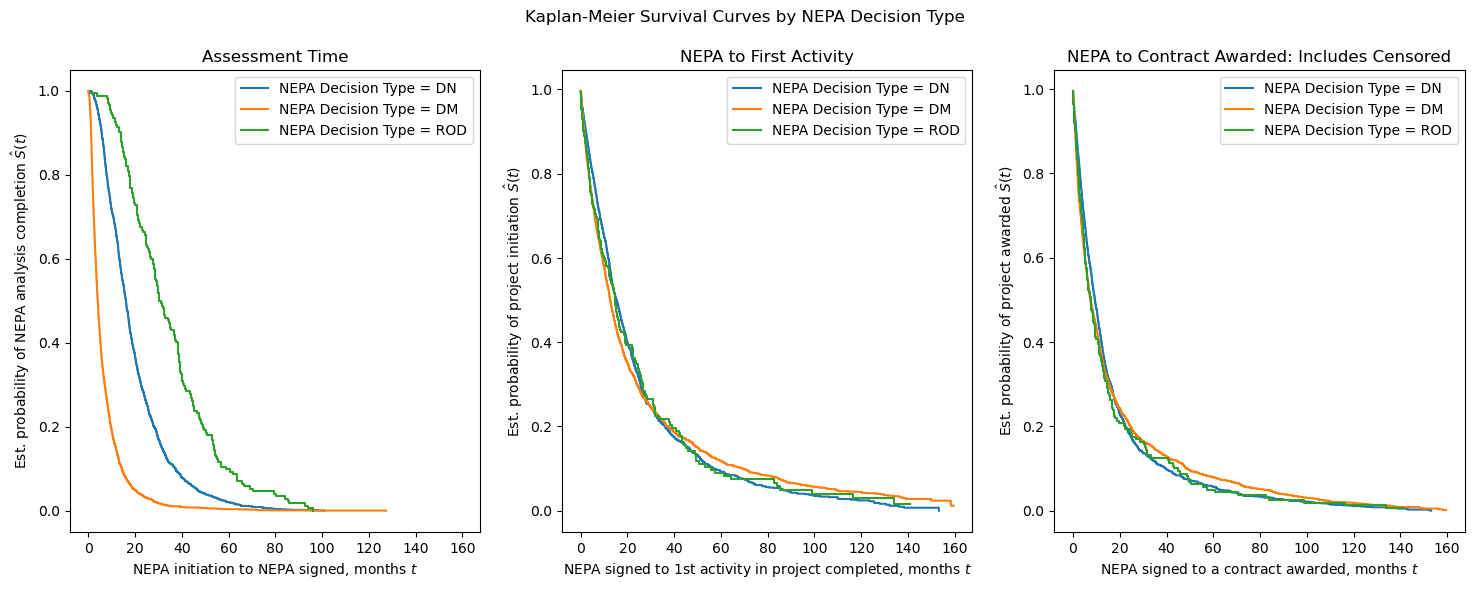

In [143]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['NEPA_COMP2'][mask_decision],
        #df['ELAPSED DAYS'][mask_decision])
        df['ASSESSMENT_TIME_MNTH'][mask_decision])

    ax[0].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[0].set_ylabel('Est. probability of NEPA analysis completion $\hat{S}(t)$')
ax[0].set_xlabel('NEPA initiation to NEPA signed, months $t$')
ax[0].legend(loc='best')
ax[0].set_title('Assessment Time')
#ax[0].title('Includes Censored Projects')

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['PROJ_INIT'][mask_decision],
        #df['ELAPSED DAYS'][mask_decision])
        df['NEPA_TO_FIRST_ACT_MAX_MNTH'][mask_decision])

    ax[1].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[1].set_ylabel('Est. probability of project initiation $\hat{S}(t)$')
ax[1].set_xlabel('NEPA signed to 1st activity in project completed, months $t$')
ax[1].legend(loc='best')
ax[1].set_title('NEPA to First Activity')
#ax[1].title('Includes Censored Projects')

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_proj, survival_prob_decision_proj = kaplan_meier_estimator(
        df['PROJ_AWARDED'][mask_decision],
        #df['NEPA_TO_LAST_ACT'][mask_decision])
        df['NEPA_TO_CONTRACT_MAX_MNTH'][mask_decision])

    ax[2].step(time_decision_proj, survival_prob_decision_proj, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[2].set_ylabel('Est. probability of project awarded $\hat{S}(t)$')
ax[2].set_xlabel('NEPA signed to a contract awarded, months $t$')
ax[2].legend(loc='best')
#ax[2].suptitle('Kaplan-Meier Survival Curves by NEPA Decision Type')
ax[2].set_title('NEPA to Contract Awarded: Includes Censored')

plt.suptitle('Kaplan-Meier Survival Curves by NEPA Decision Type')

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/KM_curves.pdf", transparent=True)

plt.show()

In [144]:
time_df_assess, survival_df_assess = kaplan_meier_estimator(
        df['NEPA_COMP2'],
        df['ASSESSMENT_TIME_MNTH'])

#time_df_imp, survival_df_imp = kaplan_meier_estimator(
#        df['PROJ_COMP'],
#        df['IMPLEMENTATION_TIME_MNTH'])

time_df_fa, survival_df_fa = kaplan_meier_estimator(
        df['PROJ_INIT'],
        df['NEPA_TO_FIRST_ACT_MAX_MNTH'])

time_df_ctrt, survival_df_ctrt = kaplan_meier_estimator(
        df['PROJ_AWARDED'],
        df['NEPA_TO_CONTRACT_MAX_MNTH'])

In [145]:
time_dm_assess, survival_dm_assess = kaplan_meier_estimator(
        df_dm['NEPA_COMP2'],
        df_dm['ASSESSMENT_TIME_MNTH'])

time_dn_assess, survival_dn_assess = kaplan_meier_estimator(
        df_dn['NEPA_COMP2'],
        df_dn['ASSESSMENT_TIME_MNTH'])

time_rod_assess, survival_rod_assess = kaplan_meier_estimator(
        df_rod['NEPA_COMP2'],
        df_rod['ASSESSMENT_TIME_MNTH'])

In [146]:
'''time_dm_imp, survival_dm_imp = kaplan_meier_estimator(
        df_dm['PROJ_COMP'],
        df_dm['IMPLEMENTATION_TIME_MNTH'])

time_dn_imp, survival_dn_imp = kaplan_meier_estimator(
        df_dn['PROJ_COMP'],
        df_dn['IMPLEMENTATION_TIME_MNTH'])

time_rod_imp, survival_rod_imp = kaplan_meier_estimator(
        df_rod['PROJ_COMP'],
        df_rod['IMPLEMENTATION_TIME_MNTH'])'''

"time_dm_imp, survival_dm_imp = kaplan_meier_estimator(\n        df_dm['PROJ_COMP'],\n        df_dm['IMPLEMENTATION_TIME_MNTH'])\n\ntime_dn_imp, survival_dn_imp = kaplan_meier_estimator(\n        df_dn['PROJ_COMP'],\n        df_dn['IMPLEMENTATION_TIME_MNTH'])\n\ntime_rod_imp, survival_rod_imp = kaplan_meier_estimator(\n        df_rod['PROJ_COMP'],\n        df_rod['IMPLEMENTATION_TIME_MNTH'])"

In [147]:
time_dm_fa, survival_dm_fa = kaplan_meier_estimator(
        df_dm['PROJ_INIT'],
        df_dm['NEPA_TO_FIRST_ACT_MAX_MNTH'])

time_dn_fa, survival_dn_fa = kaplan_meier_estimator(
        df_dn['PROJ_INIT'],
        df_dn['NEPA_TO_FIRST_ACT_MAX_MNTH'])

time_rod_fa, survival_rod_fa = kaplan_meier_estimator(
        df_rod['PROJ_INIT'],
        df_rod['NEPA_TO_FIRST_ACT_MAX_MNTH'])

In [148]:
time_dm_ctrt, survival_dm_ctrt = kaplan_meier_estimator(
        df_dm['PROJ_AWARDED'],
        df_dm['NEPA_TO_CONTRACT_MAX_MNTH'])

time_dn_ctrt, survival_dn_ctrt = kaplan_meier_estimator(
        df_dn['PROJ_AWARDED'],
        df_dn['NEPA_TO_CONTRACT_MAX_MNTH'])

time_rod_ctrt, survival_rod_ctrt = kaplan_meier_estimator(
        df_rod['PROJ_AWARDED'],
        df_rod['NEPA_TO_CONTRACT_MAX_MNTH'])

In [149]:
dm_assess_surv = pd.DataFrame({'dm_time': time_dm_assess, 
                            'dm_assess_prob': survival_dm_assess}, columns=['dm_time', 'dm_assess_prob'])
dn_assess_surv = pd.DataFrame({'dn_time': time_dn_assess, 
                            'dn_assess_prob': survival_dn_assess}, columns=['dn_time', 'dn_assess_prob'])
rod_assess_surv = pd.DataFrame({'rod_time': time_rod_assess, 
                            'rod_assess_prob': survival_rod_assess}, columns=['rod_time', 'rod_assess_prob'])


In [150]:
'''dm_imp_surv = pd.DataFrame({'dm_time': time_dm_imp, 
                            'dm_assess_prob': survival_dm_imp}, columns=['dm_time', 'dm_assess_prob'])
dn_imp_surv = pd.DataFrame({'dn_time': time_dn_imp, 
                            'dn_assess_prob': survival_dn_imp}, columns=['dn_time', 'dn_assess_prob'])
rod_imp_surv = pd.DataFrame({'rod_time': time_rod_imp, 
                            'rod_assess_prob': survival_rod_imp}, columns=['rod_time', 'rod_assess_prob'])'''

"dm_imp_surv = pd.DataFrame({'dm_time': time_dm_imp, \n                            'dm_assess_prob': survival_dm_imp}, columns=['dm_time', 'dm_assess_prob'])\ndn_imp_surv = pd.DataFrame({'dn_time': time_dn_imp, \n                            'dn_assess_prob': survival_dn_imp}, columns=['dn_time', 'dn_assess_prob'])\nrod_imp_surv = pd.DataFrame({'rod_time': time_rod_imp, \n                            'rod_assess_prob': survival_rod_imp}, columns=['rod_time', 'rod_assess_prob'])"

In [151]:
dm_fa_surv = pd.DataFrame({'dm_time': time_dm_fa, 
                            'dm_assess_prob': survival_dm_fa}, columns=['dm_time', 'dm_assess_prob'])
dn_fa_surv = pd.DataFrame({'dn_time': time_dn_fa, 
                            'dn_assess_prob': survival_dn_fa}, columns=['dn_time', 'dn_assess_prob'])
rod_fa_surv = pd.DataFrame({'rod_time': time_rod_fa, 
                            'rod_assess_prob': survival_rod_fa}, columns=['rod_time', 'rod_assess_prob'])

In [152]:
dm_ctrt_surv = pd.DataFrame({'dm_time': time_dm_ctrt, 
                            'dm_assess_prob': survival_dm_ctrt}, columns=['dm_time', 'dm_assess_prob'])
dn_ctrt_surv = pd.DataFrame({'dn_time': time_dn_ctrt, 
                            'dn_assess_prob': survival_dn_ctrt}, columns=['dn_time', 'dn_assess_prob'])
rod_ctrt_surv = pd.DataFrame({'rod_time': time_rod_ctrt, 
                            'rod_assess_prob': survival_rod_ctrt}, columns=['rod_time', 'rod_assess_prob'])

In [161]:
rod_assess_surv

rod_time  rod_assess_prob
0     0.788501         0.994186
1     3.876797         0.988372
2     8.082136         0.982558
3     8.279261         0.976744
4     8.574949         0.970930
5     8.706366         0.965116
6     9.166324         0.959302
7     9.429158         0.953488
8     9.527721         0.947674
9    10.184805         0.941860
10   10.579055         0.936047
11   11.268994         0.930233
12   11.498973         0.924419
13   11.958932         0.918605
14   12.090349         0.912791
15   13.010267         0.906977
16   13.273101         0.901163
17   13.831622         0.895349
18   13.864476         0.883721
19   14.094456         0.877907
20   14.258727         0.872093
21   14.455852         0.866279
22   14.751540         0.860465
23   15.014374         0.854651
24   15.080082         0.848837
25   15.277207         0.843023
26   15.704312         0.837209
27   16.000000         0.831395
28   16.098563         0.825581
29   16.295688         0.819767
30   16.821355         0.813953
31   17.149897         0.808140
32   17.379877         0.802326
33   17.609856         0.796512
34   17.642710         0.790698
35   17.741273         0.784884
36   17.872690         0.779070
37   17.905544         0.773256
38   17.938398         0.767442
39   18.529774         0.761628
40   18.759754         0.755814
41   19.154004         0.750000
42   19.186858         0.744186
43   19.449692         0.738372
44   19.482546         0.732558
45   20.106776         0.726744
46   20.928131         0.720930
47   20.993840         0.709302
48   21.026694         0.703488
49   21.125257         0.691860
50   21.782341         0.686047
51   22.176591         0.680233
52   22.242300         0.674419
53   22.800821         0.668605
54   23.227926         0.662791
55   24.049281         0.656977
56   24.476386         0.651163
57   24.706366         0.645349
58   24.837782         0.639535
59   24.870637         0.633721
60   25.034908         0.627907
61   25.659138         0.622093
62   26.151951         0.616279
63   26.546201         0.604651
64   26.874743         0.598837
65   27.466119         0.593023
66   27.597536         0.587209
67   28.024641         0.581395
68   28.057495         0.575581
69   28.451745         0.569767
70   28.517454         0.563953
71   28.550308         0.558140
72   28.681725         0.552326
73   28.747433         0.546512
74   29.207392         0.540698
75   29.338809         0.534884
76   29.634497         0.529070
77   29.831622         0.523256
78   29.864476         0.517442
79   30.028747         0.511628
80   30.094456         0.505814
81   30.357290         0.500000
82   31.244353         0.494186
83   31.572895         0.488372
84   31.967146         0.482558
85   32.262834         0.476744
86   32.459959         0.470930
87   32.525667         0.465116
88   32.755647         0.459302
89   34.201232         0.453488
90   34.529774         0.447674
91   35.055441         0.441860
92   35.154004         0.436047
93   35.383984         0.430233
94   36.763860         0.424419
95   36.796715         0.418605
96   37.026694         0.412791
97   37.223819         0.406977
98   37.486653         0.401163
99   38.340862         0.389535
100  38.373717         0.383721
101  38.472279         0.377907
102  38.505133         0.372093
103  38.767967         0.366279
104  38.833676         0.360465
105  38.866530         0.354651
106  39.227926         0.348837
107  39.326489         0.343023
108  39.359343         0.337209
109  39.425051         0.331395
110  39.490760         0.325581
111  40.049281         0.319767
112  40.246407         0.313953
113  40.279261         0.308140
114  40.706366         0.302326
115  40.739220         0.296512
116  41.527721         0.290698
117  41.823409         0.284884
118  43.696099         0.279070
119  43.958932         0.273256
120  44.090349         0.267442
121  44.320329         0.261628
122  44.616016         0.255814
123  44.714579         0.250000
124  4

In [343]:
dm_fy = pd.DataFrame(df_dm.groupby('INITIATION FY')['NEPA_DOC_NBR'].count().reset_index())
dn_fy = pd.DataFrame(df_dn.groupby('INITIATION FY')['NEPA_DOC_NBR'].count().reset_index())
rod_fy = pd.DataFrame(df_rod.groupby('INITIATION FY')['NEPA_DOC_NBR'].count().reset_index())

dm_yr = pd.DataFrame(df_dm.groupby('INITIATION_YR')['NEPA_DOC_NBR'].count().reset_index())
dn_yr = pd.DataFrame(df_dn.groupby('INITIATION_YR')['NEPA_DOC_NBR'].count().reset_index())
rod_yr = pd.DataFrame(df_rod.groupby('INITIATION_YR')['NEPA_DOC_NBR'].count().reset_index())

dm_means = pd.DataFrame(df_dm.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME', 'IMPLEMENTATION_TIME', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())
dn_means = pd.DataFrame(df_dn.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME', 'IMPLEMENTATION_TIME', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())
rod_means = pd.DataFrame(df_rod.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME', 'IMPLEMENTATION_TIME', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())

dm_means_mnth = pd.DataFrame(df_dm.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME_MNTH', 'IMPLEMENTATION_TIME_MNTH', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())
dn_means_mnth = pd.DataFrame(df_dn.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME_MNTH', 'IMPLEMENTATION_TIME_MNTH', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())
rod_means_mnth = pd.DataFrame(df_rod.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
                                                       'ASSESSMENT_TIME_MNTH', 'IMPLEMENTATION_TIME_MNTH', 'NEPA_TO_FIRST_ACT_MNTH', 
                                                       'NEPA_TO_CONTRACT_MNTH','PROJECT_DUR_PLAN_YR'].mean().reset_index())



/var/folders/rr/nq1j46pd355fn_0gk__qf1s40000gn/T/ipykernel_36907/525903766.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dm_means = pd.DataFrame(df_dm.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
/var/folders/rr/nq1j46pd355fn_0gk__qf1s40000gn/T/ipykernel_36907/525903766.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dn_means = pd.DataFrame(df_dn.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
/var/folders/rr/nq1j46pd355fn_0gk__qf1s40000gn/T/ipykernel_36907/525903766.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rod_means = pd.DataFrame(df_rod.groupby('INITIATION_YR')['PROJ_RICHNESS', 'PROJ_DIVERSE', 'PROJ_EVENNESS',
/var/folders/rr/nq1j46pd355fn_0gk__qf1s40000gn/T/ipykerne

In [344]:
rod_means_mnth

INITIATION_YR  PROJ_RICHNESS  PROJ_DIVERSE  PROJ_EVENNESS  \
0            2009       3.205882      0.636581       0.639022   
1            2010       3.413793      0.586701       0.527624   
2            2011       3.545455      0.643166       0.589813   
3            2012       2.473684      0.536484       0.723305   
4            2013       4.312500      0.899046       0.677204   
5            2014       3.631579      0.720183       0.674076   
6            2015       2.727273      0.518677       0.643236   
7            2016       3.400000      0.762984       0.691447   
8            2017       3.000000      0.849153       0.875232   
9            2018       1.750000      0.259789       0.749593   
10           2019       1.000000      0.000000            NaN   

    ASSESSMENT_TIME_MNTH  IMPLEMENTATION_TIME_MNTH  NEPA_TO_FIRST_ACT_MNTH  \
0              31.752627                 93.871240               17.120030   
1              38.417900                 86.237768               18.643590   
2              33.844316                 83.899197               17.814448   
3              32.427105                 63.450124               16.100495   
4              38.490760                 61.268994               12.156057   
5              40.040635                 45.845456               11.895049   
6              34.789621                 38.747060               13.667351   
7              29.588501                 36.126489                3.782928   
8              29.550015                 24.528014               11.154004   
9              24.919918                 24.501027                0.032854   
10             21.782341                  0.985626                0.262834   

    NEPA_TO_CONTRACT_MNTH  PROJECT_DUR_PLAN_YR  
0               11.954950            12.676471  
1               12.834667            12.413793  
2               12.372597            13.045455  
3               13.110559            10.684211  
4                6.691992            13.187500  
5                6.625599            14.263158  
6                9.220086             6.363636  
7                4.803285            12.000000  
8                4.473648            10.857143  
9                4.851472             6.000000  
10               0.262834             0.000000

In [345]:
dm_color_map = ["darkgoldenrod", "gold"]
dn_color_map = ["royalblue", "lightsteelblue"]
rod_color_map = ["seagreen", "honeydew"]

In [346]:
med_assess_time = [df_dm['ASSESSMENT_TIME_MNTH'].median(),
                     df_dn['ASSESSMENT_TIME_MNTH'].median(),
                     df_rod['ASSESSMENT_TIME_MNTH'].median()]
med_fa_time = [df_dm['NEPA_TO_FIRST_ACT_MNTH'].median(),
                     df_dn['NEPA_TO_FIRST_ACT_MNTH'].median(),
                     df_rod['NEPA_TO_FIRST_ACT_MNTH'].median()]
med_ctc_time = [df_dm['NEPA_TO_CONTRACT_MNTH'].median(),
                     df_dn['NEPA_TO_CONTRACT_MNTH'].median(),
                     df_rod['NEPA_TO_CONTRACT_MNTH'].median()]
med_plan_dur = [df_dm['PROJECT_DUR_PLAN_MNTH'].median(),
                  df_dn['PROJECT_DUR_PLAN_MNTH'].median(),
                  df_rod['PROJECT_DUR_PLAN_MNTH'].median()]
med_tot_proj = [df_dm['TOTAL_PROJ_MNTH'].median(),
                  df_dn['TOTAL_PROJ_MNTH'].median(),
                  df_rod['TOTAL_PROJ_MNTH'].median()]


In [347]:
print(med_assess_time)
print(med_fa_time)
print(med_ctc_time)
print(med_plan_dur)
print(med_tot_proj)

[4.041067761806982, 16.06570841889117, 30.800821355236142]
[11.006160164271048, 13.305954825462013, 10.57905544147844]
[6.767967145790554, 8.706365503080082, 5.9137577002053385]
[36.0, 108.0, 120.0]
[60.0, 132.0, 150.0]


## Need to get the KM median probability as well. 

In [348]:
nepa_types = ('CE', 'EA', 'EIS')
y_pos = np.arange(len(nepa_types))

mean_assess_time = [df_dm['ASSESSMENT_TIME_MNTH'].mean(),
                     df_dn['ASSESSMENT_TIME_MNTH'].mean(),
                     df_rod['ASSESSMENT_TIME_MNTH'].mean()]
mean_plan_dur = [df_dm['PROJECT_DUR_PLAN_MNTH'].mean(),
                  df_dn['PROJECT_DUR_PLAN_MNTH'].mean(),
                  df_rod['PROJECT_DUR_PLAN_MNTH'].mean()]
mean_fa_time = [df_dm['NEPA_TO_FIRST_ACT_MNTH'].mean(),
                  df_dn['NEPA_TO_FIRST_ACT_MNTH'].mean(),
                  df_rod['NEPA_TO_FIRST_ACT_MNTH'].mean()]
mean_ctc_time = [df_dm['NEPA_TO_CONTRACT_MNTH'].mean(),
                  df_dn['NEPA_TO_CONTRACT_MNTH'].mean(),
                  df_rod['NEPA_TO_CONTRACT_MNTH'].mean()]

error_assess = [df_dm['ASSESSMENT_TIME_MNTH'].std(),
                 df_dn['ASSESSMENT_TIME_MNTH'].std(),
                 df_rod['ASSESSMENT_TIME_MNTH'].std()]
error_plan_dur = [df_dm['PROJECT_DUR_PLAN_MNTH'].std(),
                   df_dn['PROJECT_DUR_PLAN_MNTH'].std(),
                   df_rod['PROJECT_DUR_PLAN_MNTH'].std()]
error_fa = [df_dm['NEPA_TO_FIRST_ACT_MNTH'].std(),
                 df_dn['NEPA_TO_FIRST_ACT_MNTH'].std(),
                 df_rod['NEPA_TO_FIRST_ACT_MNTH'].std()]
error_ctc = [df_dm['NEPA_TO_CONTRACT_MNTH'].std(),
                 df_dn['NEPA_TO_CONTRACT_MNTH'].std(),
                 df_rod['NEPA_TO_CONTRACT_MNTH'].std()]

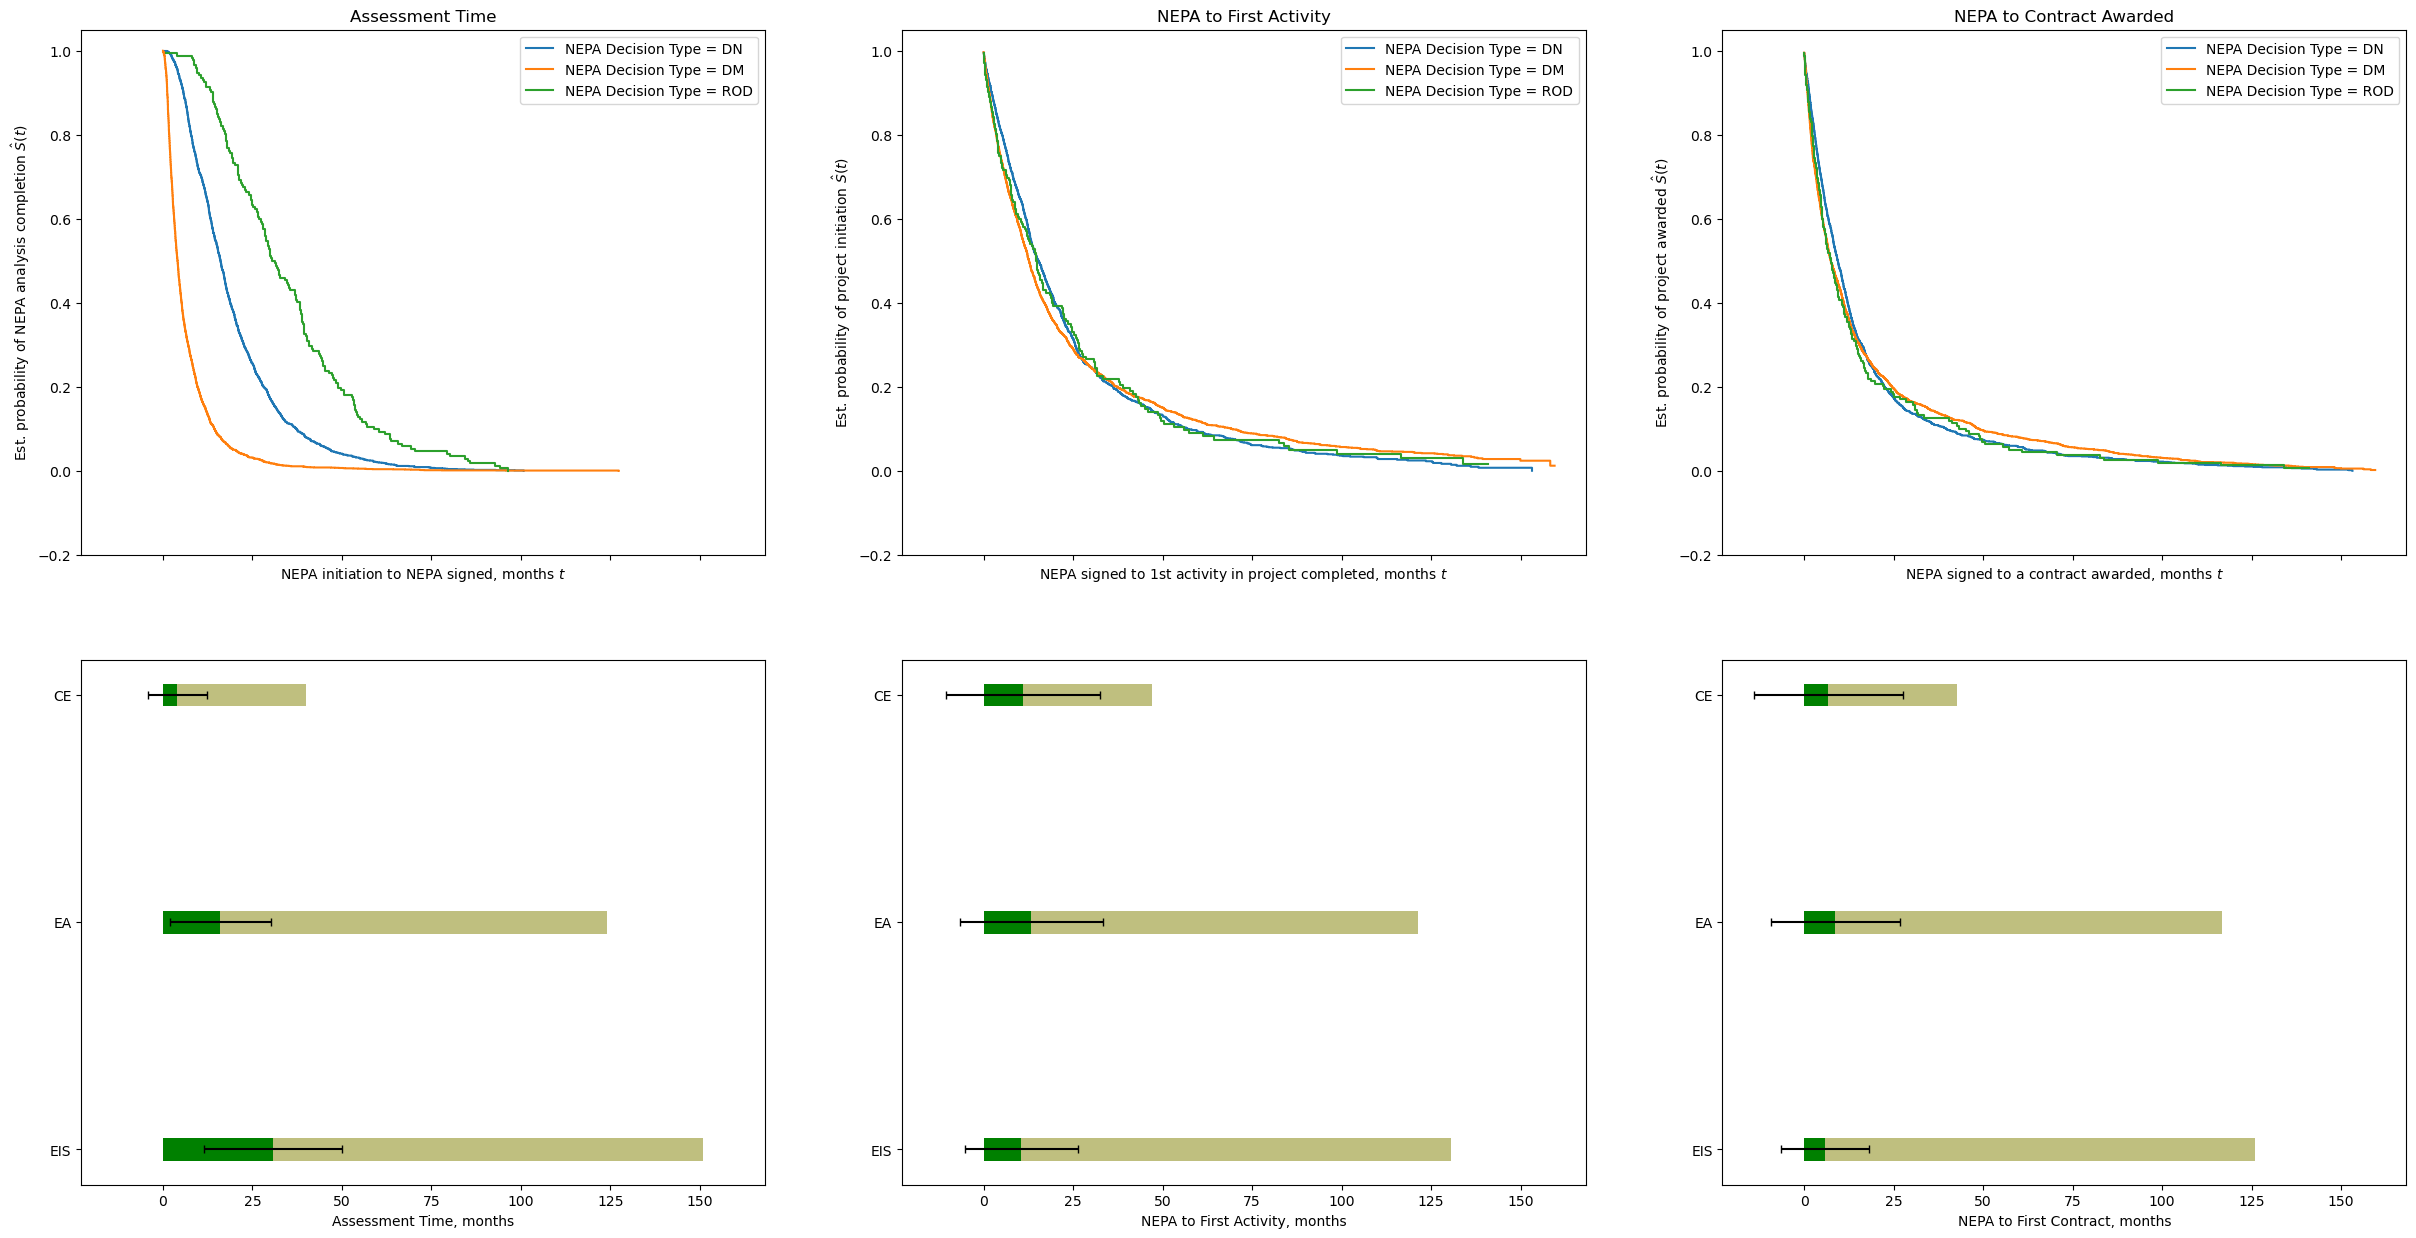

In [349]:
fig, ax = plt.subplots(2, 3, figsize=(30,15), sharex=True)

# Assessment time
for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['NEPA_COMP2'][mask_decision],
        df['ASSESSMENT_TIME_MNTH'][mask_decision])

    ax[0,0].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[0,0].set_ylabel('Est. probability of NEPA analysis completion $\hat{S}(t)$')
ax[0,0].set_xlabel('NEPA initiation to NEPA signed, months $t$')
ax[0,0].legend(loc='best')
ax[0,0].set_title('Assessment Time')
ax[0,0].set_ylim(-0.2, 1.05)

ax[1,0].barh(y_pos, med_assess_time, 
        xerr=error_assess, ecolor='black', capsize=3, 
        height=0.1, color="green")

ax[1,0].barh(y_pos, med_plan_dur, left=med_assess_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,0].set_yticks(y_pos, labels=nepa_types)
ax[1,0].invert_yaxis()  # labels read top-to-bottom
ax[1,0].set_xlabel('Assessment Time, months')

# Nepa to first act
for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_nepa, survival_prob_decision_nepa = kaplan_meier_estimator(
        df['PROJ_INIT'][mask_decision],
        df['NEPA_TO_FIRST_ACT_MAX_MNTH'][mask_decision])

    ax[0,1].step(time_decision_nepa, survival_prob_decision_nepa, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[0,1].set_ylabel('Est. probability of project initiation $\hat{S}(t)$')
ax[0,1].set_xlabel('NEPA signed to 1st activity in project completed, months $t$')
ax[0,1].legend(loc='best')
ax[0,1].set_title('NEPA to First Activity')
ax[0,1].set_ylim(-0.2, 1.05)

ax[1,1].barh(y_pos, med_fa_time, 
        xerr=error_fa, ecolor='black', capsize=3, 
        height=0.1, color="green")

ax[1,1].barh(y_pos, med_plan_dur, left=med_fa_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,1].set_yticks(y_pos, labels=nepa_types)
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_xlabel('NEPA to First Activity, months')

# NEPA to contract

for decision_type in ('DN','DM','ROD'):
    mask_decision = df['DECISION TYPE'] == decision_type
    time_decision_proj, survival_prob_decision_proj = kaplan_meier_estimator(
        df['PROJ_AWARDED'][mask_decision],
        df['NEPA_TO_CONTRACT_MAX_MNTH'][mask_decision])

    ax[0,2].step(time_decision_proj, survival_prob_decision_proj, where='post',
             label='NEPA Decision Type = %s' % decision_type)

ax[0,2].set_ylabel('Est. probability of project awarded $\hat{S}(t)$')
ax[0,2].set_xlabel('NEPA signed to a contract awarded, months $t$')
ax[0,2].legend(loc='best')
ax[0,2].set_title('NEPA to Contract Awarded')
ax[0,2].set_ylim(-0.2, 1.05)

ax[1,2].barh(y_pos, med_ctc_time, 
        xerr=error_ctc, ecolor='black', capsize=3, 
        height=0.1, color="green")

ax[1,2].barh(y_pos, med_plan_dur, left=med_ctc_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,2].set_yticks(y_pos, labels=nepa_types)
ax[1,2].invert_yaxis()  # labels read top-to-bottom
ax[1,2].set_xlabel('NEPA to First Contract, months')

# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/km_plan_dur_med_bars_2018.pdf", transparent=True)
plt.show()

### Need to use a different survival package so that I can show the confidence intervals

In [350]:
from survive import SurvivalData

km = KaplanMeier()

In [351]:
surv_assess = SurvivalData(time="ASSESSMENT_TIME_MNTH", status="NEPA_COMP2", group="DECISION TYPE",
                    data=df)

surv_ctc = SurvivalData(time="NEPA_TO_CONTRACT_MAX_MNTH", status="PROJ_AWARDED", group="DECISION TYPE",
                    data=df)

surv_fa = SurvivalData(time="NEPA_TO_FIRST_ACT_MAX_MNTH", status="PROJ_INIT", group="DECISION TYPE",
                    data=df)

/Users/kathrynmurenbeeld/opt/anaconda3/lib/python3.8/site-packages/survive/survival_data.py:181: UserWarning: Ignoring 9 observations where entry >= time.
  warnings.warn(


In [352]:
km_assess = KaplanMeier().fit(surv_assess)
km_fa = KaplanMeier().fit(surv_fa)
km_ctc = KaplanMeier().fit(surv_ctc)

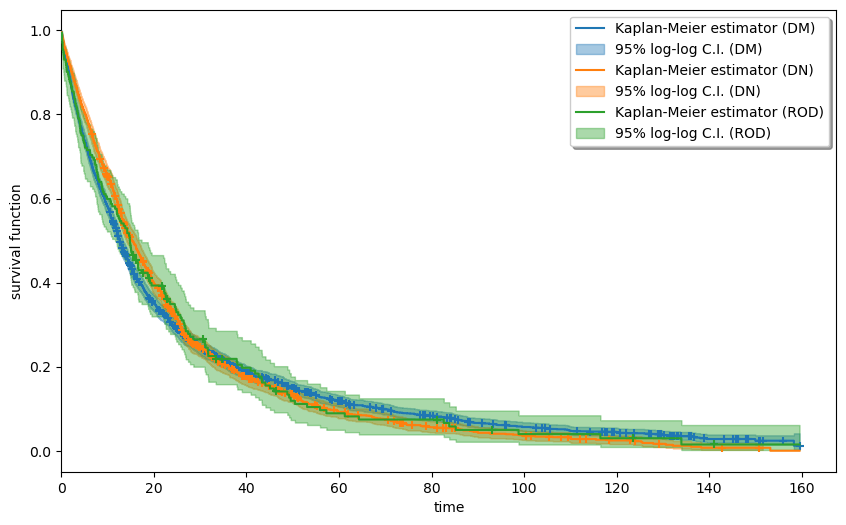

In [353]:
plt.figure(figsize=(10, 6))
km_fa.plot()
plt.show()
plt.close()

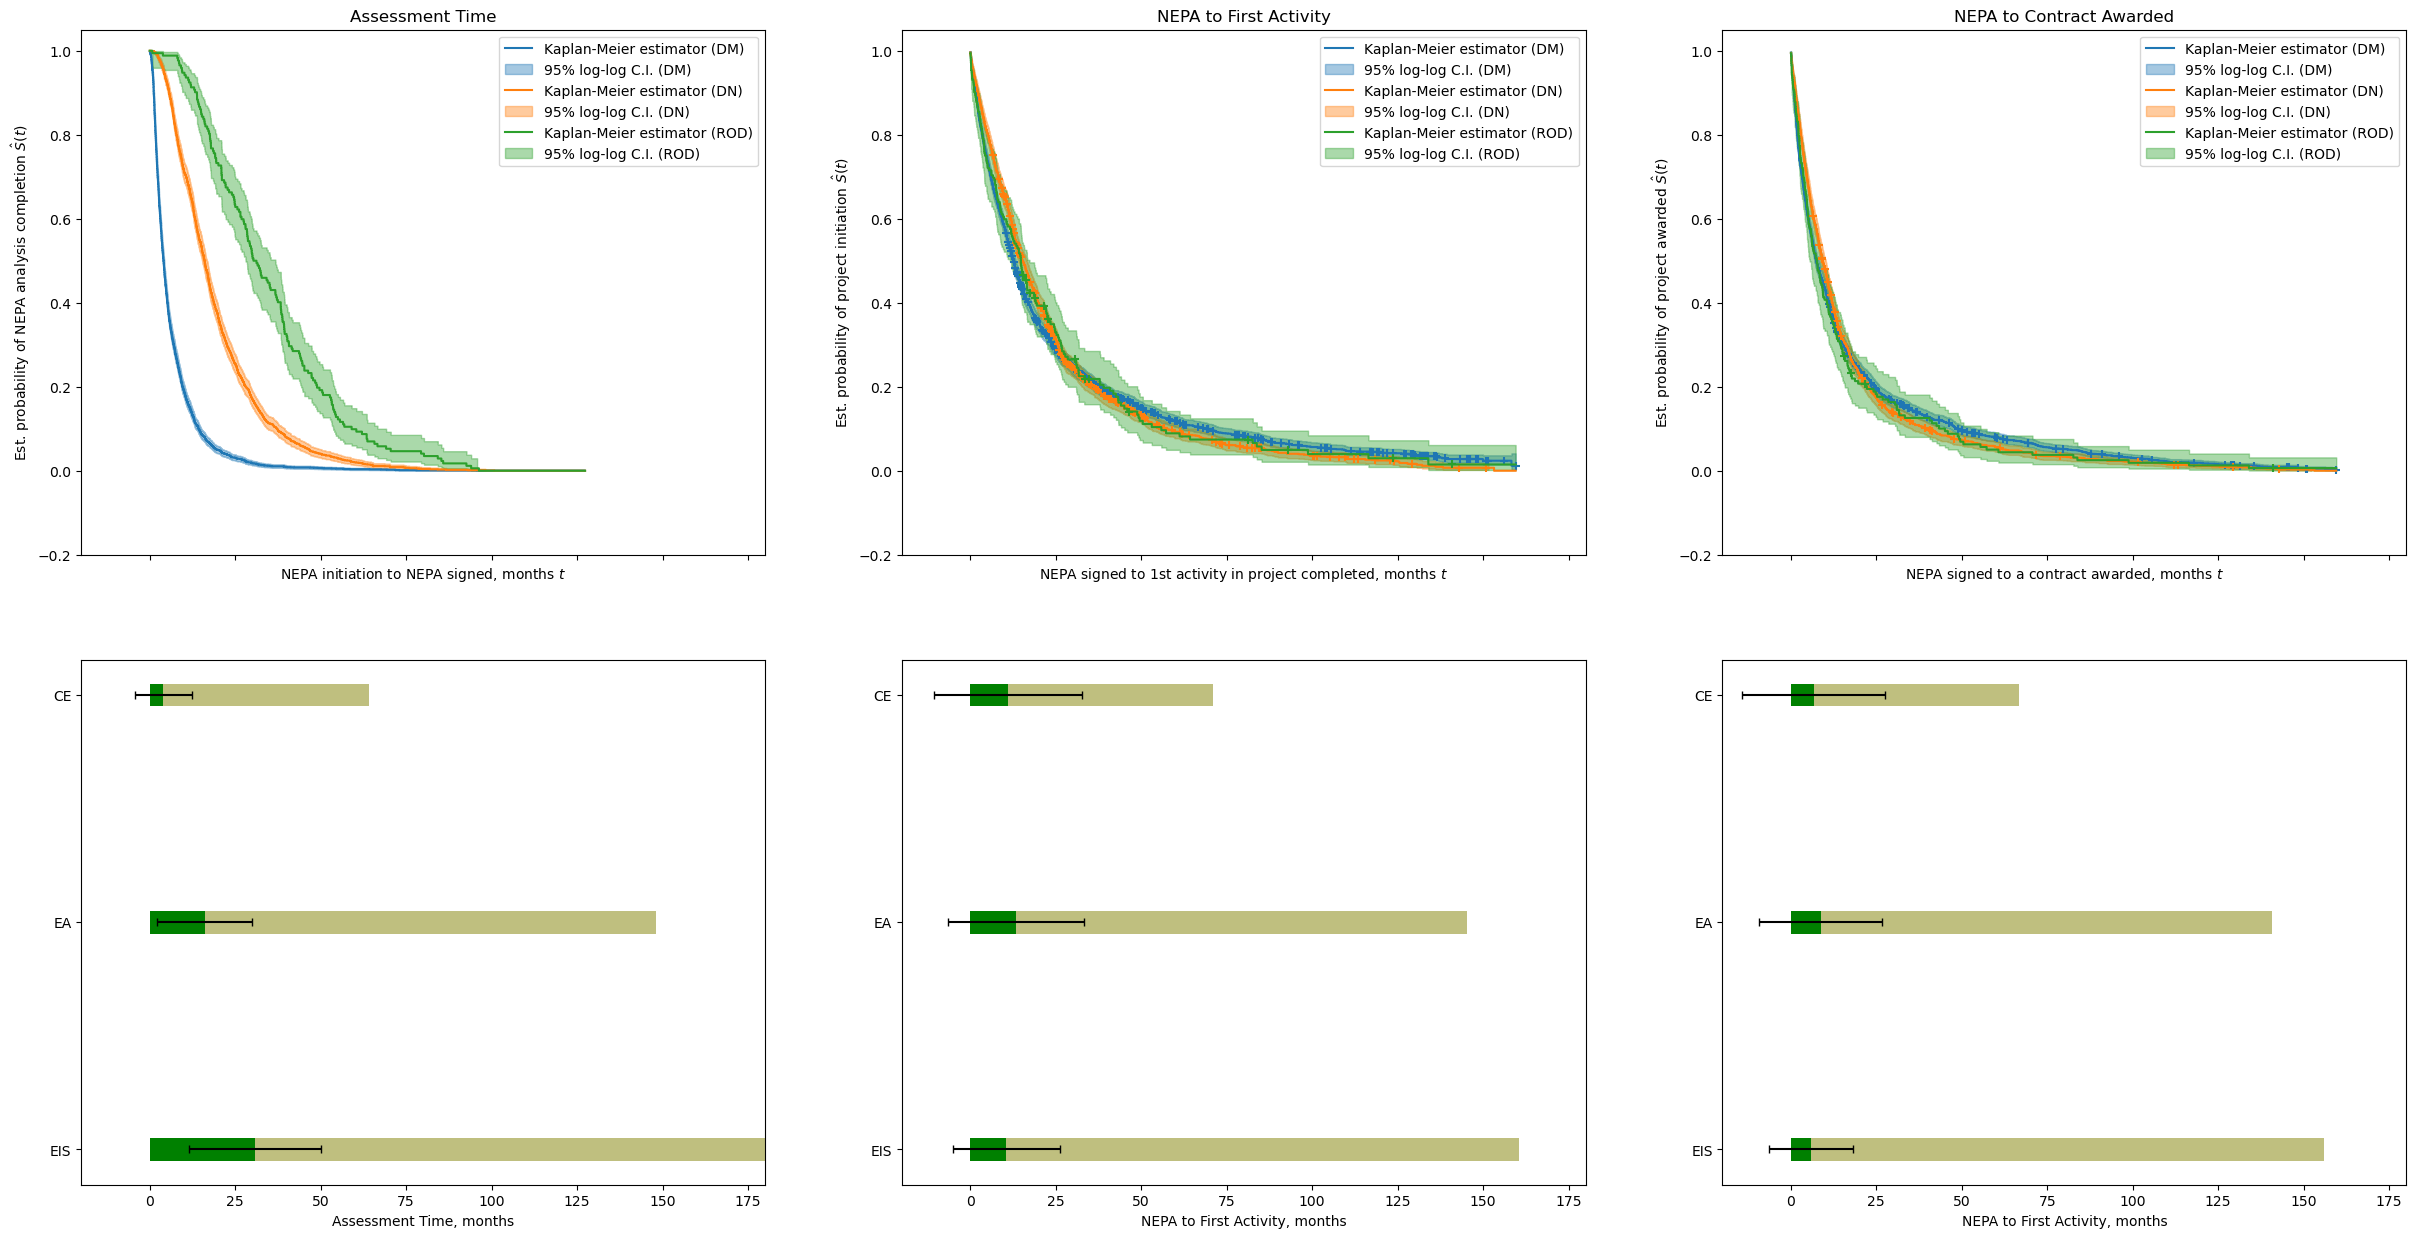

In [355]:
fig, ax = plt.subplots(2, 3, figsize=(30,15), sharex=True)

# Assessment time
km_assess.plot(ax = ax[0,0])

ax[0,0].set_ylabel('Est. probability of NEPA analysis completion $\hat{S}(t)$')
ax[0,0].set_xlabel('NEPA initiation to NEPA signed, months $t$')
ax[0,0].legend(loc='best')
ax[0,0].set_title('Assessment Time')
ax[0,0].set_ylim(-0.2, 1.05)
ax[0,0].set_xlim(xmin=-20, xmax=180)
ax[0,0].margins(x=10)

ax[1,0].barh(y_pos, med_assess_time, 
        xerr=error_assess, ecolor='black', capsize=3, 
        height=0.1, color="green")

#ax[1,0].barh(y_pos, med_plan_dur, left=med_assess_time,
ax[1,0].barh(y_pos, med_tot_proj, left=med_assess_time,
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,0].set_yticks(y_pos, labels=nepa_types)
ax[1,0].invert_yaxis()  # labels read top-to-bottom
ax[1,0].set_xlabel('Assessment Time, months')

# Nepa to first act
km_fa.plot(ax = ax[0,1])

ax[0,1].set_ylabel('Est. probability of project initiation $\hat{S}(t)$')
ax[0,1].set_xlabel('NEPA signed to 1st activity in project completed, months $t$')
ax[0,1].legend(loc='best')
ax[0,1].set_title('NEPA to First Activity')
ax[0,1].set_ylim(-0.2, 1.05)
#ax[0,1].set_xlim(0, 180)

ax[1,1].barh(y_pos, med_fa_time, 
        xerr=error_fa, ecolor='black', capsize=3, 
        height=0.1, color="green")

#ax[1,1].barh(y_pos, med_plan_dur, left=med_fa_time,
ax[1,1].barh(y_pos, med_tot_proj, left=med_fa_time,
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,1].set_yticks(y_pos, labels=nepa_types)
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_xlabel('NEPA to First Activity, months')

# NEPA to contract

km_ctc.plot(ax = ax[0,2])

ax[0,2].set_ylabel('Est. probability of project awarded $\hat{S}(t)$')
ax[0,2].set_xlabel('NEPA signed to a contract awarded, months $t$')
ax[0,2].legend(loc='best')
ax[0,2].set_title('NEPA to Contract Awarded')
ax[0,2].set_ylim(-0.2, 1.05)

ax[1,2].barh(y_pos, med_ctc_time, 
        xerr=error_ctc, ecolor='black', capsize=3, 
        height=0.1, color="green")

#ax[1,2].barh(y_pos, med_plan_dur, left=med_ctc_time, 
ax[1,2].barh(y_pos, med_tot_proj, left=med_ctc_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        height=0.1, color="olive", alpha=0.5)

ax[1,2].set_yticks(y_pos, labels=nepa_types)
ax[1,2].invert_yaxis()  # labels read top-to-bottom
ax[1,2].set_xlabel('NEPA to First Activity, months')

plt.xlim(-20,180)
# Remember: transparent=True
#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/km_plan_dur_med_bars_2009_2021_allpurp_v02_20230120.pdf", transparent=True)
plt.show()

## In case we decide to drop the survival analysis make some barplots of the mean and median assessment times, nepa to first act and nepa to contract

<AxesSubplot:xlabel='DECISION TYPE', ylabel='ASSESSMENT_TIME_MNTH'>

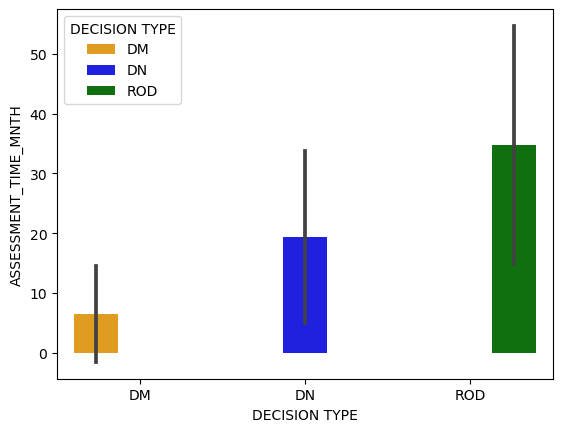

In [65]:
sns.barplot(data=df, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE",
            estimator=np.mean, ci="sd",
           hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
           order=["DM", "DN", "ROD"])

<AxesSubplot:xlabel='DECISION TYPE', ylabel='NEPA_TO_CONTRACT_MNTH'>

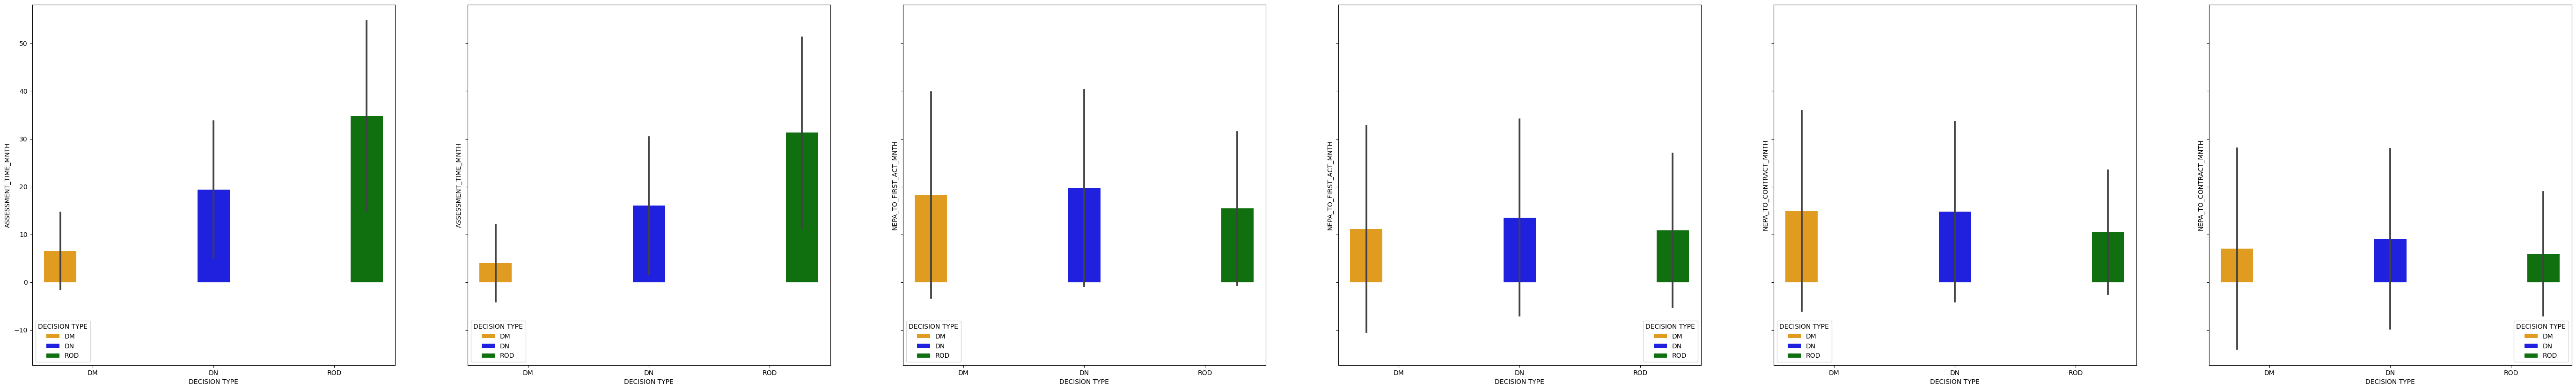

In [81]:
fig, ax = plt.subplots(1,6, figsize=(70,10), sharex=True, sharey=True)

# Ax[0] Mean Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE",
            ax=ax[0], estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax[1] Median Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE",
            ax=ax[1], estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax[2] Mean NEPA to First Activity (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE",
            ax=ax[2], estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax[3] Median NEPA to First Activity (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE",
            ax=ax[3], estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax[4] Mean NEPA to Contract (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE",
            ax=ax[4], estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax[5] Median NEPA to Contract (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE",
            ax=ax[5], estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])



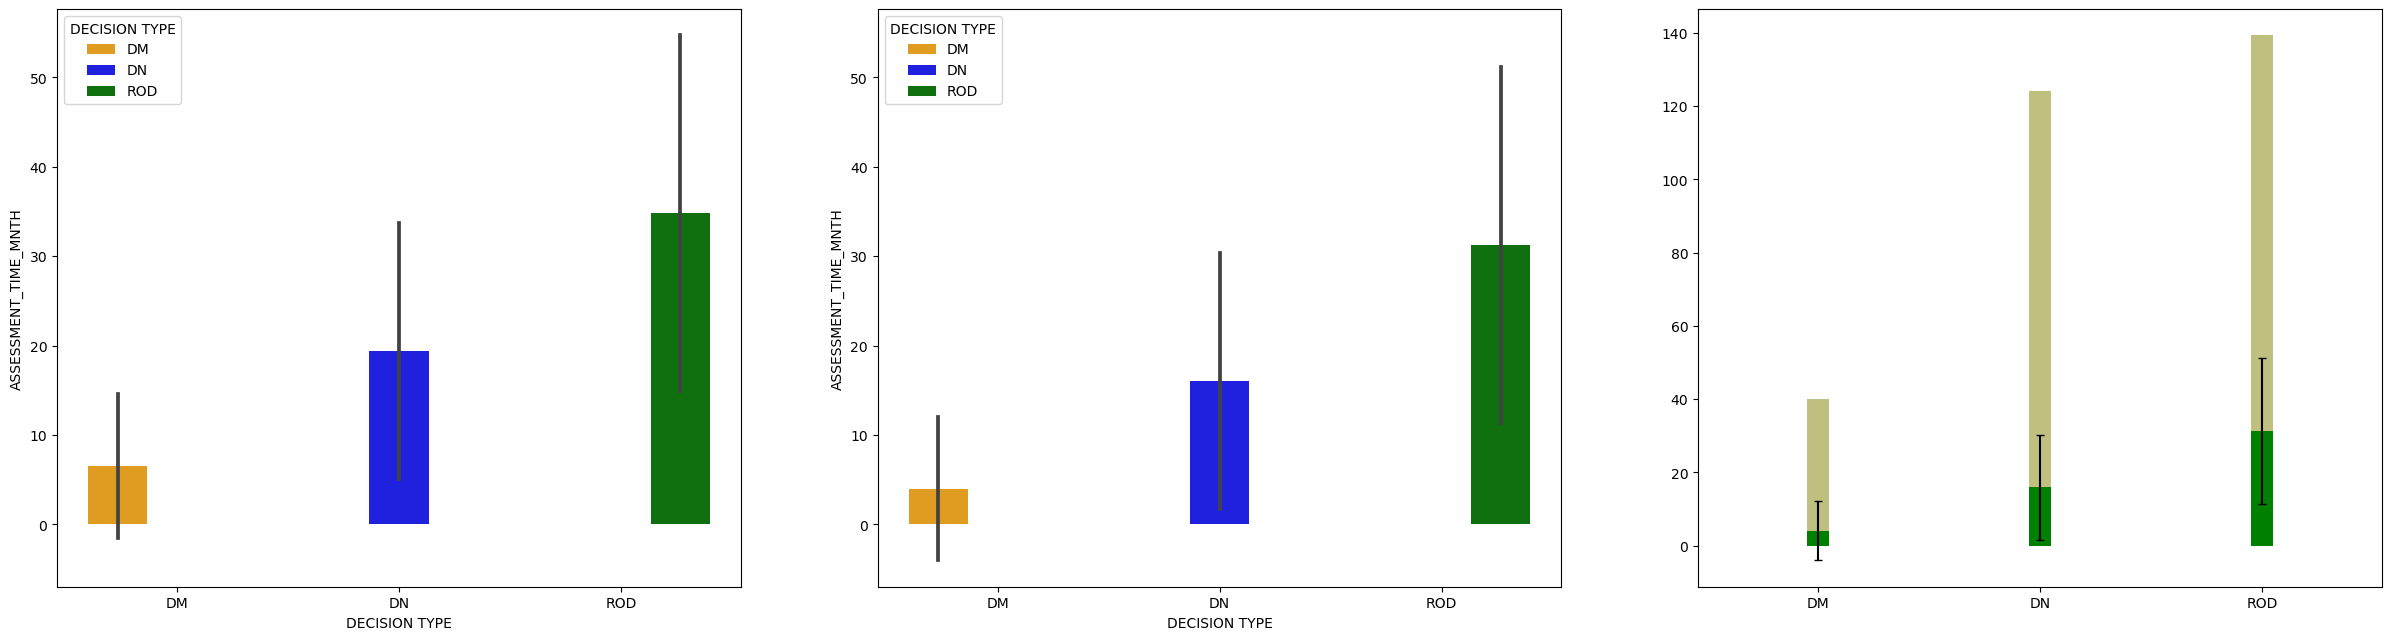

In [121]:
fig = plt.figure(figsize=(30,7.5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharex=ax1)

# Ax1 Mean Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE",
            ax=ax1, estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax2 Median Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="ASSESSMENT_TIME_MNTH", hue="DECISION TYPE",
            ax=ax2, estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax3 the stacked barplot with assessment time and planned project duration time (both months)
ax3.bar(y_pos, med_assess_time, 
        yerr=error_assess, ecolor='black', capsize=3, 
        width=0.1, color="green")
ax3.bar(y_pos, med_plan_dur, bottom=med_assess_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        width=0.1, color="olive", alpha=0.5)

#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/assess_time_mean_median_2009_2021_allpurp.pdf", transparent=True)
plt.show()


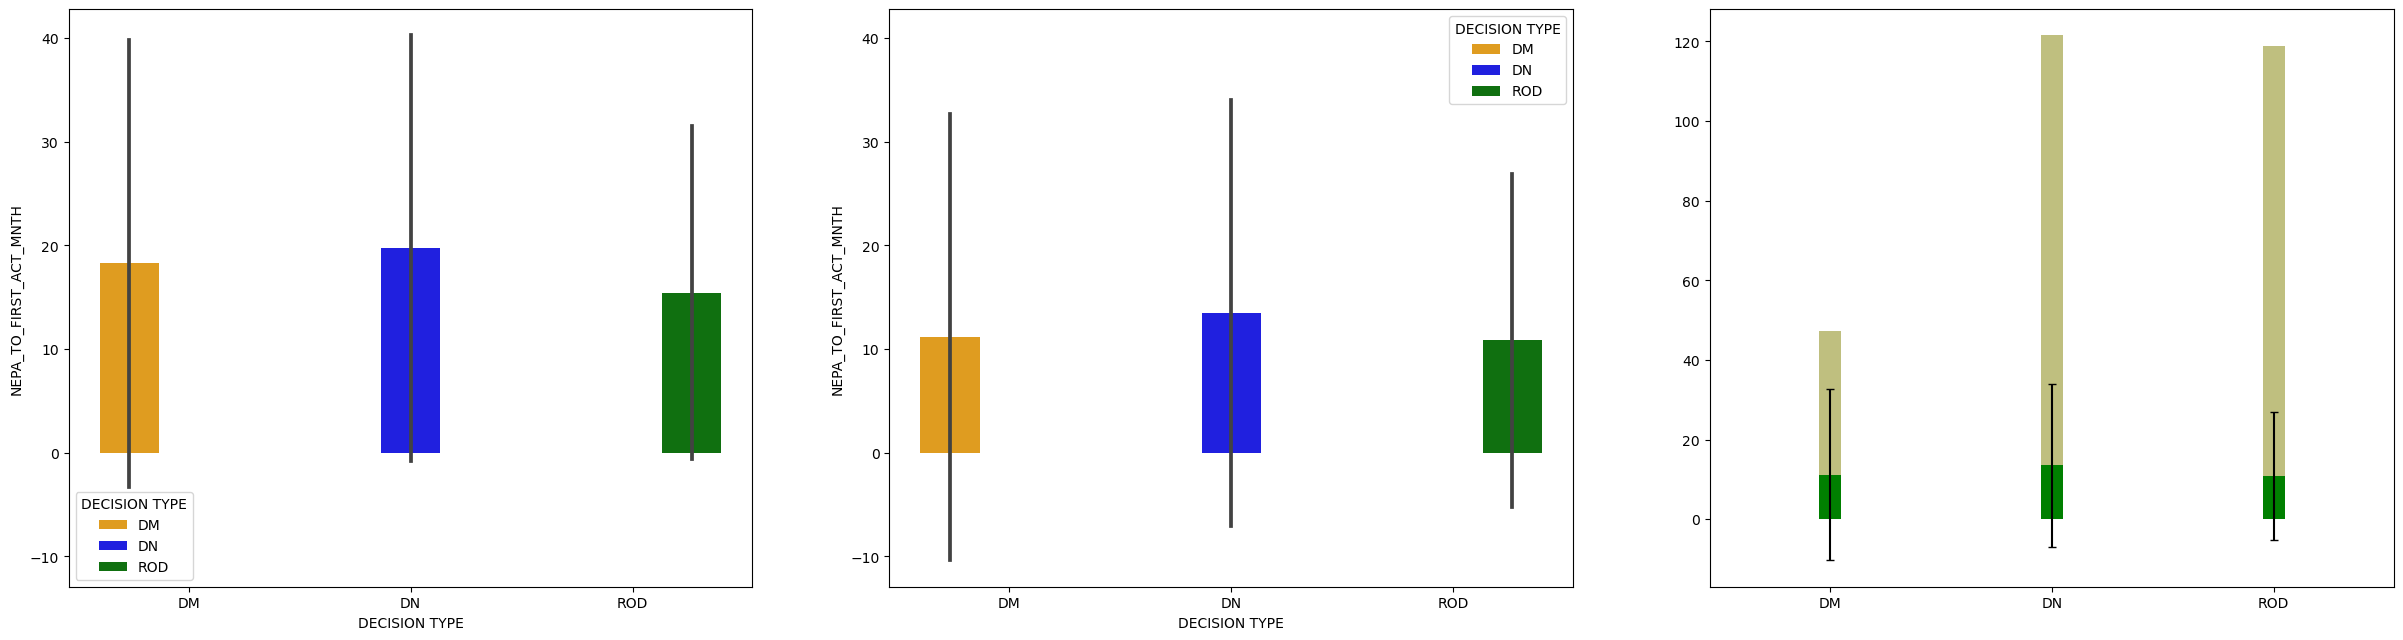

In [122]:
fig = plt.figure(figsize=(30,7.5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharex=ax1)

# Ax1 Mean Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE",
            ax=ax1, estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax2 Median Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_FIRST_ACT_MNTH", hue="DECISION TYPE",
            ax=ax2, estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax3 the stacked barplot with assessment time and planned project duration time (both months)
ax3.bar(y_pos, med_fa_time, 
        yerr=error_fa, ecolor='black', capsize=3, 
        width=0.1, color="green")
ax3.bar(y_pos, med_plan_dur, bottom=med_fa_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        width=0.1, color="olive", alpha=0.5)

#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/nepa_to_fa_mean_median_2009_2021_allpurp.pdf", transparent=True)
plt.show()


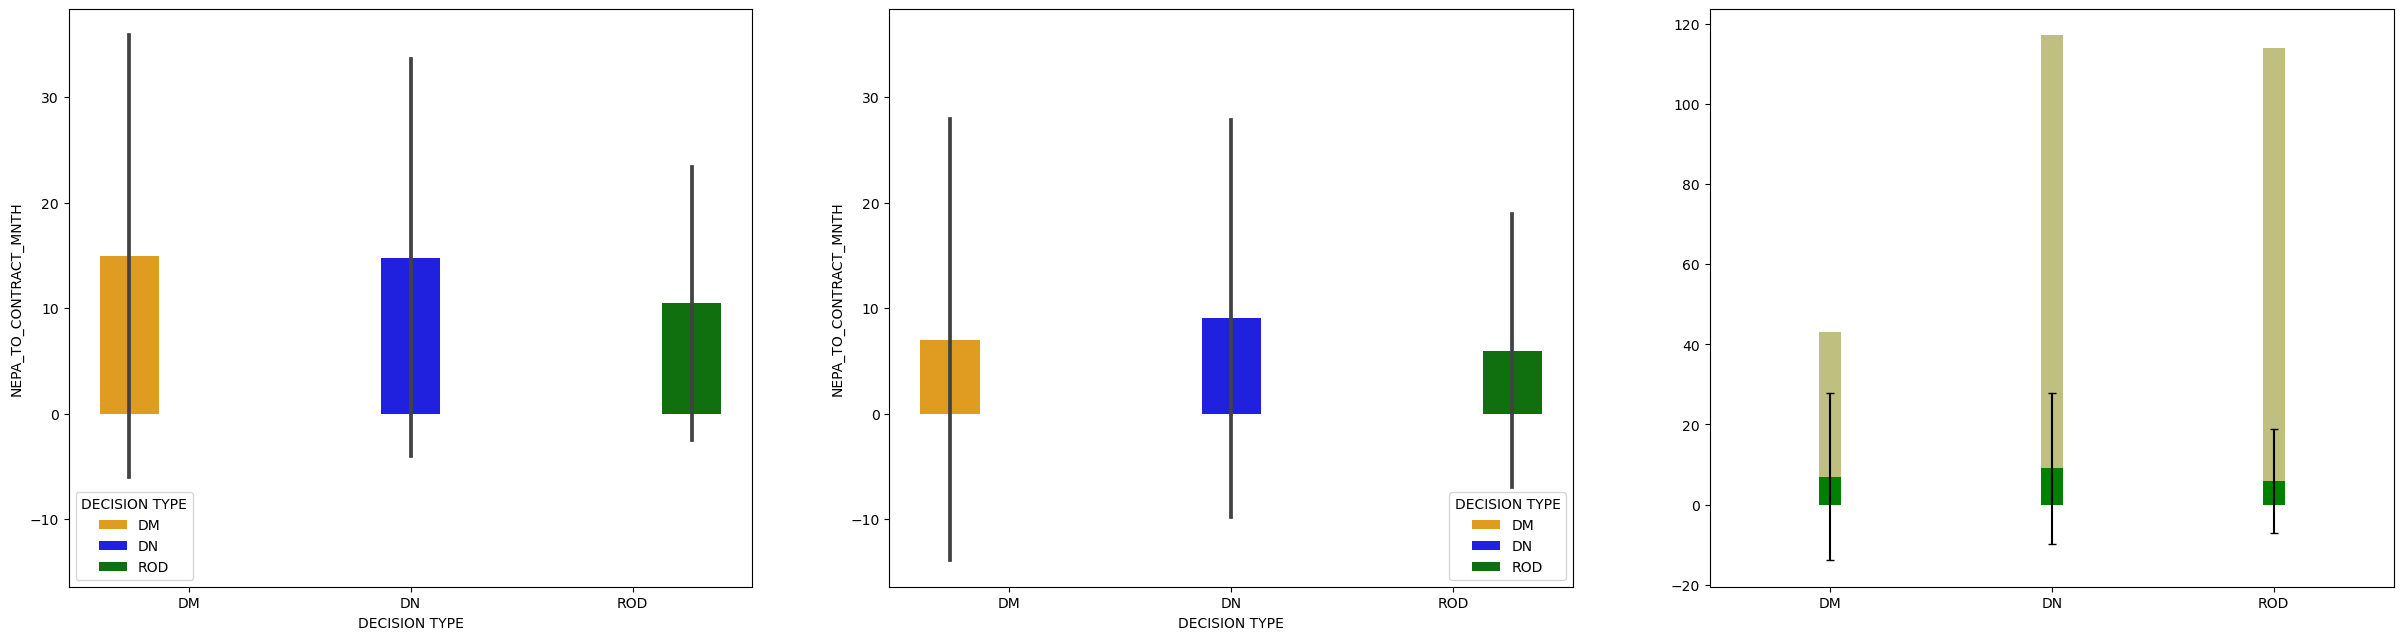

In [123]:
fig = plt.figure(figsize=(30,7.5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(1, 3, 3, sharex=ax1)

# Ax1 Mean Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE",
            ax=ax1, estimator=np.mean, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax2 Median Assessment time (months)
sns.barplot(data=df, x="DECISION TYPE", y="NEPA_TO_CONTRACT_MNTH", hue="DECISION TYPE",
            ax=ax2, estimator=np.median, ci="sd",
            hue_order=["DM", "DN", "ROD"], palette=["orange", "blue", "green"],
            order=["DM", "DN", "ROD"])

# Ax3 the stacked barplot with assessment time and planned project duration time (both months)
ax3.bar(y_pos, med_ctc_time, 
        yerr=error_ctc, ecolor='black', capsize=3, 
        width=0.1, color="green")
ax3.bar(y_pos, med_plan_dur, bottom=med_ctc_time, 
        #xerr=error_plan_dur, ecolor='olive', capsize=5,
        width=0.1, color="olive", alpha=0.5)

#plt.savefig("/Users/kathrynmurenbeeld/Desktop/NEPA_DELAYS/Drafts/Figures/PDFs/nepa_to_ctc_mean_median_2009_2021_allpurp.pdf", transparent=True)
plt.show()
